In [184]:
%load_ext autoreload
%autoreload 2

import set_embedding
import torch
import random
import json
from pprint import pprint as pp
from matplotlib import pyplot as plt
from slack import *

device = torch.device(7)
print(torch.__version__, device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1.4.0 cuda:7


In [162]:
with open('contextualized-lines.json') as f:
    contextual_dataset = json.load(f) 

In [163]:
pp(random.sample(contextual_dataset['train'], 10))

[{'c': ['e',
        'month',
        '_check_cf_error',
        'cash_flows',
        'apr',
        'dt',
        'dis_rate',
        'apr',
        'dt',
        'total'],
  'i': ['math'],
  'l': 'for t, pmt in enumerate(cash_flows):'},
 {'c': ['kwargs',
        'try',
        'response',
        'u',
        'module',
        'not',
        'implemented',
        'except',
        'Exception',
        'error'],
  'i': ['logging', 're', 'include'],
  'l': "log.warn(u'error in module %s' % self.__module__)"},
 {'c': ['import',
        'sys',
        'import',
        're',
        'import',
        'codecs',
        'import',
        'commands',
        'import',
        'urllib2'],
  'i': ['codecs', 'os', 'commands', 'sys', 're', 'urllib2', 'django'],
  'l': 'import urllib'},
 {'c': ['orth2',
        'pair_min',
        'str',
        'min',
        'int',
        'corpus',
        'orth1',
        'int',
        'corpus',
        'orth2'],
  'i': [],
  'l': 'counter += 1'},
 {'c': 

In [167]:
s_emb = set_embedding.SetEmbedding(device, hidden_size=256)

In [181]:
def random_string():
    return ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=random.randint(1, 2)))

def generate_toy_dataset(n=10000, k=5):
    ds = []
    for i in range(n):
        ds.append([random_string() for _ in range(k)])
    return ds

def filter_contexts(l, max_len=20):
    ans = []
    for c in l:
        try:
            for s in c:
                if len(s) > max_len:
                    raise ValueError("Too long")
                s.encode('ascii')
            ans.append(c)
        except:
            pass
    print('{}/{} could be encoded in ascii.'.format(len(ans), len(l)))
    return ans

toy_dataset = generate_toy_dataset()

In [182]:
contexts_dataset = filter_contexts([row['c'] for row in contextual_dataset['train']])
print(len(contexts_dataset), 'examples of contexts.')

1221331/1331721 could be encoded in ascii.
1221331 examples of contexts.


In [183]:
# ds = generate_toy_dataset(50)
loss_history = s_emb.train(contexts_dataset, {'epochs': 3, 'lr': 1e-3})

0.00% done, 06h10m15s left, 5.2 it/s loss = 0.693, train_acc = 0.502
0.01% done, 07h09m45s left, 4.4 it/s loss = 0.690, train_acc = 0.501
0.01% done, 06h42m47s left, 4.7 it/s loss = 0.659, train_acc = 0.690
0.02% done, 06h35m17s left, 4.8 it/s loss = 0.675, train_acc = 0.575
0.02% done, 06h35m35s left, 4.8 it/s loss = 0.629, train_acc = 0.629
0.03% done, 06h34m30s left, 4.8 it/s loss = 0.507, train_acc = 0.777
0.03% done, 06h27m13s left, 4.9 it/s loss = 0.561, train_acc = 0.752
0.03% done, 06h21m38s left, 5.0 it/s loss = 0.676, train_acc = 0.500
0.04% done, 06h27m52s left, 4.9 it/s loss = 0.674, train_acc = 0.500
0.04% done, 06h23m55s left, 5.0 it/s loss = 0.680, train_acc = 0.606
0.05% done, 06h23m03s left, 5.0 it/s loss = 0.667, train_acc = 0.551
0.05% done, 06h29m01s left, 4.9 it/s loss = 0.599, train_acc = 0.701
0.06% done, 06h30m13s left, 4.9 it/s loss = 0.569, train_acc = 0.707
0.06% done, 06h27m40s left, 4.9 it/s loss = 0.525, train_acc = 0.728
0.07% done, 06h27m09s left, 4.9 it

0.52% done, 06h08m24s left, 5.2 it/s loss = 0.364, train_acc = 0.847
0.53% done, 06h08m15s left, 5.2 it/s loss = 0.397, train_acc = 0.825
0.53% done, 06h08m15s left, 5.2 it/s loss = 0.319, train_acc = 0.855
0.54% done, 06h08m21s left, 5.2 it/s loss = 0.384, train_acc = 0.831
0.54% done, 06h08m14s left, 5.2 it/s loss = 0.347, train_acc = 0.842
0.55% done, 06h08m18s left, 5.2 it/s loss = 0.477, train_acc = 0.745
0.55% done, 06h08m31s left, 5.1 it/s loss = 0.352, train_acc = 0.842
0.55% done, 06h08m40s left, 5.1 it/s loss = 0.398, train_acc = 0.816
0.56% done, 06h08m35s left, 5.1 it/s loss = 0.513, train_acc = 0.743
0.56% done, 06h08m35s left, 5.1 it/s loss = 0.398, train_acc = 0.810
0.57% done, 06h08m37s left, 5.1 it/s loss = 0.236, train_acc = 0.915
0.57% done, 06h08m34s left, 5.1 it/s loss = 0.446, train_acc = 0.781
0.58% done, 06h08m25s left, 5.1 it/s loss = 0.412, train_acc = 0.794
0.58% done, 06h08m29s left, 5.1 it/s loss = 0.331, train_acc = 0.851
0.59% done, 06h08m39s left, 5.1 it

1.04% done, 06h09m59s left, 5.1 it/s loss = 0.386, train_acc = 0.805
1.05% done, 06h09m53s left, 5.1 it/s loss = 0.355, train_acc = 0.836
1.05% done, 06h09m39s left, 5.1 it/s loss = 0.385, train_acc = 0.832
1.06% done, 06h09m33s left, 5.1 it/s loss = 0.303, train_acc = 0.852
1.06% done, 06h09m35s left, 5.1 it/s loss = 0.396, train_acc = 0.818
1.07% done, 06h09m37s left, 5.1 it/s loss = 0.487, train_acc = 0.768
1.07% done, 06h09m36s left, 5.1 it/s loss = 0.336, train_acc = 0.843
1.07% done, 06h09m29s left, 5.1 it/s loss = 0.403, train_acc = 0.802
1.08% done, 06h09m26s left, 5.1 it/s loss = 0.440, train_acc = 0.790
1.08% done, 06h09m21s left, 5.1 it/s loss = 0.257, train_acc = 0.887
1.09% done, 06h09m22s left, 5.1 it/s loss = 0.305, train_acc = 0.864
1.09% done, 06h09m18s left, 5.1 it/s loss = 0.399, train_acc = 0.813
1.10% done, 06h09m14s left, 5.1 it/s loss = 0.351, train_acc = 0.847
1.10% done, 06h09m08s left, 5.1 it/s loss = 0.344, train_acc = 0.853
1.10% done, 06h09m14s left, 5.1 it

1.56% done, 06h08m59s left, 5.1 it/s loss = 0.319, train_acc = 0.860
1.57% done, 06h08m53s left, 5.1 it/s loss = 0.450, train_acc = 0.759
1.57% done, 06h08m54s left, 5.1 it/s loss = 0.364, train_acc = 0.844
1.58% done, 06h08m48s left, 5.1 it/s loss = 0.374, train_acc = 0.825
1.58% done, 06h08m45s left, 5.1 it/s loss = 0.374, train_acc = 0.847
1.59% done, 06h08m55s left, 5.1 it/s loss = 0.326, train_acc = 0.827
1.59% done, 06h08m48s left, 5.1 it/s loss = 0.316, train_acc = 0.857
1.59% done, 06h08m43s left, 5.1 it/s loss = 0.382, train_acc = 0.822
1.60% done, 06h08m42s left, 5.1 it/s loss = 0.453, train_acc = 0.783
1.60% done, 06h08m51s left, 5.1 it/s loss = 0.404, train_acc = 0.812
1.61% done, 06h08m45s left, 5.1 it/s loss = 0.353, train_acc = 0.840
1.61% done, 06h08m45s left, 5.1 it/s loss = 0.306, train_acc = 0.863
1.62% done, 06h08m53s left, 5.1 it/s loss = 0.382, train_acc = 0.803
1.62% done, 06h08m53s left, 5.1 it/s loss = 0.311, train_acc = 0.860
1.62% done, 06h08m50s left, 5.1 it

2.08% done, 06h05m28s left, 5.1 it/s loss = 0.304, train_acc = 0.846
2.09% done, 06h05m26s left, 5.1 it/s loss = 0.283, train_acc = 0.889
2.09% done, 06h05m29s left, 5.1 it/s loss = 0.309, train_acc = 0.848
2.10% done, 06h05m38s left, 5.1 it/s loss = 0.316, train_acc = 0.848
2.10% done, 06h05m35s left, 5.1 it/s loss = 0.241, train_acc = 0.912
2.10% done, 06h05m31s left, 5.1 it/s loss = 0.298, train_acc = 0.845
2.11% done, 06h05m37s left, 5.1 it/s loss = 0.389, train_acc = 0.803
2.11% done, 06h05m36s left, 5.1 it/s loss = 0.326, train_acc = 0.847
2.12% done, 06h05m31s left, 5.1 it/s loss = 0.358, train_acc = 0.836
2.12% done, 06h05m35s left, 5.1 it/s loss = 0.271, train_acc = 0.885
2.13% done, 06h05m35s left, 5.1 it/s loss = 0.250, train_acc = 0.902
2.13% done, 06h05m29s left, 5.1 it/s loss = 0.370, train_acc = 0.827
2.14% done, 06h05m24s left, 5.1 it/s loss = 0.276, train_acc = 0.882
2.14% done, 06h05m32s left, 5.1 it/s loss = 0.374, train_acc = 0.808
2.14% done, 06h05m27s left, 5.1 it

2.60% done, 06h03m19s left, 5.1 it/s loss = 0.302, train_acc = 0.845
2.61% done, 06h03m21s left, 5.1 it/s loss = 0.229, train_acc = 0.895
2.61% done, 06h03m21s left, 5.1 it/s loss = 0.334, train_acc = 0.839
2.62% done, 06h03m21s left, 5.1 it/s loss = 0.294, train_acc = 0.862
2.62% done, 06h03m18s left, 5.1 it/s loss = 0.221, train_acc = 0.911
2.62% done, 06h03m17s left, 5.1 it/s loss = 0.259, train_acc = 0.884
2.63% done, 06h03m16s left, 5.1 it/s loss = 0.333, train_acc = 0.848
2.63% done, 06h03m15s left, 5.1 it/s loss = 0.330, train_acc = 0.854
2.64% done, 06h03m12s left, 5.1 it/s loss = 0.316, train_acc = 0.858
2.64% done, 06h03m13s left, 5.1 it/s loss = 0.322, train_acc = 0.861
2.65% done, 06h03m11s left, 5.1 it/s loss = 0.175, train_acc = 0.936
2.65% done, 06h03m08s left, 5.1 it/s loss = 0.294, train_acc = 0.871
2.65% done, 06h03m13s left, 5.1 it/s loss = 0.261, train_acc = 0.889
2.66% done, 06h03m10s left, 5.1 it/s loss = 0.289, train_acc = 0.870
2.66% done, 06h03m21s left, 5.1 it

3.12% done, 06h03m16s left, 5.1 it/s loss = 0.350, train_acc = 0.840
3.13% done, 06h03m14s left, 5.1 it/s loss = 0.274, train_acc = 0.862
3.13% done, 06h03m13s left, 5.1 it/s loss = 0.224, train_acc = 0.911
3.14% done, 06h03m07s left, 5.1 it/s loss = 0.311, train_acc = 0.868
3.14% done, 06h03m03s left, 5.1 it/s loss = 0.276, train_acc = 0.866
3.14% done, 06h03m00s left, 5.1 it/s loss = 0.324, train_acc = 0.855
3.15% done, 06h02m57s left, 5.1 it/s loss = 0.278, train_acc = 0.877
3.15% done, 06h02m54s left, 5.1 it/s loss = 0.322, train_acc = 0.863
3.16% done, 06h02m52s left, 5.1 it/s loss = 0.311, train_acc = 0.853
3.16% done, 06h02m52s left, 5.1 it/s loss = 0.498, train_acc = 0.746
3.17% done, 06h02m49s left, 5.1 it/s loss = 0.299, train_acc = 0.867
3.17% done, 06h02m46s left, 5.1 it/s loss = 0.246, train_acc = 0.889
3.17% done, 06h02m43s left, 5.1 it/s loss = 0.274, train_acc = 0.879
3.18% done, 06h02m40s left, 5.1 it/s loss = 0.239, train_acc = 0.897
3.18% done, 06h02m36s left, 5.1 it

3.64% done, 06h01m51s left, 5.1 it/s loss = 0.253, train_acc = 0.882
3.65% done, 06h01m47s left, 5.1 it/s loss = 0.246, train_acc = 0.902
3.65% done, 06h01m46s left, 5.1 it/s loss = 0.384, train_acc = 0.818
3.65% done, 06h01m45s left, 5.1 it/s loss = 0.290, train_acc = 0.866
3.66% done, 06h01m47s left, 5.1 it/s loss = 0.258, train_acc = 0.881
3.66% done, 06h01m43s left, 5.1 it/s loss = 0.262, train_acc = 0.889
3.67% done, 06h01m39s left, 5.1 it/s loss = 0.221, train_acc = 0.924
3.67% done, 06h01m44s left, 5.1 it/s loss = 0.195, train_acc = 0.926
3.68% done, 06h01m41s left, 5.1 it/s loss = 0.383, train_acc = 0.813
3.68% done, 06h01m39s left, 5.1 it/s loss = 0.348, train_acc = 0.841
3.69% done, 06h01m39s left, 5.1 it/s loss = 0.203, train_acc = 0.930
3.69% done, 06h01m39s left, 5.1 it/s loss = 0.245, train_acc = 0.890
3.69% done, 06h01m38s left, 5.1 it/s loss = 0.248, train_acc = 0.884
3.70% done, 06h01m37s left, 5.1 it/s loss = 0.284, train_acc = 0.867
3.70% done, 06h01m36s left, 5.1 it

4.16% done, 05h59m32s left, 5.1 it/s loss = 0.288, train_acc = 0.860
4.17% done, 05h59m32s left, 5.1 it/s loss = 0.220, train_acc = 0.908
4.17% done, 05h59m30s left, 5.1 it/s loss = 0.227, train_acc = 0.929
4.17% done, 05h59m28s left, 5.1 it/s loss = 0.188, train_acc = 0.928
4.18% done, 05h59m29s left, 5.1 it/s loss = 0.226, train_acc = 0.913
4.18% done, 05h59m28s left, 5.1 it/s loss = 0.292, train_acc = 0.870
4.19% done, 05h59m28s left, 5.1 it/s loss = 0.261, train_acc = 0.873
4.19% done, 05h59m28s left, 5.1 it/s loss = 0.247, train_acc = 0.902
4.20% done, 05h59m27s left, 5.1 it/s loss = 0.218, train_acc = 0.912
4.20% done, 05h59m24s left, 5.1 it/s loss = 0.292, train_acc = 0.873
4.21% done, 05h59m22s left, 5.1 it/s loss = 0.209, train_acc = 0.917
4.21% done, 05h59m28s left, 5.1 it/s loss = 0.265, train_acc = 0.893
4.21% done, 05h59m25s left, 5.1 it/s loss = 0.289, train_acc = 0.863
4.22% done, 05h59m24s left, 5.1 it/s loss = 0.228, train_acc = 0.919
4.22% done, 05h59m26s left, 5.1 it

4.68% done, 05h57m57s left, 5.1 it/s loss = 0.218, train_acc = 0.907
4.69% done, 05h57m58s left, 5.1 it/s loss = 0.228, train_acc = 0.900
4.69% done, 05h57m58s left, 5.1 it/s loss = 0.212, train_acc = 0.902
4.69% done, 05h57m57s left, 5.1 it/s loss = 0.211, train_acc = 0.903
4.70% done, 05h57m55s left, 5.1 it/s loss = 0.197, train_acc = 0.922
4.70% done, 05h57m53s left, 5.1 it/s loss = 0.282, train_acc = 0.886
4.71% done, 05h57m51s left, 5.1 it/s loss = 0.224, train_acc = 0.889
4.71% done, 05h57m50s left, 5.1 it/s loss = 0.235, train_acc = 0.903
4.72% done, 05h57m47s left, 5.1 it/s loss = 0.201, train_acc = 0.916
4.72% done, 05h57m49s left, 5.1 it/s loss = 0.201, train_acc = 0.923
4.72% done, 05h57m47s left, 5.1 it/s loss = 0.197, train_acc = 0.915
4.73% done, 05h57m45s left, 5.1 it/s loss = 0.175, train_acc = 0.931
4.73% done, 05h57m46s left, 5.1 it/s loss = 0.243, train_acc = 0.891
4.74% done, 05h57m43s left, 5.1 it/s loss = 0.146, train_acc = 0.936
4.74% done, 05h57m41s left, 5.1 it

5.20% done, 05h56m43s left, 5.1 it/s loss = 0.217, train_acc = 0.908
5.21% done, 05h56m43s left, 5.1 it/s loss = 0.191, train_acc = 0.928
5.21% done, 05h56m41s left, 5.1 it/s loss = 0.257, train_acc = 0.916
5.21% done, 05h56m41s left, 5.1 it/s loss = 0.166, train_acc = 0.951
5.22% done, 05h56m40s left, 5.1 it/s loss = 0.224, train_acc = 0.920
5.22% done, 05h56m38s left, 5.1 it/s loss = 0.184, train_acc = 0.924
5.23% done, 05h56m37s left, 5.1 it/s loss = 0.192, train_acc = 0.922
5.23% done, 05h56m37s left, 5.1 it/s loss = 0.185, train_acc = 0.924
5.24% done, 05h56m36s left, 5.1 it/s loss = 0.218, train_acc = 0.894
5.24% done, 05h56m34s left, 5.1 it/s loss = 0.201, train_acc = 0.927
5.24% done, 05h56m35s left, 5.1 it/s loss = 0.256, train_acc = 0.886
5.25% done, 05h56m35s left, 5.1 it/s loss = 0.204, train_acc = 0.916
5.25% done, 05h56m35s left, 5.1 it/s loss = 0.144, train_acc = 0.944
5.26% done, 05h56m34s left, 5.1 it/s loss = 0.271, train_acc = 0.889
5.26% done, 05h56m33s left, 5.1 it

5.72% done, 05h55m21s left, 5.1 it/s loss = 0.200, train_acc = 0.920
5.72% done, 05h55m23s left, 5.1 it/s loss = 0.229, train_acc = 0.889
5.73% done, 05h55m21s left, 5.1 it/s loss = 0.249, train_acc = 0.915
5.73% done, 05h55m20s left, 5.1 it/s loss = 0.189, train_acc = 0.930
5.74% done, 05h55m21s left, 5.1 it/s loss = 0.289, train_acc = 0.878
5.74% done, 05h55m19s left, 5.1 it/s loss = 0.175, train_acc = 0.932
5.75% done, 05h55m16s left, 5.1 it/s loss = 0.137, train_acc = 0.948
5.75% done, 05h55m13s left, 5.1 it/s loss = 0.227, train_acc = 0.910
5.76% done, 05h55m12s left, 5.1 it/s loss = 0.227, train_acc = 0.899
5.76% done, 05h55m11s left, 5.1 it/s loss = 0.168, train_acc = 0.935
5.76% done, 05h55m10s left, 5.1 it/s loss = 0.160, train_acc = 0.935
5.77% done, 05h55m08s left, 5.1 it/s loss = 0.268, train_acc = 0.876
5.77% done, 05h55m10s left, 5.1 it/s loss = 0.215, train_acc = 0.929
5.78% done, 05h55m07s left, 5.1 it/s loss = 0.150, train_acc = 0.935
5.78% done, 05h55m06s left, 5.1 it

6.24% done, 05h53m16s left, 5.1 it/s loss = 0.191, train_acc = 0.925
6.24% done, 05h53m18s left, 5.1 it/s loss = 0.256, train_acc = 0.889
6.25% done, 05h53m17s left, 5.1 it/s loss = 0.194, train_acc = 0.915
6.25% done, 05h53m16s left, 5.1 it/s loss = 0.167, train_acc = 0.937
6.26% done, 05h53m21s left, 5.1 it/s loss = 0.308, train_acc = 0.863
6.26% done, 05h53m20s left, 5.1 it/s loss = 0.192, train_acc = 0.929
6.27% done, 05h53m20s left, 5.1 it/s loss = 0.170, train_acc = 0.932
6.27% done, 05h53m20s left, 5.1 it/s loss = 0.173, train_acc = 0.933
6.28% done, 05h53m22s left, 5.1 it/s loss = 0.174, train_acc = 0.930
6.28% done, 05h53m19s left, 5.1 it/s loss = 0.187, train_acc = 0.932
6.28% done, 05h53m19s left, 5.1 it/s loss = 0.118, train_acc = 0.955
6.29% done, 05h53m22s left, 5.1 it/s loss = 0.227, train_acc = 0.902
6.29% done, 05h53m20s left, 5.1 it/s loss = 0.200, train_acc = 0.911
6.30% done, 05h53m18s left, 5.1 it/s loss = 0.216, train_acc = 0.903
6.30% done, 05h53m17s left, 5.1 it

6.76% done, 05h52m26s left, 5.0 it/s loss = 0.205, train_acc = 0.918
6.76% done, 05h52m26s left, 5.0 it/s loss = 0.200, train_acc = 0.935
6.77% done, 05h52m25s left, 5.0 it/s loss = 0.199, train_acc = 0.920
6.77% done, 05h52m24s left, 5.0 it/s loss = 0.123, train_acc = 0.957
6.78% done, 05h52m24s left, 5.0 it/s loss = 0.238, train_acc = 0.899
6.78% done, 05h52m25s left, 5.0 it/s loss = 0.147, train_acc = 0.941
6.79% done, 05h52m25s left, 5.0 it/s loss = 0.193, train_acc = 0.914
6.79% done, 05h52m24s left, 5.0 it/s loss = 0.176, train_acc = 0.945
6.79% done, 05h52m25s left, 5.0 it/s loss = 0.117, train_acc = 0.958
6.80% done, 05h52m24s left, 5.0 it/s loss = 0.205, train_acc = 0.928
6.80% done, 05h52m23s left, 5.0 it/s loss = 0.189, train_acc = 0.933
6.81% done, 05h52m24s left, 5.0 it/s loss = 0.237, train_acc = 0.917
6.81% done, 05h52m24s left, 5.0 it/s loss = 0.241, train_acc = 0.907
6.82% done, 05h52m24s left, 5.0 it/s loss = 0.167, train_acc = 0.934
6.82% done, 05h52m23s left, 5.0 it

7.28% done, 05h51m07s left, 5.0 it/s loss = 0.227, train_acc = 0.908
7.28% done, 05h51m06s left, 5.0 it/s loss = 0.127, train_acc = 0.957
7.29% done, 05h51m05s left, 5.0 it/s loss = 0.217, train_acc = 0.902
7.29% done, 05h51m03s left, 5.0 it/s loss = 0.152, train_acc = 0.931
7.30% done, 05h51m01s left, 5.0 it/s loss = 0.267, train_acc = 0.881
7.30% done, 05h51m00s left, 5.0 it/s loss = 0.144, train_acc = 0.929
7.31% done, 05h50m58s left, 5.0 it/s loss = 0.202, train_acc = 0.917
7.31% done, 05h50m57s left, 5.0 it/s loss = 0.172, train_acc = 0.922
7.31% done, 05h50m55s left, 5.0 it/s loss = 0.149, train_acc = 0.945
7.32% done, 05h50m55s left, 5.0 it/s loss = 0.185, train_acc = 0.920
7.32% done, 05h50m55s left, 5.0 it/s loss = 0.115, train_acc = 0.952
7.33% done, 05h50m53s left, 5.0 it/s loss = 0.193, train_acc = 0.926
7.33% done, 05h50m52s left, 5.0 it/s loss = 0.138, train_acc = 0.949
7.34% done, 05h50m50s left, 5.0 it/s loss = 0.188, train_acc = 0.934
7.34% done, 05h50m50s left, 5.0 it

7.80% done, 05h49m19s left, 5.0 it/s loss = 0.221, train_acc = 0.916
7.80% done, 05h49m18s left, 5.0 it/s loss = 0.143, train_acc = 0.934
7.81% done, 05h49m16s left, 5.0 it/s loss = 0.218, train_acc = 0.901
7.81% done, 05h49m14s left, 5.0 it/s loss = 0.137, train_acc = 0.952
7.82% done, 05h49m14s left, 5.0 it/s loss = 0.151, train_acc = 0.940
7.82% done, 05h49m12s left, 5.0 it/s loss = 0.184, train_acc = 0.934
7.83% done, 05h49m11s left, 5.0 it/s loss = 0.158, train_acc = 0.931
7.83% done, 05h49m12s left, 5.0 it/s loss = 0.137, train_acc = 0.941
7.83% done, 05h49m11s left, 5.0 it/s loss = 0.161, train_acc = 0.952
7.84% done, 05h49m10s left, 5.0 it/s loss = 0.145, train_acc = 0.944
7.84% done, 05h49m10s left, 5.0 it/s loss = 0.113, train_acc = 0.958
7.85% done, 05h49m08s left, 5.0 it/s loss = 0.133, train_acc = 0.957
7.85% done, 05h49m07s left, 5.0 it/s loss = 0.130, train_acc = 0.949
7.86% done, 05h49m06s left, 5.0 it/s loss = 0.124, train_acc = 0.953
7.86% done, 05h49m05s left, 5.0 it

8.32% done, 05h47m41s left, 5.0 it/s loss = 0.184, train_acc = 0.922
8.32% done, 05h47m40s left, 5.0 it/s loss = 0.171, train_acc = 0.919
8.33% done, 05h47m41s left, 5.0 it/s loss = 0.167, train_acc = 0.927
8.33% done, 05h47m40s left, 5.0 it/s loss = 0.123, train_acc = 0.956
8.34% done, 05h47m39s left, 5.0 it/s loss = 0.142, train_acc = 0.948
8.34% done, 05h47m42s left, 5.0 it/s loss = 0.079, train_acc = 0.968
8.34% done, 05h47m41s left, 5.0 it/s loss = 0.174, train_acc = 0.936
8.35% done, 05h47m39s left, 5.0 it/s loss = 0.117, train_acc = 0.949
8.35% done, 05h47m39s left, 5.0 it/s loss = 0.140, train_acc = 0.939
8.36% done, 05h47m39s left, 5.0 it/s loss = 0.132, train_acc = 0.949
8.36% done, 05h47m38s left, 5.0 it/s loss = 0.148, train_acc = 0.948
8.37% done, 05h47m37s left, 5.0 it/s loss = 0.113, train_acc = 0.959
8.37% done, 05h47m38s left, 5.0 it/s loss = 0.128, train_acc = 0.941
8.38% done, 05h47m36s left, 5.0 it/s loss = 0.180, train_acc = 0.934
8.38% done, 05h47m34s left, 5.0 it

8.84% done, 05h45m56s left, 5.0 it/s loss = 0.168, train_acc = 0.944
8.84% done, 05h45m56s left, 5.0 it/s loss = 0.168, train_acc = 0.926
8.85% done, 05h45m54s left, 5.0 it/s loss = 0.141, train_acc = 0.940
8.85% done, 05h45m53s left, 5.0 it/s loss = 0.130, train_acc = 0.948
8.86% done, 05h45m50s left, 5.0 it/s loss = 0.153, train_acc = 0.951
8.86% done, 05h45m49s left, 5.0 it/s loss = 0.141, train_acc = 0.945
8.86% done, 05h45m47s left, 5.0 it/s loss = 0.190, train_acc = 0.927
8.87% done, 05h45m46s left, 5.0 it/s loss = 0.177, train_acc = 0.938
8.87% done, 05h45m46s left, 5.0 it/s loss = 0.164, train_acc = 0.938
8.88% done, 05h45m45s left, 5.0 it/s loss = 0.155, train_acc = 0.939
8.88% done, 05h45m44s left, 5.0 it/s loss = 0.135, train_acc = 0.952
8.89% done, 05h45m42s left, 5.0 it/s loss = 0.160, train_acc = 0.939
8.89% done, 05h45m41s left, 5.0 it/s loss = 0.096, train_acc = 0.960
8.90% done, 05h45m40s left, 5.0 it/s loss = 0.194, train_acc = 0.918
8.90% done, 05h45m39s left, 5.0 it

9.36% done, 05h43m40s left, 5.0 it/s loss = 0.178, train_acc = 0.925
9.36% done, 05h43m39s left, 5.0 it/s loss = 0.121, train_acc = 0.950
9.37% done, 05h43m37s left, 5.0 it/s loss = 0.158, train_acc = 0.929
9.37% done, 05h43m36s left, 5.0 it/s loss = 0.119, train_acc = 0.940
9.38% done, 05h43m34s left, 5.0 it/s loss = 0.051, train_acc = 0.987
9.38% done, 05h43m33s left, 5.0 it/s loss = 0.163, train_acc = 0.940
9.38% done, 05h43m31s left, 5.0 it/s loss = 0.174, train_acc = 0.941
9.39% done, 05h43m29s left, 5.0 it/s loss = 0.100, train_acc = 0.962
9.39% done, 05h43m27s left, 5.0 it/s loss = 0.122, train_acc = 0.960
9.40% done, 05h43m26s left, 5.0 it/s loss = 0.136, train_acc = 0.952
9.40% done, 05h43m25s left, 5.0 it/s loss = 0.157, train_acc = 0.939
9.41% done, 05h43m24s left, 5.0 it/s loss = 0.164, train_acc = 0.932
9.41% done, 05h43m22s left, 5.0 it/s loss = 0.143, train_acc = 0.949
9.41% done, 05h43m21s left, 5.0 it/s loss = 0.075, train_acc = 0.971
9.42% done, 05h43m20s left, 5.0 it

9.88% done, 05h41m21s left, 5.0 it/s loss = 0.109, train_acc = 0.962
9.88% done, 05h41m19s left, 5.0 it/s loss = 0.105, train_acc = 0.964
9.89% done, 05h41m18s left, 5.0 it/s loss = 0.165, train_acc = 0.930
9.89% done, 05h41m16s left, 5.0 it/s loss = 0.078, train_acc = 0.976
9.90% done, 05h41m14s left, 5.0 it/s loss = 0.101, train_acc = 0.960
9.90% done, 05h41m12s left, 5.0 it/s loss = 0.193, train_acc = 0.920
9.90% done, 05h41m11s left, 5.0 it/s loss = 0.139, train_acc = 0.939
9.91% done, 05h41m12s left, 5.0 it/s loss = 0.078, train_acc = 0.970
9.91% done, 05h41m11s left, 5.0 it/s loss = 0.170, train_acc = 0.953
9.92% done, 05h41m09s left, 5.0 it/s loss = 0.123, train_acc = 0.959
9.92% done, 05h41m08s left, 5.0 it/s loss = 0.121, train_acc = 0.953
9.93% done, 05h41m07s left, 5.0 it/s loss = 0.171, train_acc = 0.934
9.93% done, 05h41m06s left, 5.0 it/s loss = 0.140, train_acc = 0.944
9.93% done, 05h41m05s left, 5.0 it/s loss = 0.113, train_acc = 0.958
9.94% done, 05h41m05s left, 5.0 it

10.39% done, 05h39m06s left, 5.0 it/s loss = 0.083, train_acc = 0.973
10.40% done, 05h39m05s left, 5.0 it/s loss = 0.140, train_acc = 0.948
10.40% done, 05h39m05s left, 5.0 it/s loss = 0.134, train_acc = 0.949
10.41% done, 05h39m04s left, 5.0 it/s loss = 0.123, train_acc = 0.953
10.41% done, 05h39m02s left, 5.0 it/s loss = 0.113, train_acc = 0.961
10.41% done, 05h39m03s left, 5.0 it/s loss = 0.164, train_acc = 0.934
10.42% done, 05h39m02s left, 5.0 it/s loss = 0.196, train_acc = 0.928
10.42% done, 05h39m01s left, 5.0 it/s loss = 0.121, train_acc = 0.949
10.43% done, 05h39m02s left, 5.0 it/s loss = 0.130, train_acc = 0.945
10.43% done, 05h39m00s left, 5.0 it/s loss = 0.081, train_acc = 0.964
10.44% done, 05h38m59s left, 5.0 it/s loss = 0.125, train_acc = 0.955
10.44% done, 05h38m58s left, 5.0 it/s loss = 0.107, train_acc = 0.959
10.45% done, 05h38m57s left, 5.0 it/s loss = 0.116, train_acc = 0.959
10.45% done, 05h38m55s left, 5.0 it/s loss = 0.110, train_acc = 0.954
10.45% done, 05h38m5

10.91% done, 05h37m01s left, 5.0 it/s loss = 0.149, train_acc = 0.952
10.91% done, 05h37m01s left, 5.0 it/s loss = 0.114, train_acc = 0.956
10.92% done, 05h37m00s left, 5.0 it/s loss = 0.146, train_acc = 0.957
10.92% done, 05h36m59s left, 5.0 it/s loss = 0.103, train_acc = 0.960
10.93% done, 05h36m59s left, 5.0 it/s loss = 0.125, train_acc = 0.957
10.93% done, 05h36m58s left, 5.0 it/s loss = 0.110, train_acc = 0.959
10.93% done, 05h36m57s left, 5.0 it/s loss = 0.129, train_acc = 0.959
10.94% done, 05h36m56s left, 5.0 it/s loss = 0.092, train_acc = 0.964
10.94% done, 05h36m54s left, 5.0 it/s loss = 0.087, train_acc = 0.962
10.95% done, 05h36m53s left, 5.0 it/s loss = 0.096, train_acc = 0.957
10.95% done, 05h36m51s left, 5.0 it/s loss = 0.103, train_acc = 0.947
10.96% done, 05h36m50s left, 5.0 it/s loss = 0.066, train_acc = 0.980
10.96% done, 05h36m48s left, 5.0 it/s loss = 0.087, train_acc = 0.972
10.96% done, 05h36m47s left, 5.0 it/s loss = 0.179, train_acc = 0.932
10.97% done, 05h36m4

11.42% done, 05h35m01s left, 5.0 it/s loss = 0.115, train_acc = 0.948
11.43% done, 05h35m00s left, 5.0 it/s loss = 0.096, train_acc = 0.969
11.43% done, 05h34m59s left, 5.0 it/s loss = 0.114, train_acc = 0.955
11.44% done, 05h34m58s left, 5.0 it/s loss = 0.095, train_acc = 0.970
11.44% done, 05h34m57s left, 5.0 it/s loss = 0.123, train_acc = 0.954
11.45% done, 05h34m55s left, 5.0 it/s loss = 0.121, train_acc = 0.965
11.45% done, 05h34m54s left, 5.0 it/s loss = 0.163, train_acc = 0.946
11.45% done, 05h34m54s left, 5.0 it/s loss = 0.118, train_acc = 0.963
11.46% done, 05h34m52s left, 5.0 it/s loss = 0.112, train_acc = 0.956
11.46% done, 05h34m50s left, 5.0 it/s loss = 0.121, train_acc = 0.964
11.47% done, 05h34m50s left, 5.0 it/s loss = 0.156, train_acc = 0.930
11.47% done, 05h34m48s left, 5.0 it/s loss = 0.029, train_acc = 0.993
11.48% done, 05h34m46s left, 5.0 it/s loss = 0.181, train_acc = 0.922
11.48% done, 05h34m45s left, 5.0 it/s loss = 0.076, train_acc = 0.975
11.48% done, 05h34m4

11.94% done, 05h32m54s left, 5.0 it/s loss = 0.110, train_acc = 0.966
11.94% done, 05h32m53s left, 5.0 it/s loss = 0.080, train_acc = 0.974
11.95% done, 05h32m53s left, 5.0 it/s loss = 0.088, train_acc = 0.962
11.95% done, 05h32m51s left, 5.0 it/s loss = 0.122, train_acc = 0.962
11.96% done, 05h32m49s left, 5.0 it/s loss = 0.073, train_acc = 0.975
11.96% done, 05h32m50s left, 5.0 it/s loss = 0.123, train_acc = 0.950
11.96% done, 05h32m49s left, 5.0 it/s loss = 0.117, train_acc = 0.960
11.97% done, 05h32m47s left, 5.0 it/s loss = 0.075, train_acc = 0.977
11.97% done, 05h32m46s left, 5.0 it/s loss = 0.086, train_acc = 0.973
11.98% done, 05h32m47s left, 5.0 it/s loss = 0.172, train_acc = 0.931
11.98% done, 05h32m45s left, 5.0 it/s loss = 0.089, train_acc = 0.967
11.99% done, 05h32m44s left, 5.0 it/s loss = 0.092, train_acc = 0.969
11.99% done, 05h32m42s left, 5.0 it/s loss = 0.066, train_acc = 0.976
12.00% done, 05h32m43s left, 5.0 it/s loss = 0.058, train_acc = 0.979
12.00% done, 05h32m4

12.45% done, 05h30m36s left, 5.1 it/s loss = 0.155, train_acc = 0.940
12.46% done, 05h30m36s left, 5.1 it/s loss = 0.099, train_acc = 0.970
12.46% done, 05h30m36s left, 5.1 it/s loss = 0.126, train_acc = 0.947
12.47% done, 05h30m36s left, 5.1 it/s loss = 0.131, train_acc = 0.948
12.47% done, 05h30m36s left, 5.1 it/s loss = 0.090, train_acc = 0.969
12.48% done, 05h30m35s left, 5.1 it/s loss = 0.095, train_acc = 0.969
12.48% done, 05h30m33s left, 5.1 it/s loss = 0.135, train_acc = 0.953
12.48% done, 05h30m33s left, 5.1 it/s loss = 0.130, train_acc = 0.950
12.49% done, 05h30m33s left, 5.1 it/s loss = 0.129, train_acc = 0.951
12.49% done, 05h30m32s left, 5.1 it/s loss = 0.053, train_acc = 0.977
12.50% done, 05h30m31s left, 5.1 it/s loss = 0.046, train_acc = 0.984
12.50% done, 05h30m31s left, 5.1 it/s loss = 0.139, train_acc = 0.945
12.51% done, 05h30m30s left, 5.1 it/s loss = 0.104, train_acc = 0.964
12.51% done, 05h30m29s left, 5.1 it/s loss = 0.129, train_acc = 0.970
12.52% done, 05h30m2

12.97% done, 05h28m31s left, 5.1 it/s loss = 0.097, train_acc = 0.968
12.97% done, 05h28m30s left, 5.1 it/s loss = 0.084, train_acc = 0.977
12.98% done, 05h28m29s left, 5.1 it/s loss = 0.083, train_acc = 0.966
12.98% done, 05h28m28s left, 5.1 it/s loss = 0.104, train_acc = 0.958
12.99% done, 05h28m27s left, 5.1 it/s loss = 0.096, train_acc = 0.968
12.99% done, 05h28m26s left, 5.1 it/s loss = 0.087, train_acc = 0.970
13.00% done, 05h28m26s left, 5.1 it/s loss = 0.110, train_acc = 0.957
13.00% done, 05h28m25s left, 5.1 it/s loss = 0.105, train_acc = 0.953
13.00% done, 05h28m24s left, 5.1 it/s loss = 0.080, train_acc = 0.972
13.01% done, 05h28m22s left, 5.1 it/s loss = 0.056, train_acc = 0.978
13.01% done, 05h28m21s left, 5.1 it/s loss = 0.085, train_acc = 0.976
13.02% done, 05h28m21s left, 5.1 it/s loss = 0.111, train_acc = 0.961
13.02% done, 05h28m19s left, 5.1 it/s loss = 0.099, train_acc = 0.965
13.03% done, 05h28m18s left, 5.1 it/s loss = 0.086, train_acc = 0.970
13.03% done, 05h28m1

13.48% done, 05h26m32s left, 5.1 it/s loss = 0.078, train_acc = 0.968
13.49% done, 05h26m31s left, 5.1 it/s loss = 0.098, train_acc = 0.970
13.49% done, 05h26m30s left, 5.1 it/s loss = 0.069, train_acc = 0.983
13.50% done, 05h26m29s left, 5.1 it/s loss = 0.108, train_acc = 0.963
13.50% done, 05h26m28s left, 5.1 it/s loss = 0.100, train_acc = 0.965
13.51% done, 05h26m27s left, 5.1 it/s loss = 0.063, train_acc = 0.976
13.51% done, 05h26m25s left, 5.1 it/s loss = 0.081, train_acc = 0.966
13.52% done, 05h26m24s left, 5.1 it/s loss = 0.126, train_acc = 0.950
13.52% done, 05h26m22s left, 5.1 it/s loss = 0.051, train_acc = 0.986
13.52% done, 05h26m20s left, 5.1 it/s loss = 0.039, train_acc = 0.987
13.53% done, 05h26m19s left, 5.1 it/s loss = 0.075, train_acc = 0.974
13.53% done, 05h26m18s left, 5.1 it/s loss = 0.088, train_acc = 0.973
13.54% done, 05h26m16s left, 5.1 it/s loss = 0.092, train_acc = 0.965
13.54% done, 05h26m14s left, 5.1 it/s loss = 0.091, train_acc = 0.957
13.55% done, 05h26m1

14.00% done, 05h24m19s left, 5.1 it/s loss = 0.075, train_acc = 0.977
14.00% done, 05h24m19s left, 5.1 it/s loss = 0.103, train_acc = 0.963
14.01% done, 05h24m19s left, 5.1 it/s loss = 0.093, train_acc = 0.966
14.01% done, 05h24m17s left, 5.1 it/s loss = 0.106, train_acc = 0.969
14.02% done, 05h24m16s left, 5.1 it/s loss = 0.061, train_acc = 0.976
14.02% done, 05h24m15s left, 5.1 it/s loss = 0.103, train_acc = 0.968
14.03% done, 05h24m14s left, 5.1 it/s loss = 0.076, train_acc = 0.962
14.03% done, 05h24m13s left, 5.1 it/s loss = 0.112, train_acc = 0.960
14.03% done, 05h24m12s left, 5.1 it/s loss = 0.082, train_acc = 0.973
14.04% done, 05h24m11s left, 5.1 it/s loss = 0.120, train_acc = 0.956
14.04% done, 05h24m10s left, 5.1 it/s loss = 0.058, train_acc = 0.979
14.05% done, 05h24m09s left, 5.1 it/s loss = 0.056, train_acc = 0.982
14.05% done, 05h24m08s left, 5.1 it/s loss = 0.058, train_acc = 0.982
14.06% done, 05h24m07s left, 5.1 it/s loss = 0.080, train_acc = 0.966
14.06% done, 05h24m0

14.52% done, 05h22m06s left, 5.1 it/s loss = 0.078, train_acc = 0.971
14.52% done, 05h22m05s left, 5.1 it/s loss = 0.072, train_acc = 0.971
14.52% done, 05h22m05s left, 5.1 it/s loss = 0.092, train_acc = 0.964
14.53% done, 05h22m04s left, 5.1 it/s loss = 0.072, train_acc = 0.978
14.53% done, 05h22m02s left, 5.1 it/s loss = 0.122, train_acc = 0.950
14.54% done, 05h22m01s left, 5.1 it/s loss = 0.074, train_acc = 0.976
14.54% done, 05h22m01s left, 5.1 it/s loss = 0.056, train_acc = 0.984
14.55% done, 05h21m59s left, 5.1 it/s loss = 0.120, train_acc = 0.966
14.55% done, 05h21m58s left, 5.1 it/s loss = 0.108, train_acc = 0.966
14.55% done, 05h21m57s left, 5.1 it/s loss = 0.075, train_acc = 0.981
14.56% done, 05h21m57s left, 5.1 it/s loss = 0.147, train_acc = 0.941
14.56% done, 05h21m55s left, 5.1 it/s loss = 0.094, train_acc = 0.969
14.57% done, 05h21m54s left, 5.1 it/s loss = 0.136, train_acc = 0.950
14.57% done, 05h21m53s left, 5.1 it/s loss = 0.149, train_acc = 0.950
14.58% done, 05h21m5

15.03% done, 05h20m11s left, 5.1 it/s loss = 0.117, train_acc = 0.956
15.03% done, 05h20m10s left, 5.1 it/s loss = 0.113, train_acc = 0.960
15.04% done, 05h20m10s left, 5.1 it/s loss = 0.069, train_acc = 0.978
15.04% done, 05h20m09s left, 5.1 it/s loss = 0.071, train_acc = 0.970
15.05% done, 05h20m08s left, 5.1 it/s loss = 0.073, train_acc = 0.971
15.05% done, 05h20m07s left, 5.1 it/s loss = 0.142, train_acc = 0.939
15.06% done, 05h20m06s left, 5.1 it/s loss = 0.088, train_acc = 0.969
15.06% done, 05h20m05s left, 5.1 it/s loss = 0.090, train_acc = 0.963
15.07% done, 05h20m03s left, 5.1 it/s loss = 0.094, train_acc = 0.969
15.07% done, 05h20m02s left, 5.1 it/s loss = 0.047, train_acc = 0.988
15.07% done, 05h20m01s left, 5.1 it/s loss = 0.034, train_acc = 0.993
15.08% done, 05h20m00s left, 5.1 it/s loss = 0.114, train_acc = 0.955
15.08% done, 05h19m58s left, 5.1 it/s loss = 0.074, train_acc = 0.968
15.09% done, 05h19m57s left, 5.1 it/s loss = 0.081, train_acc = 0.963
15.09% done, 05h19m5

15.55% done, 05h18m12s left, 5.1 it/s loss = 0.048, train_acc = 0.984
15.55% done, 05h18m12s left, 5.1 it/s loss = 0.069, train_acc = 0.970
15.55% done, 05h18m11s left, 5.1 it/s loss = 0.076, train_acc = 0.972
15.56% done, 05h18m10s left, 5.1 it/s loss = 0.130, train_acc = 0.943
15.56% done, 05h18m10s left, 5.1 it/s loss = 0.062, train_acc = 0.977
15.57% done, 05h18m09s left, 5.1 it/s loss = 0.045, train_acc = 0.981
15.57% done, 05h18m08s left, 5.1 it/s loss = 0.092, train_acc = 0.963
15.58% done, 05h18m06s left, 5.1 it/s loss = 0.103, train_acc = 0.966
15.58% done, 05h18m05s left, 5.1 it/s loss = 0.145, train_acc = 0.956
15.59% done, 05h18m04s left, 5.1 it/s loss = 0.083, train_acc = 0.965
15.59% done, 05h18m03s left, 5.1 it/s loss = 0.049, train_acc = 0.987
15.59% done, 05h18m01s left, 5.1 it/s loss = 0.094, train_acc = 0.969
15.60% done, 05h18m00s left, 5.1 it/s loss = 0.129, train_acc = 0.944
15.60% done, 05h17m59s left, 5.1 it/s loss = 0.057, train_acc = 0.976
15.61% done, 05h17m5

16.06% done, 05h16m05s left, 5.1 it/s loss = 0.085, train_acc = 0.969
16.07% done, 05h16m04s left, 5.1 it/s loss = 0.058, train_acc = 0.977
16.07% done, 05h16m03s left, 5.1 it/s loss = 0.037, train_acc = 0.985
16.07% done, 05h16m02s left, 5.1 it/s loss = 0.147, train_acc = 0.955
16.08% done, 05h16m02s left, 5.1 it/s loss = 0.048, train_acc = 0.983
16.08% done, 05h16m01s left, 5.1 it/s loss = 0.100, train_acc = 0.961
16.09% done, 05h15m59s left, 5.1 it/s loss = 0.054, train_acc = 0.984
16.09% done, 05h15m59s left, 5.1 it/s loss = 0.082, train_acc = 0.971
16.10% done, 05h15m58s left, 5.1 it/s loss = 0.122, train_acc = 0.967
16.10% done, 05h15m57s left, 5.1 it/s loss = 0.050, train_acc = 0.982
16.10% done, 05h15m56s left, 5.1 it/s loss = 0.086, train_acc = 0.968
16.11% done, 05h15m55s left, 5.1 it/s loss = 0.072, train_acc = 0.974
16.11% done, 05h15m53s left, 5.1 it/s loss = 0.114, train_acc = 0.966
16.12% done, 05h15m52s left, 5.1 it/s loss = 0.084, train_acc = 0.965
16.12% done, 05h15m5

16.58% done, 05h13m59s left, 5.1 it/s loss = 0.120, train_acc = 0.964
16.58% done, 05h13m57s left, 5.1 it/s loss = 0.118, train_acc = 0.962
16.59% done, 05h13m56s left, 5.1 it/s loss = 0.072, train_acc = 0.973
16.59% done, 05h13m55s left, 5.1 it/s loss = 0.049, train_acc = 0.983
16.59% done, 05h13m54s left, 5.1 it/s loss = 0.082, train_acc = 0.972
16.60% done, 05h13m53s left, 5.1 it/s loss = 0.058, train_acc = 0.980
16.60% done, 05h13m52s left, 5.1 it/s loss = 0.039, train_acc = 0.984
16.61% done, 05h13m52s left, 5.1 it/s loss = 0.118, train_acc = 0.953
16.61% done, 05h13m51s left, 5.1 it/s loss = 0.065, train_acc = 0.982
16.62% done, 05h13m50s left, 5.1 it/s loss = 0.088, train_acc = 0.969
16.62% done, 05h13m49s left, 5.1 it/s loss = 0.088, train_acc = 0.966
16.62% done, 05h13m48s left, 5.1 it/s loss = 0.062, train_acc = 0.976
16.63% done, 05h13m47s left, 5.1 it/s loss = 0.047, train_acc = 0.982
16.63% done, 05h13m46s left, 5.1 it/s loss = 0.029, train_acc = 0.990
16.64% done, 05h13m4

17.09% done, 05h12m04s left, 5.1 it/s loss = 0.100, train_acc = 0.966
17.10% done, 05h12m04s left, 5.1 it/s loss = 0.073, train_acc = 0.980
17.10% done, 05h12m02s left, 5.1 it/s loss = 0.027, train_acc = 0.991
17.10% done, 05h12m02s left, 5.1 it/s loss = 0.055, train_acc = 0.977
17.11% done, 05h12m01s left, 5.1 it/s loss = 0.073, train_acc = 0.979
17.11% done, 05h12m00s left, 5.1 it/s loss = 0.128, train_acc = 0.957
17.12% done, 05h11m59s left, 5.1 it/s loss = 0.088, train_acc = 0.963
17.12% done, 05h11m58s left, 5.1 it/s loss = 0.149, train_acc = 0.957
17.13% done, 05h11m57s left, 5.1 it/s loss = 0.102, train_acc = 0.955
17.13% done, 05h11m56s left, 5.1 it/s loss = 0.065, train_acc = 0.981
17.14% done, 05h11m56s left, 5.1 it/s loss = 0.020, train_acc = 0.993
17.14% done, 05h11m54s left, 5.1 it/s loss = 0.086, train_acc = 0.969
17.14% done, 05h11m53s left, 5.1 it/s loss = 0.120, train_acc = 0.960
17.15% done, 05h11m52s left, 5.1 it/s loss = 0.037, train_acc = 0.983
17.15% done, 05h11m5

17.61% done, 05h09m50s left, 5.1 it/s loss = 0.141, train_acc = 0.952
17.61% done, 05h09m49s left, 5.1 it/s loss = 0.022, train_acc = 0.995
17.62% done, 05h09m49s left, 5.1 it/s loss = 0.119, train_acc = 0.973
17.62% done, 05h09m47s left, 5.1 it/s loss = 0.083, train_acc = 0.967
17.62% done, 05h09m47s left, 5.1 it/s loss = 0.062, train_acc = 0.980
17.63% done, 05h09m46s left, 5.1 it/s loss = 0.086, train_acc = 0.972
17.63% done, 05h09m45s left, 5.1 it/s loss = 0.116, train_acc = 0.957
17.64% done, 05h09m44s left, 5.1 it/s loss = 0.091, train_acc = 0.966
17.64% done, 05h09m43s left, 5.1 it/s loss = 0.108, train_acc = 0.957
17.65% done, 05h09m42s left, 5.1 it/s loss = 0.058, train_acc = 0.983
17.65% done, 05h09m41s left, 5.1 it/s loss = 0.057, train_acc = 0.974
17.65% done, 05h09m40s left, 5.1 it/s loss = 0.081, train_acc = 0.964
17.66% done, 05h09m39s left, 5.1 it/s loss = 0.196, train_acc = 0.910
17.66% done, 05h09m38s left, 5.1 it/s loss = 0.082, train_acc = 0.979
17.67% done, 05h09m3

18.12% done, 05h07m47s left, 5.1 it/s loss = 0.044, train_acc = 0.992
18.13% done, 05h07m46s left, 5.1 it/s loss = 0.061, train_acc = 0.974
18.13% done, 05h07m45s left, 5.1 it/s loss = 0.070, train_acc = 0.975
18.14% done, 05h07m44s left, 5.1 it/s loss = 0.079, train_acc = 0.980
18.14% done, 05h07m43s left, 5.1 it/s loss = 0.107, train_acc = 0.970
18.14% done, 05h07m42s left, 5.1 it/s loss = 0.069, train_acc = 0.973
18.15% done, 05h07m41s left, 5.1 it/s loss = 0.072, train_acc = 0.972
18.15% done, 05h07m40s left, 5.1 it/s loss = 0.091, train_acc = 0.967
18.16% done, 05h07m39s left, 5.1 it/s loss = 0.097, train_acc = 0.966
18.16% done, 05h07m38s left, 5.1 it/s loss = 0.097, train_acc = 0.971
18.17% done, 05h07m37s left, 5.1 it/s loss = 0.045, train_acc = 0.988
18.17% done, 05h07m36s left, 5.1 it/s loss = 0.086, train_acc = 0.968
18.17% done, 05h07m35s left, 5.1 it/s loss = 0.110, train_acc = 0.961
18.18% done, 05h07m34s left, 5.1 it/s loss = 0.059, train_acc = 0.978
18.18% done, 05h07m3

18.64% done, 05h05m45s left, 5.1 it/s loss = 0.125, train_acc = 0.966
18.64% done, 05h05m43s left, 5.1 it/s loss = 0.087, train_acc = 0.963
18.65% done, 05h05m42s left, 5.1 it/s loss = 0.058, train_acc = 0.981
18.65% done, 05h05m41s left, 5.1 it/s loss = 0.137, train_acc = 0.957
18.65% done, 05h05m40s left, 5.1 it/s loss = 0.128, train_acc = 0.960
18.66% done, 05h05m39s left, 5.1 it/s loss = 0.058, train_acc = 0.979
18.66% done, 05h05m38s left, 5.1 it/s loss = 0.051, train_acc = 0.980
18.67% done, 05h05m37s left, 5.1 it/s loss = 0.108, train_acc = 0.970
18.67% done, 05h05m36s left, 5.1 it/s loss = 0.061, train_acc = 0.973
18.68% done, 05h05m35s left, 5.1 it/s loss = 0.091, train_acc = 0.973
18.68% done, 05h05m34s left, 5.1 it/s loss = 0.076, train_acc = 0.976
18.69% done, 05h05m33s left, 5.1 it/s loss = 0.082, train_acc = 0.966
18.69% done, 05h05m32s left, 5.1 it/s loss = 0.049, train_acc = 0.984
18.69% done, 05h05m31s left, 5.1 it/s loss = 0.038, train_acc = 0.990
18.70% done, 05h05m3

19.15% done, 05h03m31s left, 5.1 it/s loss = 0.024, train_acc = 0.990
19.16% done, 05h03m30s left, 5.1 it/s loss = 0.045, train_acc = 0.986
19.16% done, 05h03m29s left, 5.1 it/s loss = 0.075, train_acc = 0.980
19.17% done, 05h03m28s left, 5.1 it/s loss = 0.094, train_acc = 0.968
19.17% done, 05h03m27s left, 5.1 it/s loss = 0.087, train_acc = 0.967
19.17% done, 05h03m26s left, 5.1 it/s loss = 0.058, train_acc = 0.973
19.18% done, 05h03m25s left, 5.1 it/s loss = 0.078, train_acc = 0.971
19.18% done, 05h03m24s left, 5.1 it/s loss = 0.051, train_acc = 0.980
19.19% done, 05h03m23s left, 5.1 it/s loss = 0.045, train_acc = 0.984
19.19% done, 05h03m22s left, 5.1 it/s loss = 0.053, train_acc = 0.985
19.20% done, 05h03m20s left, 5.1 it/s loss = 0.054, train_acc = 0.980
19.20% done, 05h03m19s left, 5.1 it/s loss = 0.090, train_acc = 0.979
19.21% done, 05h03m19s left, 5.1 it/s loss = 0.085, train_acc = 0.967
19.21% done, 05h03m17s left, 5.1 it/s loss = 0.070, train_acc = 0.975
19.21% done, 05h03m1

19.67% done, 05h01m27s left, 5.1 it/s loss = 0.093, train_acc = 0.969
19.67% done, 05h01m26s left, 5.1 it/s loss = 0.113, train_acc = 0.955
19.68% done, 05h01m25s left, 5.1 it/s loss = 0.086, train_acc = 0.974
19.68% done, 05h01m25s left, 5.1 it/s loss = 0.075, train_acc = 0.973
19.69% done, 05h01m23s left, 5.1 it/s loss = 0.064, train_acc = 0.976
19.69% done, 05h01m22s left, 5.1 it/s loss = 0.069, train_acc = 0.974
19.69% done, 05h01m21s left, 5.1 it/s loss = 0.035, train_acc = 0.984
19.70% done, 05h01m21s left, 5.1 it/s loss = 0.092, train_acc = 0.969
19.70% done, 05h01m19s left, 5.1 it/s loss = 0.054, train_acc = 0.979
19.71% done, 05h01m18s left, 5.1 it/s loss = 0.060, train_acc = 0.981
19.71% done, 05h01m17s left, 5.1 it/s loss = 0.063, train_acc = 0.982
19.72% done, 05h01m16s left, 5.1 it/s loss = 0.081, train_acc = 0.974
19.72% done, 05h01m15s left, 5.1 it/s loss = 0.041, train_acc = 0.983
19.72% done, 05h01m13s left, 5.1 it/s loss = 0.146, train_acc = 0.952
19.73% done, 05h01m1

20.18% done, 04h59m20s left, 5.1 it/s loss = 0.036, train_acc = 0.985
20.19% done, 04h59m19s left, 5.1 it/s loss = 0.046, train_acc = 0.984
20.19% done, 04h59m18s left, 5.1 it/s loss = 0.096, train_acc = 0.966
20.20% done, 04h59m17s left, 5.1 it/s loss = 0.055, train_acc = 0.983
20.20% done, 04h59m16s left, 5.1 it/s loss = 0.066, train_acc = 0.977
20.21% done, 04h59m14s left, 5.1 it/s loss = 0.088, train_acc = 0.966
20.21% done, 04h59m13s left, 5.1 it/s loss = 0.041, train_acc = 0.986
20.21% done, 04h59m12s left, 5.1 it/s loss = 0.071, train_acc = 0.977
20.22% done, 04h59m11s left, 5.1 it/s loss = 0.055, train_acc = 0.984
20.22% done, 04h59m10s left, 5.1 it/s loss = 0.047, train_acc = 0.981
20.23% done, 04h59m09s left, 5.1 it/s loss = 0.068, train_acc = 0.980
20.23% done, 04h59m08s left, 5.1 it/s loss = 0.058, train_acc = 0.980
20.24% done, 04h59m07s left, 5.1 it/s loss = 0.064, train_acc = 0.981
20.24% done, 04h59m05s left, 5.1 it/s loss = 0.057, train_acc = 0.984
20.24% done, 04h59m0

20.70% done, 04h57m14s left, 5.1 it/s loss = 0.082, train_acc = 0.973
20.70% done, 04h57m13s left, 5.1 it/s loss = 0.077, train_acc = 0.979
20.71% done, 04h57m12s left, 5.1 it/s loss = 0.049, train_acc = 0.987
20.71% done, 04h57m10s left, 5.1 it/s loss = 0.084, train_acc = 0.972
20.72% done, 04h57m09s left, 5.1 it/s loss = 0.095, train_acc = 0.968
20.72% done, 04h57m08s left, 5.1 it/s loss = 0.101, train_acc = 0.959
20.72% done, 04h57m07s left, 5.1 it/s loss = 0.026, train_acc = 0.991
20.73% done, 04h57m06s left, 5.1 it/s loss = 0.098, train_acc = 0.966
20.73% done, 04h57m05s left, 5.1 it/s loss = 0.024, train_acc = 0.993
20.74% done, 04h57m04s left, 5.1 it/s loss = 0.104, train_acc = 0.962
20.74% done, 04h57m03s left, 5.1 it/s loss = 0.048, train_acc = 0.986
20.75% done, 04h57m02s left, 5.1 it/s loss = 0.074, train_acc = 0.976
20.75% done, 04h57m01s left, 5.1 it/s loss = 0.065, train_acc = 0.974
20.76% done, 04h57m01s left, 5.1 it/s loss = 0.044, train_acc = 0.983
20.76% done, 04h57m0

21.21% done, 04h55m13s left, 5.1 it/s loss = 0.054, train_acc = 0.984
21.22% done, 04h55m12s left, 5.1 it/s loss = 0.058, train_acc = 0.983
21.22% done, 04h55m12s left, 5.1 it/s loss = 0.043, train_acc = 0.990
21.23% done, 04h55m11s left, 5.1 it/s loss = 0.090, train_acc = 0.976
21.23% done, 04h55m10s left, 5.1 it/s loss = 0.057, train_acc = 0.985
21.24% done, 04h55m09s left, 5.1 it/s loss = 0.074, train_acc = 0.981
21.24% done, 04h55m08s left, 5.1 it/s loss = 0.042, train_acc = 0.988
21.24% done, 04h55m07s left, 5.1 it/s loss = 0.049, train_acc = 0.981
21.25% done, 04h55m06s left, 5.1 it/s loss = 0.104, train_acc = 0.958
21.25% done, 04h55m05s left, 5.1 it/s loss = 0.083, train_acc = 0.970
21.26% done, 04h55m04s left, 5.1 it/s loss = 0.067, train_acc = 0.977
21.26% done, 04h55m04s left, 5.1 it/s loss = 0.052, train_acc = 0.981
21.27% done, 04h55m03s left, 5.1 it/s loss = 0.100, train_acc = 0.970
21.27% done, 04h55m02s left, 5.1 it/s loss = 0.050, train_acc = 0.981
21.27% done, 04h55m0

21.73% done, 04h53m16s left, 5.1 it/s loss = 0.043, train_acc = 0.985
21.73% done, 04h53m15s left, 5.1 it/s loss = 0.049, train_acc = 0.980
21.74% done, 04h53m13s left, 5.1 it/s loss = 0.061, train_acc = 0.975
21.74% done, 04h53m12s left, 5.1 it/s loss = 0.089, train_acc = 0.974
21.75% done, 04h53m11s left, 5.1 it/s loss = 0.045, train_acc = 0.989
21.75% done, 04h53m10s left, 5.1 it/s loss = 0.069, train_acc = 0.977
21.76% done, 04h53m08s left, 5.1 it/s loss = 0.043, train_acc = 0.980
21.76% done, 04h53m08s left, 5.1 it/s loss = 0.057, train_acc = 0.985
21.76% done, 04h53m06s left, 5.1 it/s loss = 0.125, train_acc = 0.961
21.77% done, 04h53m05s left, 5.1 it/s loss = 0.099, train_acc = 0.973
21.77% done, 04h53m04s left, 5.1 it/s loss = 0.060, train_acc = 0.982
21.78% done, 04h53m03s left, 5.1 it/s loss = 0.060, train_acc = 0.982
21.78% done, 04h53m02s left, 5.1 it/s loss = 0.052, train_acc = 0.980
21.79% done, 04h53m01s left, 5.1 it/s loss = 0.041, train_acc = 0.986
21.79% done, 04h53m0

22.24% done, 04h51m09s left, 5.1 it/s loss = 0.042, train_acc = 0.987
22.25% done, 04h51m08s left, 5.1 it/s loss = 0.076, train_acc = 0.974
22.25% done, 04h51m07s left, 5.1 it/s loss = 0.060, train_acc = 0.981
22.26% done, 04h51m06s left, 5.1 it/s loss = 0.090, train_acc = 0.963
22.26% done, 04h51m05s left, 5.1 it/s loss = 0.035, train_acc = 0.984
22.27% done, 04h51m04s left, 5.1 it/s loss = 0.034, train_acc = 0.990
22.27% done, 04h51m04s left, 5.1 it/s loss = 0.061, train_acc = 0.988
22.27% done, 04h51m03s left, 5.1 it/s loss = 0.091, train_acc = 0.975
22.28% done, 04h51m02s left, 5.1 it/s loss = 0.055, train_acc = 0.981
22.28% done, 04h51m01s left, 5.1 it/s loss = 0.037, train_acc = 0.993
22.29% done, 04h51m00s left, 5.1 it/s loss = 0.069, train_acc = 0.982
22.29% done, 04h50m58s left, 5.1 it/s loss = 0.070, train_acc = 0.974
22.30% done, 04h50m57s left, 5.1 it/s loss = 0.072, train_acc = 0.982
22.30% done, 04h50m57s left, 5.1 it/s loss = 0.057, train_acc = 0.976
22.31% done, 04h50m5

22.76% done, 04h49m11s left, 5.1 it/s loss = 0.028, train_acc = 0.989
22.76% done, 04h49m11s left, 5.1 it/s loss = 0.022, train_acc = 0.993
22.77% done, 04h49m10s left, 5.1 it/s loss = 0.024, train_acc = 0.995
22.77% done, 04h49m09s left, 5.1 it/s loss = 0.030, train_acc = 0.989
22.78% done, 04h49m07s left, 5.1 it/s loss = 0.025, train_acc = 0.991
22.78% done, 04h49m06s left, 5.1 it/s loss = 0.042, train_acc = 0.985
22.79% done, 04h49m05s left, 5.1 it/s loss = 0.053, train_acc = 0.981
22.79% done, 04h49m04s left, 5.1 it/s loss = 0.057, train_acc = 0.984
22.79% done, 04h49m03s left, 5.1 it/s loss = 0.046, train_acc = 0.986
22.80% done, 04h49m02s left, 5.1 it/s loss = 0.065, train_acc = 0.979
22.80% done, 04h49m01s left, 5.1 it/s loss = 0.081, train_acc = 0.969
22.81% done, 04h49m00s left, 5.1 it/s loss = 0.053, train_acc = 0.984
22.81% done, 04h48m59s left, 5.1 it/s loss = 0.067, train_acc = 0.972
22.82% done, 04h48m58s left, 5.1 it/s loss = 0.071, train_acc = 0.982
22.82% done, 04h48m5

23.27% done, 04h47m11s left, 5.1 it/s loss = 0.057, train_acc = 0.983
23.28% done, 04h47m10s left, 5.1 it/s loss = 0.068, train_acc = 0.978
23.28% done, 04h47m09s left, 5.1 it/s loss = 0.090, train_acc = 0.970
23.29% done, 04h47m08s left, 5.1 it/s loss = 0.022, train_acc = 0.993
23.29% done, 04h47m07s left, 5.1 it/s loss = 0.102, train_acc = 0.965
23.30% done, 04h47m06s left, 5.1 it/s loss = 0.121, train_acc = 0.954
23.30% done, 04h47m05s left, 5.1 it/s loss = 0.069, train_acc = 0.982
23.31% done, 04h47m04s left, 5.1 it/s loss = 0.070, train_acc = 0.972
23.31% done, 04h47m04s left, 5.1 it/s loss = 0.061, train_acc = 0.975
23.31% done, 04h47m03s left, 5.1 it/s loss = 0.035, train_acc = 0.989
23.32% done, 04h47m02s left, 5.1 it/s loss = 0.051, train_acc = 0.983
23.32% done, 04h47m01s left, 5.1 it/s loss = 0.090, train_acc = 0.964
23.33% done, 04h47m00s left, 5.1 it/s loss = 0.073, train_acc = 0.975
23.33% done, 04h46m59s left, 5.1 it/s loss = 0.052, train_acc = 0.984
23.34% done, 04h46m5

23.79% done, 04h45m10s left, 5.1 it/s loss = 0.033, train_acc = 0.990
23.79% done, 04h45m09s left, 5.1 it/s loss = 0.082, train_acc = 0.981
23.80% done, 04h45m07s left, 5.1 it/s loss = 0.052, train_acc = 0.987
23.80% done, 04h45m06s left, 5.1 it/s loss = 0.047, train_acc = 0.982
23.81% done, 04h45m05s left, 5.1 it/s loss = 0.050, train_acc = 0.977
23.81% done, 04h45m04s left, 5.1 it/s loss = 0.037, train_acc = 0.988
23.82% done, 04h45m03s left, 5.1 it/s loss = 0.074, train_acc = 0.982
23.82% done, 04h45m02s left, 5.1 it/s loss = 0.034, train_acc = 0.991
23.83% done, 04h45m01s left, 5.1 it/s loss = 0.025, train_acc = 0.991
23.83% done, 04h45m00s left, 5.1 it/s loss = 0.033, train_acc = 0.983
23.83% done, 04h44m59s left, 5.1 it/s loss = 0.079, train_acc = 0.975
23.84% done, 04h44m58s left, 5.1 it/s loss = 0.029, train_acc = 0.992
23.84% done, 04h44m57s left, 5.1 it/s loss = 0.092, train_acc = 0.957
23.85% done, 04h44m56s left, 5.1 it/s loss = 0.056, train_acc = 0.980
23.85% done, 04h44m5

24.31% done, 04h43m05s left, 5.1 it/s loss = 0.039, train_acc = 0.980
24.31% done, 04h43m04s left, 5.1 it/s loss = 0.024, train_acc = 0.990
24.31% done, 04h43m02s left, 5.1 it/s loss = 0.027, train_acc = 0.992
24.32% done, 04h43m01s left, 5.1 it/s loss = 0.106, train_acc = 0.948
24.32% done, 04h43m00s left, 5.1 it/s loss = 0.046, train_acc = 0.991
24.33% done, 04h42m59s left, 5.1 it/s loss = 0.072, train_acc = 0.979
24.33% done, 04h42m58s left, 5.1 it/s loss = 0.062, train_acc = 0.978
24.34% done, 04h42m57s left, 5.1 it/s loss = 0.044, train_acc = 0.984
24.34% done, 04h42m56s left, 5.1 it/s loss = 0.059, train_acc = 0.975
24.34% done, 04h42m55s left, 5.1 it/s loss = 0.040, train_acc = 0.990
24.35% done, 04h42m54s left, 5.1 it/s loss = 0.092, train_acc = 0.965
24.35% done, 04h42m53s left, 5.1 it/s loss = 0.020, train_acc = 0.993
24.36% done, 04h42m52s left, 5.1 it/s loss = 0.041, train_acc = 0.981
24.36% done, 04h42m51s left, 5.1 it/s loss = 0.057, train_acc = 0.978
24.37% done, 04h42m5

24.82% done, 04h41m00s left, 5.1 it/s loss = 0.049, train_acc = 0.987
24.83% done, 04h40m59s left, 5.1 it/s loss = 0.047, train_acc = 0.981
24.83% done, 04h40m58s left, 5.1 it/s loss = 0.078, train_acc = 0.966
24.83% done, 04h40m56s left, 5.1 it/s loss = 0.077, train_acc = 0.972
24.84% done, 04h40m55s left, 5.1 it/s loss = 0.030, train_acc = 0.992
24.84% done, 04h40m54s left, 5.1 it/s loss = 0.075, train_acc = 0.969
24.85% done, 04h40m52s left, 5.1 it/s loss = 0.033, train_acc = 0.988
24.85% done, 04h40m51s left, 5.1 it/s loss = 0.045, train_acc = 0.989
24.86% done, 04h40m50s left, 5.1 it/s loss = 0.096, train_acc = 0.969
24.86% done, 04h40m49s left, 5.1 it/s loss = 0.073, train_acc = 0.972
24.86% done, 04h40m48s left, 5.1 it/s loss = 0.055, train_acc = 0.979
24.87% done, 04h40m47s left, 5.1 it/s loss = 0.066, train_acc = 0.973
24.87% done, 04h40m46s left, 5.1 it/s loss = 0.077, train_acc = 0.970
24.88% done, 04h40m45s left, 5.1 it/s loss = 0.071, train_acc = 0.968
24.88% done, 04h40m4

25.34% done, 04h38m57s left, 5.1 it/s loss = 0.059, train_acc = 0.982
25.34% done, 04h38m57s left, 5.1 it/s loss = 0.043, train_acc = 0.983
25.34% done, 04h38m56s left, 5.1 it/s loss = 0.041, train_acc = 0.989
25.35% done, 04h38m55s left, 5.1 it/s loss = 0.039, train_acc = 0.989
25.35% done, 04h38m53s left, 5.1 it/s loss = 0.064, train_acc = 0.978
25.36% done, 04h38m52s left, 5.1 it/s loss = 0.077, train_acc = 0.971
25.36% done, 04h38m51s left, 5.1 it/s loss = 0.065, train_acc = 0.977
25.37% done, 04h38m50s left, 5.1 it/s loss = 0.075, train_acc = 0.975
25.37% done, 04h38m49s left, 5.1 it/s loss = 0.077, train_acc = 0.974
25.38% done, 04h38m48s left, 5.1 it/s loss = 0.121, train_acc = 0.960
25.38% done, 04h38m47s left, 5.1 it/s loss = 0.056, train_acc = 0.983
25.38% done, 04h38m46s left, 5.1 it/s loss = 0.065, train_acc = 0.978
25.39% done, 04h38m45s left, 5.1 it/s loss = 0.036, train_acc = 0.989
25.39% done, 04h38m44s left, 5.1 it/s loss = 0.036, train_acc = 0.985
25.40% done, 04h38m4

25.85% done, 04h36m56s left, 5.1 it/s loss = 0.068, train_acc = 0.985
25.86% done, 04h36m55s left, 5.1 it/s loss = 0.074, train_acc = 0.977
25.86% done, 04h36m54s left, 5.1 it/s loss = 0.026, train_acc = 0.985
25.86% done, 04h36m53s left, 5.1 it/s loss = 0.034, train_acc = 0.987
25.87% done, 04h36m52s left, 5.1 it/s loss = 0.076, train_acc = 0.970
25.87% done, 04h36m51s left, 5.1 it/s loss = 0.070, train_acc = 0.983
25.88% done, 04h36m50s left, 5.1 it/s loss = 0.059, train_acc = 0.984
25.88% done, 04h36m49s left, 5.1 it/s loss = 0.050, train_acc = 0.989
25.89% done, 04h36m48s left, 5.1 it/s loss = 0.039, train_acc = 0.990
25.89% done, 04h36m47s left, 5.1 it/s loss = 0.058, train_acc = 0.986
25.89% done, 04h36m46s left, 5.1 it/s loss = 0.016, train_acc = 0.992
25.90% done, 04h36m45s left, 5.1 it/s loss = 0.057, train_acc = 0.982
25.90% done, 04h36m43s left, 5.1 it/s loss = 0.047, train_acc = 0.983
25.91% done, 04h36m43s left, 5.1 it/s loss = 0.030, train_acc = 0.988
25.91% done, 04h36m4

26.37% done, 04h34m57s left, 5.1 it/s loss = 0.039, train_acc = 0.989
26.37% done, 04h34m56s left, 5.1 it/s loss = 0.078, train_acc = 0.975
26.38% done, 04h34m55s left, 5.1 it/s loss = 0.061, train_acc = 0.979
26.38% done, 04h34m54s left, 5.1 it/s loss = 0.049, train_acc = 0.983
26.38% done, 04h34m53s left, 5.1 it/s loss = 0.015, train_acc = 0.996
26.39% done, 04h34m52s left, 5.1 it/s loss = 0.019, train_acc = 0.993
26.39% done, 04h34m51s left, 5.1 it/s loss = 0.037, train_acc = 0.986
26.40% done, 04h34m50s left, 5.1 it/s loss = 0.027, train_acc = 0.994
26.40% done, 04h34m50s left, 5.1 it/s loss = 0.063, train_acc = 0.973
26.41% done, 04h34m49s left, 5.1 it/s loss = 0.046, train_acc = 0.980
26.41% done, 04h34m48s left, 5.1 it/s loss = 0.027, train_acc = 0.992
26.41% done, 04h34m46s left, 5.1 it/s loss = 0.090, train_acc = 0.965
26.42% done, 04h34m45s left, 5.1 it/s loss = 0.056, train_acc = 0.986
26.42% done, 04h34m44s left, 5.1 it/s loss = 0.022, train_acc = 0.994
26.43% done, 04h34m4

26.88% done, 04h33m00s left, 5.1 it/s loss = 0.109, train_acc = 0.960
26.89% done, 04h32m59s left, 5.1 it/s loss = 0.046, train_acc = 0.986
26.89% done, 04h32m58s left, 5.1 it/s loss = 0.055, train_acc = 0.984
26.89% done, 04h32m57s left, 5.1 it/s loss = 0.060, train_acc = 0.983
26.90% done, 04h32m56s left, 5.1 it/s loss = 0.046, train_acc = 0.989
26.90% done, 04h32m55s left, 5.1 it/s loss = 0.043, train_acc = 0.985
26.91% done, 04h32m54s left, 5.1 it/s loss = 0.077, train_acc = 0.978
26.91% done, 04h32m53s left, 5.1 it/s loss = 0.046, train_acc = 0.986
26.92% done, 04h32m52s left, 5.1 it/s loss = 0.053, train_acc = 0.983
26.92% done, 04h32m50s left, 5.1 it/s loss = 0.019, train_acc = 0.993
26.93% done, 04h32m49s left, 5.1 it/s loss = 0.015, train_acc = 0.995
26.93% done, 04h32m48s left, 5.1 it/s loss = 0.055, train_acc = 0.986
26.93% done, 04h32m48s left, 5.1 it/s loss = 0.057, train_acc = 0.984
26.94% done, 04h32m47s left, 5.1 it/s loss = 0.051, train_acc = 0.982
26.94% done, 04h32m4

27.40% done, 04h30m58s left, 5.1 it/s loss = 0.074, train_acc = 0.979
27.40% done, 04h30m57s left, 5.1 it/s loss = 0.022, train_acc = 0.996
27.41% done, 04h30m56s left, 5.1 it/s loss = 0.056, train_acc = 0.981
27.41% done, 04h30m55s left, 5.1 it/s loss = 0.033, train_acc = 0.992
27.41% done, 04h30m54s left, 5.1 it/s loss = 0.059, train_acc = 0.973
27.42% done, 04h30m54s left, 5.1 it/s loss = 0.050, train_acc = 0.989
27.42% done, 04h30m53s left, 5.1 it/s loss = 0.037, train_acc = 0.993
27.43% done, 04h30m52s left, 5.1 it/s loss = 0.026, train_acc = 0.992
27.43% done, 04h30m51s left, 5.1 it/s loss = 0.037, train_acc = 0.989
27.44% done, 04h30m50s left, 5.1 it/s loss = 0.065, train_acc = 0.971
27.44% done, 04h30m50s left, 5.1 it/s loss = 0.030, train_acc = 0.995
27.45% done, 04h30m49s left, 5.1 it/s loss = 0.065, train_acc = 0.985
27.45% done, 04h30m48s left, 5.1 it/s loss = 0.029, train_acc = 0.997
27.45% done, 04h30m48s left, 5.1 it/s loss = 0.037, train_acc = 0.992
27.46% done, 04h30m4

27.91% done, 04h29m04s left, 5.1 it/s loss = 0.038, train_acc = 0.990
27.92% done, 04h29m03s left, 5.1 it/s loss = 0.050, train_acc = 0.989
27.92% done, 04h29m02s left, 5.1 it/s loss = 0.051, train_acc = 0.987
27.93% done, 04h29m01s left, 5.1 it/s loss = 0.079, train_acc = 0.980
27.93% done, 04h29m00s left, 5.1 it/s loss = 0.052, train_acc = 0.983
27.93% done, 04h28m59s left, 5.1 it/s loss = 0.033, train_acc = 0.990
27.94% done, 04h28m58s left, 5.1 it/s loss = 0.071, train_acc = 0.983
27.94% done, 04h28m57s left, 5.1 it/s loss = 0.040, train_acc = 0.986
27.95% done, 04h28m56s left, 5.1 it/s loss = 0.055, train_acc = 0.990
27.95% done, 04h28m55s left, 5.1 it/s loss = 0.040, train_acc = 0.990
27.96% done, 04h28m54s left, 5.1 it/s loss = 0.063, train_acc = 0.984
27.96% done, 04h28m53s left, 5.1 it/s loss = 0.028, train_acc = 0.991
27.96% done, 04h28m53s left, 5.1 it/s loss = 0.065, train_acc = 0.984
27.97% done, 04h28m52s left, 5.1 it/s loss = 0.101, train_acc = 0.973
27.97% done, 04h28m5

28.43% done, 04h27m10s left, 5.1 it/s loss = 0.049, train_acc = 0.982
28.43% done, 04h27m09s left, 5.1 it/s loss = 0.022, train_acc = 0.995
28.44% done, 04h27m08s left, 5.1 it/s loss = 0.066, train_acc = 0.978
28.44% done, 04h27m07s left, 5.1 it/s loss = 0.060, train_acc = 0.975
28.45% done, 04h27m06s left, 5.1 it/s loss = 0.079, train_acc = 0.964
28.45% done, 04h27m05s left, 5.1 it/s loss = 0.058, train_acc = 0.985
28.45% done, 04h27m05s left, 5.1 it/s loss = 0.071, train_acc = 0.976
28.46% done, 04h27m04s left, 5.1 it/s loss = 0.049, train_acc = 0.988
28.46% done, 04h27m03s left, 5.1 it/s loss = 0.084, train_acc = 0.963
28.47% done, 04h27m02s left, 5.1 it/s loss = 0.027, train_acc = 0.995
28.47% done, 04h27m01s left, 5.1 it/s loss = 0.014, train_acc = 0.993
28.48% done, 04h27m00s left, 5.1 it/s loss = 0.036, train_acc = 0.986
28.48% done, 04h26m59s left, 5.1 it/s loss = 0.035, train_acc = 0.987
28.48% done, 04h26m58s left, 5.1 it/s loss = 0.010, train_acc = 0.997
28.49% done, 04h26m5

28.94% done, 04h25m15s left, 5.1 it/s loss = 0.070, train_acc = 0.976
28.95% done, 04h25m14s left, 5.1 it/s loss = 0.047, train_acc = 0.984
28.95% done, 04h25m13s left, 5.1 it/s loss = 0.013, train_acc = 0.993
28.96% done, 04h25m12s left, 5.1 it/s loss = 0.062, train_acc = 0.978
28.96% done, 04h25m11s left, 5.1 it/s loss = 0.083, train_acc = 0.971
28.96% done, 04h25m10s left, 5.1 it/s loss = 0.057, train_acc = 0.979
28.97% done, 04h25m09s left, 5.1 it/s loss = 0.016, train_acc = 0.995
28.97% done, 04h25m08s left, 5.1 it/s loss = 0.045, train_acc = 0.985
28.98% done, 04h25m07s left, 5.1 it/s loss = 0.079, train_acc = 0.961
28.98% done, 04h25m06s left, 5.1 it/s loss = 0.014, train_acc = 0.995
28.99% done, 04h25m05s left, 5.1 it/s loss = 0.059, train_acc = 0.980
28.99% done, 04h25m04s left, 5.1 it/s loss = 0.054, train_acc = 0.989
29.00% done, 04h25m03s left, 5.1 it/s loss = 0.039, train_acc = 0.991
29.00% done, 04h25m02s left, 5.1 it/s loss = 0.071, train_acc = 0.968
29.00% done, 04h25m0

29.46% done, 04h23m19s left, 5.1 it/s loss = 0.042, train_acc = 0.985
29.46% done, 04h23m18s left, 5.1 it/s loss = 0.034, train_acc = 0.990
29.47% done, 04h23m17s left, 5.1 it/s loss = 0.071, train_acc = 0.971
29.47% done, 04h23m15s left, 5.1 it/s loss = 0.043, train_acc = 0.988
29.48% done, 04h23m14s left, 5.1 it/s loss = 0.023, train_acc = 0.993
29.48% done, 04h23m13s left, 5.1 it/s loss = 0.102, train_acc = 0.967
29.48% done, 04h23m12s left, 5.1 it/s loss = 0.027, train_acc = 0.990
29.49% done, 04h23m11s left, 5.1 it/s loss = 0.041, train_acc = 0.985
29.49% done, 04h23m10s left, 5.1 it/s loss = 0.089, train_acc = 0.975
29.50% done, 04h23m10s left, 5.1 it/s loss = 0.049, train_acc = 0.984
29.50% done, 04h23m09s left, 5.1 it/s loss = 0.149, train_acc = 0.948
29.51% done, 04h23m08s left, 5.1 it/s loss = 0.039, train_acc = 0.984
29.51% done, 04h23m06s left, 5.1 it/s loss = 0.045, train_acc = 0.984
29.52% done, 04h23m06s left, 5.1 it/s loss = 0.028, train_acc = 0.995
29.52% done, 04h23m0

29.97% done, 04h21m15s left, 5.1 it/s loss = 0.071, train_acc = 0.975
29.98% done, 04h21m14s left, 5.1 it/s loss = 0.036, train_acc = 0.988
29.98% done, 04h21m13s left, 5.1 it/s loss = 0.038, train_acc = 0.986
29.99% done, 04h21m12s left, 5.1 it/s loss = 0.065, train_acc = 0.979
29.99% done, 04h21m11s left, 5.1 it/s loss = 0.045, train_acc = 0.981
30.00% done, 04h21m10s left, 5.1 it/s loss = 0.054, train_acc = 0.984
30.00% done, 04h21m09s left, 5.1 it/s loss = 0.057, train_acc = 0.982
30.00% done, 04h21m08s left, 5.1 it/s loss = 0.088, train_acc = 0.976
30.01% done, 04h21m07s left, 5.1 it/s loss = 0.047, train_acc = 0.980
30.01% done, 04h21m06s left, 5.1 it/s loss = 0.038, train_acc = 0.988
30.02% done, 04h21m05s left, 5.1 it/s loss = 0.066, train_acc = 0.980
30.02% done, 04h21m04s left, 5.1 it/s loss = 0.071, train_acc = 0.974
30.03% done, 04h21m03s left, 5.1 it/s loss = 0.036, train_acc = 0.989
30.03% done, 04h21m02s left, 5.1 it/s loss = 0.060, train_acc = 0.980
30.03% done, 04h21m0

30.49% done, 04h19m20s left, 5.1 it/s loss = 0.040, train_acc = 0.987
30.49% done, 04h19m19s left, 5.1 it/s loss = 0.053, train_acc = 0.984
30.50% done, 04h19m17s left, 5.1 it/s loss = 0.033, train_acc = 0.989
30.50% done, 04h19m16s left, 5.1 it/s loss = 0.037, train_acc = 0.986
30.51% done, 04h19m15s left, 5.1 it/s loss = 0.047, train_acc = 0.982
30.51% done, 04h19m14s left, 5.1 it/s loss = 0.135, train_acc = 0.961
30.52% done, 04h19m13s left, 5.1 it/s loss = 0.043, train_acc = 0.989
30.52% done, 04h19m12s left, 5.1 it/s loss = 0.029, train_acc = 0.989
30.52% done, 04h19m11s left, 5.1 it/s loss = 0.030, train_acc = 0.990
30.53% done, 04h19m10s left, 5.1 it/s loss = 0.036, train_acc = 0.991
30.53% done, 04h19m09s left, 5.1 it/s loss = 0.035, train_acc = 0.988
30.54% done, 04h19m08s left, 5.1 it/s loss = 0.091, train_acc = 0.967
30.54% done, 04h19m07s left, 5.1 it/s loss = 0.071, train_acc = 0.976
30.55% done, 04h19m06s left, 5.1 it/s loss = 0.021, train_acc = 0.993
30.55% done, 04h19m0

31.00% done, 04h17m19s left, 5.1 it/s loss = 0.004, train_acc = 0.998
31.01% done, 04h17m18s left, 5.1 it/s loss = 0.020, train_acc = 0.995
31.01% done, 04h17m17s left, 5.1 it/s loss = 0.034, train_acc = 0.985
31.02% done, 04h17m16s left, 5.1 it/s loss = 0.040, train_acc = 0.983
31.02% done, 04h17m15s left, 5.1 it/s loss = 0.057, train_acc = 0.983
31.03% done, 04h17m14s left, 5.1 it/s loss = 0.018, train_acc = 0.992
31.03% done, 04h17m13s left, 5.1 it/s loss = 0.047, train_acc = 0.983
31.03% done, 04h17m12s left, 5.1 it/s loss = 0.062, train_acc = 0.979
31.04% done, 04h17m11s left, 5.1 it/s loss = 0.064, train_acc = 0.972
31.04% done, 04h17m10s left, 5.1 it/s loss = 0.061, train_acc = 0.978
31.05% done, 04h17m09s left, 5.1 it/s loss = 0.051, train_acc = 0.980
31.05% done, 04h17m08s left, 5.1 it/s loss = 0.045, train_acc = 0.978
31.06% done, 04h17m07s left, 5.1 it/s loss = 0.025, train_acc = 0.993
31.06% done, 04h17m06s left, 5.1 it/s loss = 0.020, train_acc = 0.993
31.07% done, 04h17m0

31.52% done, 04h15m22s left, 5.1 it/s loss = 0.038, train_acc = 0.987
31.52% done, 04h15m21s left, 5.1 it/s loss = 0.070, train_acc = 0.983
31.53% done, 04h15m21s left, 5.1 it/s loss = 0.035, train_acc = 0.988
31.53% done, 04h15m20s left, 5.1 it/s loss = 0.009, train_acc = 0.996
31.54% done, 04h15m18s left, 5.1 it/s loss = 0.057, train_acc = 0.982
31.54% done, 04h15m17s left, 5.1 it/s loss = 0.042, train_acc = 0.989
31.55% done, 04h15m16s left, 5.1 it/s loss = 0.056, train_acc = 0.982
31.55% done, 04h15m15s left, 5.1 it/s loss = 0.061, train_acc = 0.980
31.55% done, 04h15m14s left, 5.1 it/s loss = 0.027, train_acc = 0.989
31.56% done, 04h15m13s left, 5.1 it/s loss = 0.078, train_acc = 0.976
31.56% done, 04h15m12s left, 5.1 it/s loss = 0.024, train_acc = 0.993
31.57% done, 04h15m11s left, 5.1 it/s loss = 0.024, train_acc = 0.996
31.57% done, 04h15m10s left, 5.1 it/s loss = 0.044, train_acc = 0.984
31.58% done, 04h15m08s left, 5.1 it/s loss = 0.051, train_acc = 0.980
31.58% done, 04h15m0

32.03% done, 04h13m21s left, 5.1 it/s loss = 0.045, train_acc = 0.987
32.04% done, 04h13m20s left, 5.1 it/s loss = 0.027, train_acc = 0.997
32.04% done, 04h13m19s left, 5.1 it/s loss = 0.035, train_acc = 0.988
32.05% done, 04h13m18s left, 5.1 it/s loss = 0.050, train_acc = 0.982
32.05% done, 04h13m17s left, 5.1 it/s loss = 0.058, train_acc = 0.977
32.06% done, 04h13m16s left, 5.1 it/s loss = 0.022, train_acc = 0.993
32.06% done, 04h13m15s left, 5.1 it/s loss = 0.022, train_acc = 0.993
32.07% done, 04h13m14s left, 5.1 it/s loss = 0.033, train_acc = 0.992
32.07% done, 04h13m13s left, 5.1 it/s loss = 0.046, train_acc = 0.984
32.07% done, 04h13m12s left, 5.1 it/s loss = 0.091, train_acc = 0.968
32.08% done, 04h13m11s left, 5.1 it/s loss = 0.029, train_acc = 0.993
32.08% done, 04h13m10s left, 5.1 it/s loss = 0.034, train_acc = 0.988
32.09% done, 04h13m09s left, 5.1 it/s loss = 0.041, train_acc = 0.991
32.09% done, 04h13m08s left, 5.1 it/s loss = 0.068, train_acc = 0.978
32.10% done, 04h13m0

32.55% done, 04h11m24s left, 5.1 it/s loss = 0.027, train_acc = 0.997
32.55% done, 04h11m23s left, 5.1 it/s loss = 0.042, train_acc = 0.980
32.56% done, 04h11m22s left, 5.1 it/s loss = 0.038, train_acc = 0.990
32.56% done, 04h11m21s left, 5.1 it/s loss = 0.030, train_acc = 0.992
32.57% done, 04h11m21s left, 5.1 it/s loss = 0.011, train_acc = 0.998
32.57% done, 04h11m20s left, 5.1 it/s loss = 0.086, train_acc = 0.983
32.58% done, 04h11m19s left, 5.1 it/s loss = 0.025, train_acc = 0.989
32.58% done, 04h11m18s left, 5.1 it/s loss = 0.018, train_acc = 0.997
32.58% done, 04h11m17s left, 5.1 it/s loss = 0.061, train_acc = 0.981
32.59% done, 04h11m15s left, 5.1 it/s loss = 0.064, train_acc = 0.966
32.59% done, 04h11m15s left, 5.1 it/s loss = 0.023, train_acc = 0.995
32.60% done, 04h11m14s left, 5.1 it/s loss = 0.056, train_acc = 0.986
32.60% done, 04h11m13s left, 5.1 it/s loss = 0.028, train_acc = 0.993
32.61% done, 04h11m12s left, 5.1 it/s loss = 0.041, train_acc = 0.991
32.61% done, 04h11m1

33.07% done, 04h09m28s left, 5.1 it/s loss = 0.013, train_acc = 0.997
33.07% done, 04h09m27s left, 5.1 it/s loss = 0.039, train_acc = 0.989
33.07% done, 04h09m26s left, 5.1 it/s loss = 0.027, train_acc = 0.990
33.08% done, 04h09m25s left, 5.1 it/s loss = 0.045, train_acc = 0.992
33.08% done, 04h09m24s left, 5.1 it/s loss = 0.036, train_acc = 0.995
33.09% done, 04h09m23s left, 5.1 it/s loss = 0.016, train_acc = 0.995
33.09% done, 04h09m22s left, 5.1 it/s loss = 0.034, train_acc = 0.986
33.10% done, 04h09m21s left, 5.1 it/s loss = 0.011, train_acc = 0.997
33.10% done, 04h09m19s left, 5.1 it/s loss = 0.064, train_acc = 0.984
33.10% done, 04h09m18s left, 5.1 it/s loss = 0.033, train_acc = 0.987
33.11% done, 04h09m17s left, 5.1 it/s loss = 0.019, train_acc = 0.993
33.11% done, 04h09m16s left, 5.1 it/s loss = 0.058, train_acc = 0.981
33.12% done, 04h09m15s left, 5.1 it/s loss = 0.021, train_acc = 0.996
33.12% done, 04h09m14s left, 5.1 it/s loss = 0.049, train_acc = 0.984
33.13% done, 04h09m1

33.58% done, 04h07m29s left, 5.1 it/s loss = 0.043, train_acc = 0.985
33.58% done, 04h07m28s left, 5.1 it/s loss = 0.048, train_acc = 0.985
33.59% done, 04h07m27s left, 5.1 it/s loss = 0.072, train_acc = 0.981
33.59% done, 04h07m26s left, 5.1 it/s loss = 0.043, train_acc = 0.988
33.60% done, 04h07m25s left, 5.1 it/s loss = 0.020, train_acc = 0.993
33.60% done, 04h07m24s left, 5.1 it/s loss = 0.064, train_acc = 0.980
33.61% done, 04h07m23s left, 5.1 it/s loss = 0.082, train_acc = 0.969
33.61% done, 04h07m22s left, 5.1 it/s loss = 0.017, train_acc = 0.996
33.62% done, 04h07m21s left, 5.1 it/s loss = 0.019, train_acc = 0.993
33.62% done, 04h07m20s left, 5.1 it/s loss = 0.033, train_acc = 0.986
33.62% done, 04h07m19s left, 5.1 it/s loss = 0.069, train_acc = 0.981
33.63% done, 04h07m18s left, 5.1 it/s loss = 0.051, train_acc = 0.980
33.63% done, 04h07m17s left, 5.1 it/s loss = 0.077, train_acc = 0.979
33.64% done, 04h07m16s left, 5.1 it/s loss = 0.055, train_acc = 0.979
33.64% done, 04h07m1

34.10% done, 04h05m30s left, 5.1 it/s loss = 0.038, train_acc = 0.987
34.10% done, 04h05m29s left, 5.1 it/s loss = 0.028, train_acc = 0.988
34.10% done, 04h05m28s left, 5.1 it/s loss = 0.035, train_acc = 0.987
34.11% done, 04h05m27s left, 5.1 it/s loss = 0.015, train_acc = 0.998
34.11% done, 04h05m26s left, 5.1 it/s loss = 0.054, train_acc = 0.981
34.12% done, 04h05m25s left, 5.1 it/s loss = 0.024, train_acc = 0.993
34.12% done, 04h05m24s left, 5.1 it/s loss = 0.013, train_acc = 0.998
34.13% done, 04h05m23s left, 5.1 it/s loss = 0.052, train_acc = 0.984
34.13% done, 04h05m22s left, 5.1 it/s loss = 0.060, train_acc = 0.977
34.14% done, 04h05m21s left, 5.1 it/s loss = 0.051, train_acc = 0.988
34.14% done, 04h05m20s left, 5.1 it/s loss = 0.068, train_acc = 0.974
34.14% done, 04h05m19s left, 5.1 it/s loss = 0.029, train_acc = 0.995
34.15% done, 04h05m18s left, 5.1 it/s loss = 0.040, train_acc = 0.987
34.15% done, 04h05m17s left, 5.1 it/s loss = 0.022, train_acc = 0.994
34.16% done, 04h05m1

34.61% done, 04h03m34s left, 5.1 it/s loss = 0.088, train_acc = 0.973
34.62% done, 04h03m33s left, 5.1 it/s loss = 0.058, train_acc = 0.982
34.62% done, 04h03m32s left, 5.1 it/s loss = 0.034, train_acc = 0.985
34.62% done, 04h03m31s left, 5.1 it/s loss = 0.025, train_acc = 0.993
34.63% done, 04h03m30s left, 5.1 it/s loss = 0.065, train_acc = 0.976
34.63% done, 04h03m29s left, 5.1 it/s loss = 0.023, train_acc = 0.993
34.64% done, 04h03m28s left, 5.1 it/s loss = 0.028, train_acc = 0.992
34.64% done, 04h03m27s left, 5.1 it/s loss = 0.044, train_acc = 0.988
34.65% done, 04h03m26s left, 5.1 it/s loss = 0.126, train_acc = 0.958
34.65% done, 04h03m25s left, 5.1 it/s loss = 0.046, train_acc = 0.988
34.65% done, 04h03m24s left, 5.1 it/s loss = 0.026, train_acc = 0.991
34.66% done, 04h03m23s left, 5.1 it/s loss = 0.027, train_acc = 0.990
34.66% done, 04h03m22s left, 5.1 it/s loss = 0.064, train_acc = 0.976
34.67% done, 04h03m21s left, 5.1 it/s loss = 0.045, train_acc = 0.982
34.67% done, 04h03m2

35.13% done, 04h01m39s left, 5.1 it/s loss = 0.041, train_acc = 0.985
35.13% done, 04h01m37s left, 5.1 it/s loss = 0.068, train_acc = 0.977
35.14% done, 04h01m36s left, 5.1 it/s loss = 0.027, train_acc = 0.992
35.14% done, 04h01m35s left, 5.1 it/s loss = 0.046, train_acc = 0.982
35.14% done, 04h01m35s left, 5.1 it/s loss = 0.010, train_acc = 0.995
35.15% done, 04h01m34s left, 5.1 it/s loss = 0.032, train_acc = 0.992
35.15% done, 04h01m33s left, 5.1 it/s loss = 0.043, train_acc = 0.987
35.16% done, 04h01m32s left, 5.1 it/s loss = 0.015, train_acc = 0.997
35.16% done, 04h01m31s left, 5.1 it/s loss = 0.064, train_acc = 0.982
35.17% done, 04h01m30s left, 5.1 it/s loss = 0.044, train_acc = 0.985
35.17% done, 04h01m29s left, 5.1 it/s loss = 0.076, train_acc = 0.985
35.17% done, 04h01m28s left, 5.1 it/s loss = 0.009, train_acc = 0.998
35.18% done, 04h01m27s left, 5.1 it/s loss = 0.069, train_acc = 0.965
35.18% done, 04h01m26s left, 5.1 it/s loss = 0.035, train_acc = 0.993
35.19% done, 04h01m2

35.64% done, 03h59m42s left, 5.1 it/s loss = 0.112, train_acc = 0.961
35.65% done, 03h59m41s left, 5.1 it/s loss = 0.017, train_acc = 0.997
35.65% done, 03h59m40s left, 5.1 it/s loss = 0.013, train_acc = 0.997
35.65% done, 03h59m39s left, 5.1 it/s loss = 0.043, train_acc = 0.984
35.66% done, 03h59m38s left, 5.1 it/s loss = 0.024, train_acc = 0.997
35.66% done, 03h59m37s left, 5.1 it/s loss = 0.047, train_acc = 0.986
35.67% done, 03h59m37s left, 5.1 it/s loss = 0.016, train_acc = 0.997
35.67% done, 03h59m36s left, 5.1 it/s loss = 0.079, train_acc = 0.991
35.68% done, 03h59m34s left, 5.1 it/s loss = 0.059, train_acc = 0.981
35.68% done, 03h59m33s left, 5.1 it/s loss = 0.057, train_acc = 0.977
35.69% done, 03h59m32s left, 5.1 it/s loss = 0.037, train_acc = 0.985
35.69% done, 03h59m31s left, 5.1 it/s loss = 0.042, train_acc = 0.987
35.69% done, 03h59m30s left, 5.1 it/s loss = 0.031, train_acc = 0.991
35.70% done, 03h59m29s left, 5.1 it/s loss = 0.034, train_acc = 0.987
35.70% done, 03h59m2

36.16% done, 03h57m44s left, 5.1 it/s loss = 0.018, train_acc = 0.993
36.16% done, 03h57m43s left, 5.1 it/s loss = 0.029, train_acc = 0.989
36.17% done, 03h57m42s left, 5.1 it/s loss = 0.028, train_acc = 0.989
36.17% done, 03h57m41s left, 5.1 it/s loss = 0.037, train_acc = 0.983
36.17% done, 03h57m39s left, 5.1 it/s loss = 0.050, train_acc = 0.981
36.18% done, 03h57m38s left, 5.1 it/s loss = 0.036, train_acc = 0.991
36.18% done, 03h57m37s left, 5.1 it/s loss = 0.023, train_acc = 0.992
36.19% done, 03h57m36s left, 5.1 it/s loss = 0.020, train_acc = 0.992
36.19% done, 03h57m35s left, 5.1 it/s loss = 0.010, train_acc = 0.997
36.20% done, 03h57m35s left, 5.1 it/s loss = 0.032, train_acc = 0.992
36.20% done, 03h57m34s left, 5.1 it/s loss = 0.081, train_acc = 0.978
36.20% done, 03h57m32s left, 5.1 it/s loss = 0.050, train_acc = 0.988
36.21% done, 03h57m32s left, 5.1 it/s loss = 0.040, train_acc = 0.984
36.21% done, 03h57m31s left, 5.1 it/s loss = 0.031, train_acc = 0.995
36.22% done, 03h57m3

36.67% done, 03h55m45s left, 5.1 it/s loss = 0.011, train_acc = 0.998
36.68% done, 03h55m44s left, 5.1 it/s loss = 0.035, train_acc = 0.993
36.68% done, 03h55m43s left, 5.1 it/s loss = 0.011, train_acc = 0.998
36.69% done, 03h55m42s left, 5.1 it/s loss = 0.014, train_acc = 0.996
36.69% done, 03h55m41s left, 5.1 it/s loss = 0.015, train_acc = 0.995
36.69% done, 03h55m40s left, 5.1 it/s loss = 0.066, train_acc = 0.983
36.70% done, 03h55m39s left, 5.1 it/s loss = 0.054, train_acc = 0.981
36.70% done, 03h55m39s left, 5.1 it/s loss = 0.017, train_acc = 0.993
36.71% done, 03h55m38s left, 5.1 it/s loss = 0.032, train_acc = 0.990
36.71% done, 03h55m36s left, 5.1 it/s loss = 0.070, train_acc = 0.970
36.72% done, 03h55m35s left, 5.1 it/s loss = 0.059, train_acc = 0.986
36.72% done, 03h55m34s left, 5.1 it/s loss = 0.010, train_acc = 0.997
36.72% done, 03h55m33s left, 5.1 it/s loss = 0.023, train_acc = 0.990
36.73% done, 03h55m32s left, 5.1 it/s loss = 0.040, train_acc = 0.981
36.73% done, 03h55m3

37.19% done, 03h53m48s left, 5.1 it/s loss = 0.035, train_acc = 0.990
37.19% done, 03h53m47s left, 5.1 it/s loss = 0.045, train_acc = 0.986
37.20% done, 03h53m46s left, 5.1 it/s loss = 0.027, train_acc = 0.992
37.20% done, 03h53m46s left, 5.1 it/s loss = 0.031, train_acc = 0.987
37.20% done, 03h53m45s left, 5.1 it/s loss = 0.039, train_acc = 0.987
37.21% done, 03h53m44s left, 5.1 it/s loss = 0.010, train_acc = 0.995
37.21% done, 03h53m43s left, 5.1 it/s loss = 0.050, train_acc = 0.983
37.22% done, 03h53m41s left, 5.1 it/s loss = 0.016, train_acc = 0.994
37.22% done, 03h53m40s left, 5.1 it/s loss = 0.083, train_acc = 0.972
37.23% done, 03h53m39s left, 5.1 it/s loss = 0.035, train_acc = 0.989
37.23% done, 03h53m38s left, 5.1 it/s loss = 0.056, train_acc = 0.980
37.24% done, 03h53m37s left, 5.1 it/s loss = 0.023, train_acc = 0.988
37.24% done, 03h53m36s left, 5.1 it/s loss = 0.067, train_acc = 0.982
37.24% done, 03h53m35s left, 5.1 it/s loss = 0.017, train_acc = 0.995
37.25% done, 03h53m3

37.70% done, 03h51m51s left, 5.1 it/s loss = 0.059, train_acc = 0.983
37.71% done, 03h51m49s left, 5.1 it/s loss = 0.073, train_acc = 0.975
37.71% done, 03h51m49s left, 5.1 it/s loss = 0.012, train_acc = 1.000
37.72% done, 03h51m48s left, 5.1 it/s loss = 0.051, train_acc = 0.983
37.72% done, 03h51m47s left, 5.1 it/s loss = 0.025, train_acc = 0.992
37.72% done, 03h51m46s left, 5.1 it/s loss = 0.054, train_acc = 0.985
37.73% done, 03h51m45s left, 5.1 it/s loss = 0.067, train_acc = 0.972
37.73% done, 03h51m44s left, 5.1 it/s loss = 0.030, train_acc = 0.990
37.74% done, 03h51m43s left, 5.1 it/s loss = 0.070, train_acc = 0.987
37.74% done, 03h51m42s left, 5.1 it/s loss = 0.037, train_acc = 0.986
37.75% done, 03h51m41s left, 5.1 it/s loss = 0.007, train_acc = 0.998
37.75% done, 03h51m40s left, 5.1 it/s loss = 0.016, train_acc = 0.994
37.76% done, 03h51m39s left, 5.1 it/s loss = 0.066, train_acc = 0.976
37.76% done, 03h51m38s left, 5.1 it/s loss = 0.030, train_acc = 0.996
37.76% done, 03h51m3

38.22% done, 03h49m54s left, 5.1 it/s loss = 0.044, train_acc = 0.980
38.22% done, 03h49m53s left, 5.1 it/s loss = 0.022, train_acc = 0.997
38.23% done, 03h49m52s left, 5.1 it/s loss = 0.028, train_acc = 0.989
38.23% done, 03h49m51s left, 5.1 it/s loss = 0.072, train_acc = 0.980
38.24% done, 03h49m50s left, 5.1 it/s loss = 0.064, train_acc = 0.973
38.24% done, 03h49m49s left, 5.1 it/s loss = 0.017, train_acc = 0.993
38.24% done, 03h49m48s left, 5.1 it/s loss = 0.027, train_acc = 0.993
38.25% done, 03h49m47s left, 5.1 it/s loss = 0.052, train_acc = 0.985
38.25% done, 03h49m46s left, 5.1 it/s loss = 0.027, train_acc = 0.987
38.26% done, 03h49m45s left, 5.1 it/s loss = 0.027, train_acc = 0.993
38.26% done, 03h49m44s left, 5.1 it/s loss = 0.026, train_acc = 0.992
38.27% done, 03h49m43s left, 5.1 it/s loss = 0.096, train_acc = 0.964
38.27% done, 03h49m42s left, 5.1 it/s loss = 0.032, train_acc = 0.990
38.27% done, 03h49m41s left, 5.1 it/s loss = 0.031, train_acc = 0.989
38.28% done, 03h49m4

38.73% done, 03h47m59s left, 5.1 it/s loss = 0.047, train_acc = 0.987
38.74% done, 03h47m58s left, 5.1 it/s loss = 0.055, train_acc = 0.987
38.74% done, 03h47m57s left, 5.1 it/s loss = 0.055, train_acc = 0.985
38.75% done, 03h47m56s left, 5.1 it/s loss = 0.033, train_acc = 0.986
38.75% done, 03h47m55s left, 5.1 it/s loss = 0.069, train_acc = 0.969
38.76% done, 03h47m54s left, 5.1 it/s loss = 0.028, train_acc = 0.997
38.76% done, 03h47m53s left, 5.1 it/s loss = 0.045, train_acc = 0.992
38.76% done, 03h47m52s left, 5.1 it/s loss = 0.049, train_acc = 0.980
38.77% done, 03h47m51s left, 5.1 it/s loss = 0.021, train_acc = 0.992
38.77% done, 03h47m50s left, 5.1 it/s loss = 0.050, train_acc = 0.985
38.78% done, 03h47m49s left, 5.1 it/s loss = 0.058, train_acc = 0.979
38.78% done, 03h47m49s left, 5.1 it/s loss = 0.035, train_acc = 0.990
38.79% done, 03h47m48s left, 5.1 it/s loss = 0.024, train_acc = 0.995
38.79% done, 03h47m47s left, 5.1 it/s loss = 0.026, train_acc = 0.995
38.79% done, 03h47m4

39.25% done, 03h46m04s left, 5.1 it/s loss = 0.028, train_acc = 0.989
39.25% done, 03h46m03s left, 5.1 it/s loss = 0.043, train_acc = 0.987
39.26% done, 03h46m02s left, 5.1 it/s loss = 0.003, train_acc = 0.998
39.26% done, 03h46m01s left, 5.1 it/s loss = 0.065, train_acc = 0.973
39.27% done, 03h46m00s left, 5.1 it/s loss = 0.038, train_acc = 0.990
39.27% done, 03h45m59s left, 5.1 it/s loss = 0.027, train_acc = 0.991
39.27% done, 03h45m58s left, 5.1 it/s loss = 0.031, train_acc = 0.990
39.28% done, 03h45m57s left, 5.1 it/s loss = 0.020, train_acc = 0.992
39.28% done, 03h45m56s left, 5.1 it/s loss = 0.050, train_acc = 0.984
39.29% done, 03h45m55s left, 5.1 it/s loss = 0.062, train_acc = 0.979
39.29% done, 03h45m54s left, 5.1 it/s loss = 0.045, train_acc = 0.984
39.30% done, 03h45m53s left, 5.1 it/s loss = 0.010, train_acc = 0.997
39.30% done, 03h45m52s left, 5.1 it/s loss = 0.055, train_acc = 0.983
39.31% done, 03h45m51s left, 5.1 it/s loss = 0.061, train_acc = 0.983
39.31% done, 03h45m5

39.76% done, 03h44m07s left, 5.1 it/s loss = 0.021, train_acc = 0.994
39.77% done, 03h44m06s left, 5.1 it/s loss = 0.040, train_acc = 0.986
39.77% done, 03h44m05s left, 5.1 it/s loss = 0.054, train_acc = 0.988
39.78% done, 03h44m04s left, 5.1 it/s loss = 0.034, train_acc = 0.987
39.78% done, 03h44m03s left, 5.1 it/s loss = 0.024, train_acc = 0.995
39.79% done, 03h44m02s left, 5.1 it/s loss = 0.021, train_acc = 0.995
39.79% done, 03h44m01s left, 5.1 it/s loss = 0.034, train_acc = 0.988
39.79% done, 03h44m00s left, 5.1 it/s loss = 0.021, train_acc = 0.990
39.80% done, 03h43m59s left, 5.1 it/s loss = 0.099, train_acc = 0.973
39.80% done, 03h43m58s left, 5.1 it/s loss = 0.031, train_acc = 0.995
39.81% done, 03h43m57s left, 5.1 it/s loss = 0.056, train_acc = 0.981
39.81% done, 03h43m56s left, 5.1 it/s loss = 0.036, train_acc = 0.987
39.82% done, 03h43m55s left, 5.1 it/s loss = 0.036, train_acc = 0.988
39.82% done, 03h43m54s left, 5.1 it/s loss = 0.059, train_acc = 0.978
39.82% done, 03h43m5

40.28% done, 03h42m10s left, 5.1 it/s loss = 0.023, train_acc = 0.993
40.28% done, 03h42m09s left, 5.1 it/s loss = 0.035, train_acc = 0.989
40.29% done, 03h42m08s left, 5.1 it/s loss = 0.034, train_acc = 0.990
40.29% done, 03h42m07s left, 5.1 it/s loss = 0.012, train_acc = 0.995
40.30% done, 03h42m05s left, 5.1 it/s loss = 0.058, train_acc = 0.981
40.30% done, 03h42m04s left, 5.1 it/s loss = 0.040, train_acc = 0.989
40.31% done, 03h42m03s left, 5.1 it/s loss = 0.033, train_acc = 0.990
40.31% done, 03h42m02s left, 5.1 it/s loss = 0.015, train_acc = 0.995
40.31% done, 03h42m02s left, 5.1 it/s loss = 0.031, train_acc = 0.994
40.32% done, 03h42m01s left, 5.1 it/s loss = 0.029, train_acc = 0.985
40.32% done, 03h41m59s left, 5.1 it/s loss = 0.027, train_acc = 0.995
40.33% done, 03h41m58s left, 5.1 it/s loss = 0.053, train_acc = 0.977
40.33% done, 03h41m57s left, 5.1 it/s loss = 0.034, train_acc = 0.993
40.34% done, 03h41m57s left, 5.1 it/s loss = 0.075, train_acc = 0.981
40.34% done, 03h41m5

40.79% done, 03h40m11s left, 5.1 it/s loss = 0.018, train_acc = 0.995
40.80% done, 03h40m10s left, 5.1 it/s loss = 0.034, train_acc = 0.989
40.80% done, 03h40m09s left, 5.1 it/s loss = 0.057, train_acc = 0.980
40.81% done, 03h40m08s left, 5.1 it/s loss = 0.014, train_acc = 0.995
40.81% done, 03h40m07s left, 5.1 it/s loss = 0.009, train_acc = 0.995
40.82% done, 03h40m06s left, 5.1 it/s loss = 0.028, train_acc = 0.992
40.82% done, 03h40m05s left, 5.1 it/s loss = 0.023, train_acc = 0.991
40.82% done, 03h40m04s left, 5.1 it/s loss = 0.068, train_acc = 0.979
40.83% done, 03h40m03s left, 5.1 it/s loss = 0.041, train_acc = 0.987
40.83% done, 03h40m02s left, 5.1 it/s loss = 0.057, train_acc = 0.982
40.84% done, 03h40m01s left, 5.1 it/s loss = 0.040, train_acc = 0.991
40.84% done, 03h39m59s left, 5.1 it/s loss = 0.034, train_acc = 0.989
40.85% done, 03h39m59s left, 5.1 it/s loss = 0.037, train_acc = 0.987
40.85% done, 03h39m57s left, 5.1 it/s loss = 0.030, train_acc = 0.987
40.86% done, 03h39m5

41.31% done, 03h38m15s left, 5.1 it/s loss = 0.024, train_acc = 0.993
41.31% done, 03h38m14s left, 5.1 it/s loss = 0.028, train_acc = 0.994
41.32% done, 03h38m13s left, 5.1 it/s loss = 0.064, train_acc = 0.974
41.32% done, 03h38m12s left, 5.1 it/s loss = 0.035, train_acc = 0.989
41.33% done, 03h38m11s left, 5.1 it/s loss = 0.043, train_acc = 0.983
41.33% done, 03h38m10s left, 5.1 it/s loss = 0.010, train_acc = 0.996
41.34% done, 03h38m09s left, 5.1 it/s loss = 0.022, train_acc = 0.993
41.34% done, 03h38m08s left, 5.1 it/s loss = 0.063, train_acc = 0.978
41.34% done, 03h38m07s left, 5.1 it/s loss = 0.036, train_acc = 0.989
41.35% done, 03h38m06s left, 5.1 it/s loss = 0.042, train_acc = 0.986
41.35% done, 03h38m05s left, 5.1 it/s loss = 0.024, train_acc = 0.993
41.36% done, 03h38m04s left, 5.1 it/s loss = 0.069, train_acc = 0.979
41.36% done, 03h38m03s left, 5.1 it/s loss = 0.036, train_acc = 0.988
41.37% done, 03h38m02s left, 5.1 it/s loss = 0.016, train_acc = 0.997
41.37% done, 03h38m0

41.82% done, 03h36m18s left, 5.1 it/s loss = 0.024, train_acc = 0.992
41.83% done, 03h36m17s left, 5.1 it/s loss = 0.039, train_acc = 0.983
41.83% done, 03h36m16s left, 5.1 it/s loss = 0.015, train_acc = 0.993
41.84% done, 03h36m15s left, 5.1 it/s loss = 0.043, train_acc = 0.983
41.84% done, 03h36m14s left, 5.1 it/s loss = 0.055, train_acc = 0.981
41.85% done, 03h36m13s left, 5.1 it/s loss = 0.006, train_acc = 0.998
41.85% done, 03h36m12s left, 5.1 it/s loss = 0.018, train_acc = 0.995
41.86% done, 03h36m10s left, 5.1 it/s loss = 0.056, train_acc = 0.987
41.86% done, 03h36m09s left, 5.1 it/s loss = 0.053, train_acc = 0.981
41.86% done, 03h36m08s left, 5.1 it/s loss = 0.031, train_acc = 0.990
41.87% done, 03h36m07s left, 5.1 it/s loss = 0.028, train_acc = 0.994
41.87% done, 03h36m06s left, 5.1 it/s loss = 0.028, train_acc = 0.992
41.88% done, 03h36m05s left, 5.1 it/s loss = 0.024, train_acc = 0.990
41.88% done, 03h36m04s left, 5.1 it/s loss = 0.032, train_acc = 0.990
41.89% done, 03h36m0

42.34% done, 03h34m21s left, 5.1 it/s loss = 0.090, train_acc = 0.971
42.34% done, 03h34m20s left, 5.1 it/s loss = 0.043, train_acc = 0.989
42.35% done, 03h34m19s left, 5.1 it/s loss = 0.010, train_acc = 0.997
42.35% done, 03h34m18s left, 5.1 it/s loss = 0.036, train_acc = 0.986
42.36% done, 03h34m17s left, 5.1 it/s loss = 0.027, train_acc = 0.993
42.36% done, 03h34m16s left, 5.1 it/s loss = 0.055, train_acc = 0.985
42.37% done, 03h34m15s left, 5.1 it/s loss = 0.040, train_acc = 0.987
42.37% done, 03h34m14s left, 5.1 it/s loss = 0.035, train_acc = 0.988
42.38% done, 03h34m14s left, 5.1 it/s loss = 0.042, train_acc = 0.985
42.38% done, 03h34m13s left, 5.1 it/s loss = 0.013, train_acc = 0.993
42.38% done, 03h34m12s left, 5.1 it/s loss = 0.033, train_acc = 0.988
42.39% done, 03h34m11s left, 5.1 it/s loss = 0.021, train_acc = 0.995
42.39% done, 03h34m10s left, 5.1 it/s loss = 0.050, train_acc = 0.985
42.40% done, 03h34m09s left, 5.1 it/s loss = 0.050, train_acc = 0.986
42.40% done, 03h34m0

42.86% done, 03h32m25s left, 5.1 it/s loss = 0.047, train_acc = 0.984
42.86% done, 03h32m24s left, 5.1 it/s loss = 0.038, train_acc = 0.989
42.86% done, 03h32m23s left, 5.1 it/s loss = 0.043, train_acc = 0.989
42.87% done, 03h32m21s left, 5.1 it/s loss = 0.026, train_acc = 0.990
42.87% done, 03h32m20s left, 5.1 it/s loss = 0.024, train_acc = 0.990
42.88% done, 03h32m19s left, 5.1 it/s loss = 0.003, train_acc = 0.998
42.88% done, 03h32m18s left, 5.1 it/s loss = 0.046, train_acc = 0.983
42.89% done, 03h32m17s left, 5.1 it/s loss = 0.022, train_acc = 0.997
42.89% done, 03h32m16s left, 5.1 it/s loss = 0.037, train_acc = 0.988
42.89% done, 03h32m15s left, 5.1 it/s loss = 0.029, train_acc = 0.989
42.90% done, 03h32m14s left, 5.1 it/s loss = 0.044, train_acc = 0.983
42.90% done, 03h32m13s left, 5.1 it/s loss = 0.029, train_acc = 0.993
42.91% done, 03h32m12s left, 5.1 it/s loss = 0.101, train_acc = 0.970
42.91% done, 03h32m11s left, 5.1 it/s loss = 0.072, train_acc = 0.983
42.92% done, 03h32m1

43.37% done, 03h30m27s left, 5.1 it/s loss = 0.021, train_acc = 0.993
43.38% done, 03h30m26s left, 5.1 it/s loss = 0.018, train_acc = 0.991
43.38% done, 03h30m25s left, 5.1 it/s loss = 0.016, train_acc = 0.993
43.38% done, 03h30m24s left, 5.1 it/s loss = 0.035, train_acc = 0.991
43.39% done, 03h30m23s left, 5.1 it/s loss = 0.033, train_acc = 0.993
43.39% done, 03h30m22s left, 5.1 it/s loss = 0.030, train_acc = 0.989
43.40% done, 03h30m21s left, 5.1 it/s loss = 0.029, train_acc = 0.990
43.40% done, 03h30m20s left, 5.1 it/s loss = 0.055, train_acc = 0.987
43.41% done, 03h30m19s left, 5.1 it/s loss = 0.040, train_acc = 0.985
43.41% done, 03h30m18s left, 5.1 it/s loss = 0.047, train_acc = 0.992
43.41% done, 03h30m17s left, 5.1 it/s loss = 0.017, train_acc = 0.993
43.42% done, 03h30m17s left, 5.1 it/s loss = 0.032, train_acc = 0.992
43.42% done, 03h30m16s left, 5.1 it/s loss = 0.040, train_acc = 0.987
43.43% done, 03h30m15s left, 5.1 it/s loss = 0.014, train_acc = 0.996
43.43% done, 03h30m1

43.89% done, 03h28m30s left, 5.1 it/s loss = 0.041, train_acc = 0.990
43.89% done, 03h28m29s left, 5.1 it/s loss = 0.050, train_acc = 0.981
43.89% done, 03h28m28s left, 5.1 it/s loss = 0.022, train_acc = 0.991
43.90% done, 03h28m26s left, 5.1 it/s loss = 0.054, train_acc = 0.981
43.90% done, 03h28m25s left, 5.1 it/s loss = 0.049, train_acc = 0.980
43.91% done, 03h28m24s left, 5.1 it/s loss = 0.045, train_acc = 0.984
43.91% done, 03h28m23s left, 5.1 it/s loss = 0.024, train_acc = 0.997
43.92% done, 03h28m22s left, 5.1 it/s loss = 0.023, train_acc = 0.993
43.92% done, 03h28m21s left, 5.1 it/s loss = 0.032, train_acc = 0.987
43.93% done, 03h28m20s left, 5.1 it/s loss = 0.022, train_acc = 0.993
43.93% done, 03h28m19s left, 5.1 it/s loss = 0.047, train_acc = 0.987
43.93% done, 03h28m18s left, 5.1 it/s loss = 0.036, train_acc = 0.992
43.94% done, 03h28m17s left, 5.1 it/s loss = 0.035, train_acc = 0.993
43.94% done, 03h28m16s left, 5.1 it/s loss = 0.044, train_acc = 0.987
43.95% done, 03h28m1

44.40% done, 03h26m30s left, 5.1 it/s loss = 0.018, train_acc = 0.991
44.41% done, 03h26m29s left, 5.1 it/s loss = 0.037, train_acc = 0.989
44.41% done, 03h26m28s left, 5.1 it/s loss = 0.045, train_acc = 0.986
44.41% done, 03h26m27s left, 5.1 it/s loss = 0.030, train_acc = 0.987
44.42% done, 03h26m26s left, 5.1 it/s loss = 0.016, train_acc = 0.997
44.42% done, 03h26m25s left, 5.1 it/s loss = 0.017, train_acc = 0.997
44.43% done, 03h26m24s left, 5.1 it/s loss = 0.030, train_acc = 0.993
44.43% done, 03h26m23s left, 5.1 it/s loss = 0.023, train_acc = 0.995
44.44% done, 03h26m22s left, 5.1 it/s loss = 0.044, train_acc = 0.989
44.44% done, 03h26m21s left, 5.1 it/s loss = 0.017, train_acc = 0.995
44.45% done, 03h26m20s left, 5.1 it/s loss = 0.057, train_acc = 0.980
44.45% done, 03h26m19s left, 5.1 it/s loss = 0.035, train_acc = 0.987
44.45% done, 03h26m18s left, 5.1 it/s loss = 0.021, train_acc = 0.995
44.46% done, 03h26m17s left, 5.1 it/s loss = 0.067, train_acc = 0.976
44.46% done, 03h26m1

44.92% done, 03h24m33s left, 5.1 it/s loss = 0.026, train_acc = 0.989
44.92% done, 03h24m32s left, 5.1 it/s loss = 0.032, train_acc = 0.992
44.93% done, 03h24m31s left, 5.1 it/s loss = 0.028, train_acc = 0.993
44.93% done, 03h24m30s left, 5.1 it/s loss = 0.013, train_acc = 0.997
44.93% done, 03h24m30s left, 5.1 it/s loss = 0.042, train_acc = 0.988
44.94% done, 03h24m29s left, 5.1 it/s loss = 0.011, train_acc = 0.998
44.94% done, 03h24m28s left, 5.1 it/s loss = 0.055, train_acc = 0.985
44.95% done, 03h24m27s left, 5.1 it/s loss = 0.011, train_acc = 0.997
44.95% done, 03h24m26s left, 5.1 it/s loss = 0.026, train_acc = 0.983
44.96% done, 03h24m25s left, 5.1 it/s loss = 0.011, train_acc = 0.997
44.96% done, 03h24m24s left, 5.1 it/s loss = 0.055, train_acc = 0.978
44.96% done, 03h24m22s left, 5.1 it/s loss = 0.031, train_acc = 0.990
44.97% done, 03h24m21s left, 5.1 it/s loss = 0.018, train_acc = 0.995
44.97% done, 03h24m20s left, 5.1 it/s loss = 0.056, train_acc = 0.984
44.98% done, 03h24m1

45.43% done, 03h22m35s left, 5.1 it/s loss = 0.013, train_acc = 0.993
45.44% done, 03h22m34s left, 5.1 it/s loss = 0.023, train_acc = 0.993
45.44% done, 03h22m33s left, 5.1 it/s loss = 0.042, train_acc = 0.990
45.45% done, 03h22m32s left, 5.1 it/s loss = 0.064, train_acc = 0.983
45.45% done, 03h22m31s left, 5.1 it/s loss = 0.044, train_acc = 0.983
45.45% done, 03h22m30s left, 5.1 it/s loss = 0.077, train_acc = 0.969
45.46% done, 03h22m29s left, 5.1 it/s loss = 0.023, train_acc = 0.995
45.46% done, 03h22m28s left, 5.1 it/s loss = 0.038, train_acc = 0.990
45.47% done, 03h22m27s left, 5.1 it/s loss = 0.058, train_acc = 0.982
45.47% done, 03h22m26s left, 5.1 it/s loss = 0.018, train_acc = 0.996
45.48% done, 03h22m25s left, 5.1 it/s loss = 0.033, train_acc = 0.984
45.48% done, 03h22m24s left, 5.1 it/s loss = 0.043, train_acc = 0.981
45.48% done, 03h22m23s left, 5.1 it/s loss = 0.050, train_acc = 0.990
45.49% done, 03h22m22s left, 5.1 it/s loss = 0.030, train_acc = 0.989
45.49% done, 03h22m2

45.95% done, 03h20m38s left, 5.1 it/s loss = 0.038, train_acc = 0.994
45.95% done, 03h20m38s left, 5.1 it/s loss = 0.075, train_acc = 0.985
45.96% done, 03h20m37s left, 5.1 it/s loss = 0.084, train_acc = 0.971
45.96% done, 03h20m36s left, 5.1 it/s loss = 0.081, train_acc = 0.969
45.96% done, 03h20m35s left, 5.1 it/s loss = 0.062, train_acc = 0.980
45.97% done, 03h20m34s left, 5.1 it/s loss = 0.023, train_acc = 0.986
45.97% done, 03h20m33s left, 5.1 it/s loss = 0.020, train_acc = 0.997
45.98% done, 03h20m32s left, 5.1 it/s loss = 0.033, train_acc = 0.984
45.98% done, 03h20m31s left, 5.1 it/s loss = 0.016, train_acc = 0.995
45.99% done, 03h20m29s left, 5.1 it/s loss = 0.054, train_acc = 0.987
45.99% done, 03h20m28s left, 5.1 it/s loss = 0.018, train_acc = 0.995
46.00% done, 03h20m27s left, 5.1 it/s loss = 0.085, train_acc = 0.969
46.00% done, 03h20m26s left, 5.1 it/s loss = 0.023, train_acc = 0.992
46.00% done, 03h20m25s left, 5.1 it/s loss = 0.054, train_acc = 0.973
46.01% done, 03h20m2

46.46% done, 03h18m41s left, 5.1 it/s loss = 0.052, train_acc = 0.982
46.47% done, 03h18m40s left, 5.1 it/s loss = 0.049, train_acc = 0.986
46.47% done, 03h18m39s left, 5.1 it/s loss = 0.049, train_acc = 0.991
46.48% done, 03h18m38s left, 5.1 it/s loss = 0.020, train_acc = 0.991
46.48% done, 03h18m37s left, 5.1 it/s loss = 0.053, train_acc = 0.987
46.48% done, 03h18m36s left, 5.1 it/s loss = 0.059, train_acc = 0.982
46.49% done, 03h18m35s left, 5.1 it/s loss = 0.022, train_acc = 0.995
46.49% done, 03h18m34s left, 5.1 it/s loss = 0.035, train_acc = 0.987
46.50% done, 03h18m33s left, 5.1 it/s loss = 0.047, train_acc = 0.984
46.50% done, 03h18m32s left, 5.1 it/s loss = 0.081, train_acc = 0.970
46.51% done, 03h18m31s left, 5.1 it/s loss = 0.039, train_acc = 0.988
46.51% done, 03h18m30s left, 5.1 it/s loss = 0.018, train_acc = 0.997
46.51% done, 03h18m29s left, 5.1 it/s loss = 0.072, train_acc = 0.984
46.52% done, 03h18m28s left, 5.1 it/s loss = 0.023, train_acc = 0.990
46.52% done, 03h18m2

46.98% done, 03h16m44s left, 5.1 it/s loss = 0.026, train_acc = 0.991
46.98% done, 03h16m43s left, 5.1 it/s loss = 0.008, train_acc = 0.997
46.99% done, 03h16m42s left, 5.1 it/s loss = 0.046, train_acc = 0.989
46.99% done, 03h16m41s left, 5.1 it/s loss = 0.023, train_acc = 0.990
47.00% done, 03h16m40s left, 5.1 it/s loss = 0.068, train_acc = 0.983
47.00% done, 03h16m39s left, 5.1 it/s loss = 0.063, train_acc = 0.975
47.00% done, 03h16m38s left, 5.1 it/s loss = 0.040, train_acc = 0.992
47.01% done, 03h16m37s left, 5.1 it/s loss = 0.020, train_acc = 0.991
47.01% done, 03h16m36s left, 5.1 it/s loss = 0.015, train_acc = 0.995
47.02% done, 03h16m35s left, 5.1 it/s loss = 0.025, train_acc = 0.995
47.02% done, 03h16m34s left, 5.1 it/s loss = 0.024, train_acc = 0.992
47.03% done, 03h16m33s left, 5.1 it/s loss = 0.057, train_acc = 0.985
47.03% done, 03h16m32s left, 5.1 it/s loss = 0.054, train_acc = 0.986
47.03% done, 03h16m31s left, 5.1 it/s loss = 0.017, train_acc = 0.995
47.04% done, 03h16m3

47.49% done, 03h14m49s left, 5.1 it/s loss = 0.044, train_acc = 0.979
47.50% done, 03h14m48s left, 5.1 it/s loss = 0.030, train_acc = 0.990
47.50% done, 03h14m47s left, 5.1 it/s loss = 0.017, train_acc = 0.995
47.51% done, 03h14m46s left, 5.1 it/s loss = 0.034, train_acc = 0.990
47.51% done, 03h14m46s left, 5.1 it/s loss = 0.019, train_acc = 0.993
47.51% done, 03h14m45s left, 5.1 it/s loss = 0.024, train_acc = 0.995
47.52% done, 03h14m44s left, 5.1 it/s loss = 0.043, train_acc = 0.990
47.52% done, 03h14m42s left, 5.1 it/s loss = 0.047, train_acc = 0.983
47.53% done, 03h14m41s left, 5.1 it/s loss = 0.042, train_acc = 0.989
47.53% done, 03h14m41s left, 5.1 it/s loss = 0.024, train_acc = 0.992
47.54% done, 03h14m40s left, 5.1 it/s loss = 0.042, train_acc = 0.985
47.54% done, 03h14m38s left, 5.1 it/s loss = 0.020, train_acc = 0.993
47.55% done, 03h14m37s left, 5.1 it/s loss = 0.021, train_acc = 0.994
47.55% done, 03h14m36s left, 5.1 it/s loss = 0.033, train_acc = 0.995
47.55% done, 03h14m3

48.01% done, 03h12m56s left, 5.1 it/s loss = 0.015, train_acc = 0.994
48.01% done, 03h12m55s left, 5.1 it/s loss = 0.036, train_acc = 0.985
48.02% done, 03h12m54s left, 5.1 it/s loss = 0.061, train_acc = 0.984
48.02% done, 03h12m53s left, 5.1 it/s loss = 0.013, train_acc = 0.996
48.03% done, 03h12m52s left, 5.1 it/s loss = 0.039, train_acc = 0.986
48.03% done, 03h12m51s left, 5.1 it/s loss = 0.034, train_acc = 0.990
48.03% done, 03h12m50s left, 5.1 it/s loss = 0.035, train_acc = 0.986
48.04% done, 03h12m49s left, 5.1 it/s loss = 0.032, train_acc = 0.992
48.04% done, 03h12m48s left, 5.1 it/s loss = 0.024, train_acc = 0.992
48.05% done, 03h12m47s left, 5.1 it/s loss = 0.054, train_acc = 0.986
48.05% done, 03h12m46s left, 5.1 it/s loss = 0.024, train_acc = 0.993
48.06% done, 03h12m45s left, 5.1 it/s loss = 0.024, train_acc = 0.994
48.06% done, 03h12m44s left, 5.1 it/s loss = 0.038, train_acc = 0.991
48.07% done, 03h12m43s left, 5.1 it/s loss = 0.022, train_acc = 0.988
48.07% done, 03h12m4

48.52% done, 03h11m01s left, 5.1 it/s loss = 0.023, train_acc = 0.993
48.53% done, 03h11m00s left, 5.1 it/s loss = 0.067, train_acc = 0.979
48.53% done, 03h10m59s left, 5.1 it/s loss = 0.050, train_acc = 0.989
48.54% done, 03h10m58s left, 5.1 it/s loss = 0.018, train_acc = 0.995
48.54% done, 03h10m57s left, 5.1 it/s loss = 0.054, train_acc = 0.985
48.55% done, 03h10m56s left, 5.1 it/s loss = 0.017, train_acc = 0.994
48.55% done, 03h10m55s left, 5.1 it/s loss = 0.033, train_acc = 0.989
48.55% done, 03h10m54s left, 5.1 it/s loss = 0.013, train_acc = 0.998
48.56% done, 03h10m53s left, 5.1 it/s loss = 0.033, train_acc = 0.993
48.56% done, 03h10m52s left, 5.1 it/s loss = 0.044, train_acc = 0.992
48.57% done, 03h10m51s left, 5.1 it/s loss = 0.015, train_acc = 0.994
48.57% done, 03h10m50s left, 5.1 it/s loss = 0.016, train_acc = 0.997
48.58% done, 03h10m49s left, 5.1 it/s loss = 0.018, train_acc = 0.994
48.58% done, 03h10m48s left, 5.1 it/s loss = 0.036, train_acc = 0.991
48.58% done, 03h10m4

49.04% done, 03h09m05s left, 5.1 it/s loss = 0.027, train_acc = 0.991
49.04% done, 03h09m03s left, 5.1 it/s loss = 0.031, train_acc = 0.988
49.05% done, 03h09m02s left, 5.1 it/s loss = 0.014, train_acc = 0.997
49.05% done, 03h09m01s left, 5.1 it/s loss = 0.091, train_acc = 0.969
49.06% done, 03h09m00s left, 5.1 it/s loss = 0.008, train_acc = 0.998
49.06% done, 03h08m59s left, 5.1 it/s loss = 0.044, train_acc = 0.984
49.07% done, 03h08m59s left, 5.1 it/s loss = 0.025, train_acc = 0.991
49.07% done, 03h08m58s left, 5.1 it/s loss = 0.044, train_acc = 0.990
49.07% done, 03h08m57s left, 5.1 it/s loss = 0.037, train_acc = 0.986
49.08% done, 03h08m56s left, 5.1 it/s loss = 0.024, train_acc = 0.993
49.08% done, 03h08m55s left, 5.1 it/s loss = 0.021, train_acc = 0.994
49.09% done, 03h08m54s left, 5.1 it/s loss = 0.035, train_acc = 0.991
49.09% done, 03h08m53s left, 5.1 it/s loss = 0.031, train_acc = 0.993
49.10% done, 03h08m52s left, 5.1 it/s loss = 0.039, train_acc = 0.986
49.10% done, 03h08m5

49.55% done, 03h07m09s left, 5.1 it/s loss = 0.014, train_acc = 0.993
49.56% done, 03h07m08s left, 5.1 it/s loss = 0.020, train_acc = 0.993
49.56% done, 03h07m07s left, 5.1 it/s loss = 0.062, train_acc = 0.986
49.57% done, 03h07m07s left, 5.1 it/s loss = 0.016, train_acc = 0.993
49.57% done, 03h07m06s left, 5.1 it/s loss = 0.033, train_acc = 0.992
49.58% done, 03h07m05s left, 5.1 it/s loss = 0.029, train_acc = 0.994
49.58% done, 03h07m04s left, 5.1 it/s loss = 0.027, train_acc = 0.989
49.58% done, 03h07m03s left, 5.1 it/s loss = 0.033, train_acc = 0.987
49.59% done, 03h07m02s left, 5.1 it/s loss = 0.018, train_acc = 0.997
49.59% done, 03h07m01s left, 5.1 it/s loss = 0.031, train_acc = 0.985
49.60% done, 03h07m00s left, 5.1 it/s loss = 0.009, train_acc = 0.995
49.60% done, 03h06m59s left, 5.1 it/s loss = 0.039, train_acc = 0.991
49.61% done, 03h06m58s left, 5.1 it/s loss = 0.032, train_acc = 0.990
49.61% done, 03h06m57s left, 5.1 it/s loss = 0.010, train_acc = 0.997
49.62% done, 03h06m5

50.07% done, 03h05m17s left, 5.1 it/s loss = 0.033, train_acc = 0.990
50.07% done, 03h05m16s left, 5.1 it/s loss = 0.024, train_acc = 0.992
50.08% done, 03h05m15s left, 5.1 it/s loss = 0.030, train_acc = 0.994
50.08% done, 03h05m14s left, 5.1 it/s loss = 0.091, train_acc = 0.977
50.09% done, 03h05m13s left, 5.1 it/s loss = 0.073, train_acc = 0.977
50.09% done, 03h05m12s left, 5.1 it/s loss = 0.044, train_acc = 0.981
50.10% done, 03h05m11s left, 5.1 it/s loss = 0.064, train_acc = 0.987
50.10% done, 03h05m10s left, 5.1 it/s loss = 0.016, train_acc = 0.997
50.10% done, 03h05m09s left, 5.1 it/s loss = 0.050, train_acc = 0.985
50.11% done, 03h05m08s left, 5.1 it/s loss = 0.054, train_acc = 0.981
50.11% done, 03h05m07s left, 5.1 it/s loss = 0.008, train_acc = 0.996
50.12% done, 03h05m06s left, 5.1 it/s loss = 0.021, train_acc = 0.992
50.12% done, 03h05m05s left, 5.1 it/s loss = 0.046, train_acc = 0.987
50.13% done, 03h05m04s left, 5.1 it/s loss = 0.054, train_acc = 0.986
50.13% done, 03h05m0

50.58% done, 03h03m24s left, 5.1 it/s loss = 0.020, train_acc = 0.995
50.59% done, 03h03m23s left, 5.1 it/s loss = 0.022, train_acc = 0.992
50.59% done, 03h03m22s left, 5.1 it/s loss = 0.059, train_acc = 0.983
50.60% done, 03h03m21s left, 5.1 it/s loss = 0.046, train_acc = 0.986
50.60% done, 03h03m20s left, 5.1 it/s loss = 0.021, train_acc = 0.993
50.61% done, 03h03m18s left, 5.1 it/s loss = 0.075, train_acc = 0.988
50.61% done, 03h03m17s left, 5.1 it/s loss = 0.082, train_acc = 0.981
50.62% done, 03h03m17s left, 5.1 it/s loss = 0.042, train_acc = 0.986
50.62% done, 03h03m16s left, 5.1 it/s loss = 0.036, train_acc = 0.987
50.62% done, 03h03m14s left, 5.1 it/s loss = 0.061, train_acc = 0.983
50.63% done, 03h03m13s left, 5.1 it/s loss = 0.027, train_acc = 0.989
50.63% done, 03h03m12s left, 5.1 it/s loss = 0.060, train_acc = 0.979
50.64% done, 03h03m11s left, 5.1 it/s loss = 0.034, train_acc = 0.989
50.64% done, 03h03m10s left, 5.1 it/s loss = 0.044, train_acc = 0.987
50.65% done, 03h03m0

51.10% done, 03h01m28s left, 5.1 it/s loss = 0.006, train_acc = 0.998
51.10% done, 03h01m27s left, 5.1 it/s loss = 0.061, train_acc = 0.976
51.11% done, 03h01m26s left, 5.1 it/s loss = 0.012, train_acc = 0.998
51.11% done, 03h01m25s left, 5.1 it/s loss = 0.063, train_acc = 0.984
51.12% done, 03h01m24s left, 5.1 it/s loss = 0.018, train_acc = 0.992
51.12% done, 03h01m23s left, 5.1 it/s loss = 0.021, train_acc = 0.991
51.13% done, 03h01m23s left, 5.1 it/s loss = 0.021, train_acc = 0.995
51.13% done, 03h01m22s left, 5.1 it/s loss = 0.030, train_acc = 0.990
51.13% done, 03h01m21s left, 5.1 it/s loss = 0.031, train_acc = 0.994
51.14% done, 03h01m20s left, 5.1 it/s loss = 0.057, train_acc = 0.984
51.14% done, 03h01m19s left, 5.1 it/s loss = 0.010, train_acc = 0.998
51.15% done, 03h01m18s left, 5.1 it/s loss = 0.026, train_acc = 0.990
51.15% done, 03h01m17s left, 5.1 it/s loss = 0.018, train_acc = 0.995
51.16% done, 03h01m16s left, 5.1 it/s loss = 0.040, train_acc = 0.988
51.16% done, 03h01m1

51.62% done, 02h59m34s left, 5.1 it/s loss = 0.042, train_acc = 0.986
51.62% done, 02h59m33s left, 5.1 it/s loss = 0.102, train_acc = 0.966
51.62% done, 02h59m32s left, 5.1 it/s loss = 0.060, train_acc = 0.986
51.63% done, 02h59m31s left, 5.1 it/s loss = 0.061, train_acc = 0.984
51.63% done, 02h59m30s left, 5.1 it/s loss = 0.043, train_acc = 0.987
51.64% done, 02h59m29s left, 5.1 it/s loss = 0.023, train_acc = 0.993
51.64% done, 02h59m28s left, 5.1 it/s loss = 0.052, train_acc = 0.977
51.65% done, 02h59m27s left, 5.1 it/s loss = 0.035, train_acc = 0.987
51.65% done, 02h59m26s left, 5.1 it/s loss = 0.060, train_acc = 0.974
51.65% done, 02h59m25s left, 5.1 it/s loss = 0.045, train_acc = 0.993
51.66% done, 02h59m24s left, 5.1 it/s loss = 0.041, train_acc = 0.984
51.66% done, 02h59m23s left, 5.1 it/s loss = 0.058, train_acc = 0.983
51.67% done, 02h59m22s left, 5.1 it/s loss = 0.025, train_acc = 0.994
51.67% done, 02h59m21s left, 5.1 it/s loss = 0.012, train_acc = 0.998
51.68% done, 02h59m2

52.13% done, 02h57m40s left, 5.1 it/s loss = 0.023, train_acc = 0.993
52.13% done, 02h57m39s left, 5.1 it/s loss = 0.013, train_acc = 0.995
52.14% done, 02h57m38s left, 5.1 it/s loss = 0.069, train_acc = 0.969
52.14% done, 02h57m37s left, 5.1 it/s loss = 0.039, train_acc = 0.988
52.15% done, 02h57m36s left, 5.1 it/s loss = 0.031, train_acc = 0.994
52.15% done, 02h57m35s left, 5.1 it/s loss = 0.011, train_acc = 0.995
52.16% done, 02h57m34s left, 5.1 it/s loss = 0.058, train_acc = 0.983
52.16% done, 02h57m33s left, 5.1 it/s loss = 0.030, train_acc = 0.990
52.17% done, 02h57m32s left, 5.1 it/s loss = 0.025, train_acc = 0.992
52.17% done, 02h57m31s left, 5.1 it/s loss = 0.059, train_acc = 0.975
52.17% done, 02h57m30s left, 5.1 it/s loss = 0.048, train_acc = 0.984
52.18% done, 02h57m29s left, 5.1 it/s loss = 0.030, train_acc = 0.989
52.18% done, 02h57m28s left, 5.1 it/s loss = 0.017, train_acc = 0.994
52.19% done, 02h57m27s left, 5.1 it/s loss = 0.033, train_acc = 0.987
52.19% done, 02h57m2

52.65% done, 02h55m46s left, 5.1 it/s loss = 0.021, train_acc = 0.992
52.65% done, 02h55m45s left, 5.1 it/s loss = 0.039, train_acc = 0.986
52.65% done, 02h55m44s left, 5.1 it/s loss = 0.022, train_acc = 0.990
52.66% done, 02h55m43s left, 5.1 it/s loss = 0.041, train_acc = 0.991
52.66% done, 02h55m42s left, 5.1 it/s loss = 0.019, train_acc = 0.994
52.67% done, 02h55m41s left, 5.1 it/s loss = 0.042, train_acc = 0.989
52.67% done, 02h55m40s left, 5.1 it/s loss = 0.031, train_acc = 0.992
52.68% done, 02h55m39s left, 5.1 it/s loss = 0.041, train_acc = 0.992
52.68% done, 02h55m38s left, 5.1 it/s loss = 0.047, train_acc = 0.978
52.69% done, 02h55m37s left, 5.1 it/s loss = 0.061, train_acc = 0.985
52.69% done, 02h55m36s left, 5.1 it/s loss = 0.023, train_acc = 0.988
52.69% done, 02h55m35s left, 5.1 it/s loss = 0.031, train_acc = 0.990
52.70% done, 02h55m34s left, 5.1 it/s loss = 0.028, train_acc = 0.990
52.70% done, 02h55m33s left, 5.1 it/s loss = 0.033, train_acc = 0.992
52.71% done, 02h55m3

53.16% done, 02h53m50s left, 5.1 it/s loss = 0.033, train_acc = 0.988
53.17% done, 02h53m49s left, 5.1 it/s loss = 0.069, train_acc = 0.979
53.17% done, 02h53m48s left, 5.1 it/s loss = 0.019, train_acc = 0.995
53.17% done, 02h53m47s left, 5.1 it/s loss = 0.022, train_acc = 0.991
53.18% done, 02h53m46s left, 5.1 it/s loss = 0.029, train_acc = 0.992
53.18% done, 02h53m45s left, 5.1 it/s loss = 0.035, train_acc = 0.989
53.19% done, 02h53m44s left, 5.1 it/s loss = 0.038, train_acc = 0.988
53.19% done, 02h53m44s left, 5.1 it/s loss = 0.014, train_acc = 0.995
53.20% done, 02h53m43s left, 5.1 it/s loss = 0.049, train_acc = 0.981
53.20% done, 02h53m42s left, 5.1 it/s loss = 0.030, train_acc = 0.989
53.20% done, 02h53m41s left, 5.1 it/s loss = 0.037, train_acc = 0.987
53.21% done, 02h53m40s left, 5.1 it/s loss = 0.005, train_acc = 0.996
53.21% done, 02h53m39s left, 5.1 it/s loss = 0.032, train_acc = 0.990
53.22% done, 02h53m38s left, 5.1 it/s loss = 0.025, train_acc = 0.996
53.22% done, 02h53m3

53.68% done, 02h51m53s left, 5.1 it/s loss = 0.019, train_acc = 0.995
53.68% done, 02h51m52s left, 5.1 it/s loss = 0.026, train_acc = 0.992
53.69% done, 02h51m51s left, 5.1 it/s loss = 0.019, train_acc = 0.993
53.69% done, 02h51m50s left, 5.1 it/s loss = 0.005, train_acc = 0.998
53.69% done, 02h51m50s left, 5.1 it/s loss = 0.023, train_acc = 0.994
53.70% done, 02h51m48s left, 5.1 it/s loss = 0.016, train_acc = 0.993
53.70% done, 02h51m47s left, 5.1 it/s loss = 0.055, train_acc = 0.975
53.71% done, 02h51m46s left, 5.1 it/s loss = 0.004, train_acc = 1.000
53.71% done, 02h51m46s left, 5.1 it/s loss = 0.013, train_acc = 0.995
53.72% done, 02h51m45s left, 5.1 it/s loss = 0.021, train_acc = 0.992
53.72% done, 02h51m44s left, 5.1 it/s loss = 0.062, train_acc = 0.986
53.72% done, 02h51m43s left, 5.1 it/s loss = 0.034, train_acc = 0.985
53.73% done, 02h51m42s left, 5.1 it/s loss = 0.018, train_acc = 0.991
53.73% done, 02h51m41s left, 5.1 it/s loss = 0.035, train_acc = 0.989
53.74% done, 02h51m4

54.19% done, 02h49m58s left, 5.1 it/s loss = 0.033, train_acc = 0.990
54.20% done, 02h49m57s left, 5.1 it/s loss = 0.020, train_acc = 0.992
54.20% done, 02h49m56s left, 5.1 it/s loss = 0.009, train_acc = 0.998
54.20% done, 02h49m55s left, 5.1 it/s loss = 0.049, train_acc = 0.981
54.21% done, 02h49m54s left, 5.1 it/s loss = 0.015, train_acc = 0.996
54.21% done, 02h49m53s left, 5.1 it/s loss = 0.031, train_acc = 0.986
54.22% done, 02h49m52s left, 5.1 it/s loss = 0.033, train_acc = 0.995
54.22% done, 02h49m51s left, 5.1 it/s loss = 0.031, train_acc = 0.989
54.23% done, 02h49m50s left, 5.1 it/s loss = 0.039, train_acc = 0.990
54.23% done, 02h49m49s left, 5.1 it/s loss = 0.031, train_acc = 0.990
54.24% done, 02h49m48s left, 5.1 it/s loss = 0.028, train_acc = 0.992
54.24% done, 02h49m47s left, 5.1 it/s loss = 0.017, train_acc = 0.997
54.24% done, 02h49m46s left, 5.1 it/s loss = 0.037, train_acc = 0.988
54.25% done, 02h49m45s left, 5.1 it/s loss = 0.041, train_acc = 0.986
54.25% done, 02h49m4

54.71% done, 02h48m04s left, 5.1 it/s loss = 0.022, train_acc = 0.994
54.71% done, 02h48m03s left, 5.1 it/s loss = 0.022, train_acc = 0.993
54.72% done, 02h48m02s left, 5.1 it/s loss = 0.029, train_acc = 0.989
54.72% done, 02h48m01s left, 5.1 it/s loss = 0.018, train_acc = 0.993
54.72% done, 02h48m00s left, 5.1 it/s loss = 0.014, train_acc = 0.998
54.73% done, 02h47m59s left, 5.1 it/s loss = 0.014, train_acc = 0.998
54.73% done, 02h47m58s left, 5.1 it/s loss = 0.019, train_acc = 0.992
54.74% done, 02h47m57s left, 5.1 it/s loss = 0.055, train_acc = 0.990
54.74% done, 02h47m56s left, 5.1 it/s loss = 0.021, train_acc = 0.992
54.75% done, 02h47m55s left, 5.1 it/s loss = 0.030, train_acc = 0.993
54.75% done, 02h47m54s left, 5.1 it/s loss = 0.077, train_acc = 0.969
54.75% done, 02h47m53s left, 5.1 it/s loss = 0.010, train_acc = 0.997
54.76% done, 02h47m52s left, 5.1 it/s loss = 0.043, train_acc = 0.988
54.76% done, 02h47m51s left, 5.1 it/s loss = 0.035, train_acc = 0.991
54.77% done, 02h47m5

55.22% done, 02h46m09s left, 5.1 it/s loss = 0.056, train_acc = 0.982
55.23% done, 02h46m08s left, 5.1 it/s loss = 0.012, train_acc = 0.995
55.23% done, 02h46m07s left, 5.1 it/s loss = 0.008, train_acc = 1.000
55.24% done, 02h46m06s left, 5.1 it/s loss = 0.008, train_acc = 0.998
55.24% done, 02h46m05s left, 5.1 it/s loss = 0.023, train_acc = 0.995
55.24% done, 02h46m04s left, 5.1 it/s loss = 0.034, train_acc = 0.991
55.25% done, 02h46m03s left, 5.1 it/s loss = 0.030, train_acc = 0.990
55.25% done, 02h46m02s left, 5.1 it/s loss = 0.030, train_acc = 0.989
55.26% done, 02h46m01s left, 5.1 it/s loss = 0.028, train_acc = 0.992
55.26% done, 02h46m00s left, 5.1 it/s loss = 0.022, train_acc = 0.993
55.27% done, 02h45m59s left, 5.1 it/s loss = 0.008, train_acc = 1.000
55.27% done, 02h45m58s left, 5.1 it/s loss = 0.014, train_acc = 0.998
55.27% done, 02h45m57s left, 5.1 it/s loss = 0.019, train_acc = 0.998
55.28% done, 02h45m56s left, 5.1 it/s loss = 0.026, train_acc = 0.994
55.28% done, 02h45m5

55.74% done, 02h44m14s left, 5.1 it/s loss = 0.041, train_acc = 0.991
55.74% done, 02h44m13s left, 5.1 it/s loss = 0.050, train_acc = 0.986
55.75% done, 02h44m12s left, 5.1 it/s loss = 0.046, train_acc = 0.982
55.75% done, 02h44m11s left, 5.1 it/s loss = 0.054, train_acc = 0.981
55.75% done, 02h44m10s left, 5.1 it/s loss = 0.033, train_acc = 0.995
55.76% done, 02h44m09s left, 5.1 it/s loss = 0.019, train_acc = 0.993
55.76% done, 02h44m08s left, 5.1 it/s loss = 0.044, train_acc = 0.989
55.77% done, 02h44m08s left, 5.1 it/s loss = 0.033, train_acc = 0.988
55.77% done, 02h44m07s left, 5.1 it/s loss = 0.007, train_acc = 0.998
55.78% done, 02h44m06s left, 5.1 it/s loss = 0.026, train_acc = 0.993
55.78% done, 02h44m05s left, 5.1 it/s loss = 0.026, train_acc = 0.992
55.79% done, 02h44m04s left, 5.1 it/s loss = 0.013, train_acc = 0.995
55.79% done, 02h44m03s left, 5.1 it/s loss = 0.050, train_acc = 0.990
55.79% done, 02h44m02s left, 5.1 it/s loss = 0.015, train_acc = 0.998
55.80% done, 02h44m0

56.25% done, 02h42m19s left, 5.1 it/s loss = 0.014, train_acc = 0.998
56.26% done, 02h42m18s left, 5.1 it/s loss = 0.103, train_acc = 0.965
56.26% done, 02h42m17s left, 5.1 it/s loss = 0.059, train_acc = 0.979
56.27% done, 02h42m16s left, 5.1 it/s loss = 0.017, train_acc = 0.993
56.27% done, 02h42m15s left, 5.1 it/s loss = 0.010, train_acc = 0.996
56.27% done, 02h42m14s left, 5.1 it/s loss = 0.024, train_acc = 0.991
56.28% done, 02h42m13s left, 5.1 it/s loss = 0.032, train_acc = 0.990
56.28% done, 02h42m12s left, 5.1 it/s loss = 0.064, train_acc = 0.984
56.29% done, 02h42m11s left, 5.1 it/s loss = 0.028, train_acc = 0.992
56.29% done, 02h42m10s left, 5.1 it/s loss = 0.018, train_acc = 0.993
56.30% done, 02h42m09s left, 5.1 it/s loss = 0.033, train_acc = 0.990
56.30% done, 02h42m08s left, 5.1 it/s loss = 0.008, train_acc = 1.000
56.31% done, 02h42m07s left, 5.1 it/s loss = 0.017, train_acc = 0.993
56.31% done, 02h42m06s left, 5.1 it/s loss = 0.024, train_acc = 0.993
56.31% done, 02h42m0

56.77% done, 02h40m25s left, 5.1 it/s loss = 0.031, train_acc = 0.995
56.77% done, 02h40m24s left, 5.1 it/s loss = 0.033, train_acc = 0.987
56.78% done, 02h40m23s left, 5.1 it/s loss = 0.031, train_acc = 0.990
56.78% done, 02h40m22s left, 5.1 it/s loss = 0.007, train_acc = 1.000
56.79% done, 02h40m21s left, 5.1 it/s loss = 0.043, train_acc = 0.980
56.79% done, 02h40m20s left, 5.1 it/s loss = 0.054, train_acc = 0.980
56.79% done, 02h40m19s left, 5.1 it/s loss = 0.047, train_acc = 0.984
56.80% done, 02h40m18s left, 5.1 it/s loss = 0.004, train_acc = 1.000
56.80% done, 02h40m17s left, 5.1 it/s loss = 0.008, train_acc = 0.998
56.81% done, 02h40m16s left, 5.1 it/s loss = 0.006, train_acc = 0.998
56.81% done, 02h40m15s left, 5.1 it/s loss = 0.023, train_acc = 0.995
56.82% done, 02h40m14s left, 5.1 it/s loss = 0.007, train_acc = 0.998
56.82% done, 02h40m13s left, 5.1 it/s loss = 0.038, train_acc = 0.989
56.82% done, 02h40m12s left, 5.1 it/s loss = 0.079, train_acc = 0.978
56.83% done, 02h40m1

57.28% done, 02h38m31s left, 5.1 it/s loss = 0.017, train_acc = 0.993
57.29% done, 02h38m30s left, 5.1 it/s loss = 0.038, train_acc = 0.982
57.29% done, 02h38m29s left, 5.1 it/s loss = 0.029, train_acc = 0.990
57.30% done, 02h38m28s left, 5.1 it/s loss = 0.024, train_acc = 0.993
57.30% done, 02h38m26s left, 5.1 it/s loss = 0.023, train_acc = 0.994
57.31% done, 02h38m25s left, 5.1 it/s loss = 0.007, train_acc = 0.998
57.31% done, 02h38m24s left, 5.1 it/s loss = 0.028, train_acc = 0.991
57.31% done, 02h38m24s left, 5.1 it/s loss = 0.047, train_acc = 0.987
57.32% done, 02h38m23s left, 5.1 it/s loss = 0.014, train_acc = 0.997
57.32% done, 02h38m22s left, 5.1 it/s loss = 0.004, train_acc = 1.000
57.33% done, 02h38m21s left, 5.1 it/s loss = 0.004, train_acc = 0.998
57.33% done, 02h38m20s left, 5.1 it/s loss = 0.028, train_acc = 0.990
57.34% done, 02h38m19s left, 5.1 it/s loss = 0.042, train_acc = 0.983
57.34% done, 02h38m18s left, 5.1 it/s loss = 0.030, train_acc = 0.988
57.34% done, 02h38m1

57.80% done, 02h36m35s left, 5.1 it/s loss = 0.018, train_acc = 0.998
57.80% done, 02h36m34s left, 5.1 it/s loss = 0.074, train_acc = 0.975
57.81% done, 02h36m33s left, 5.1 it/s loss = 0.015, train_acc = 0.997
57.81% done, 02h36m32s left, 5.1 it/s loss = 0.069, train_acc = 0.983
57.82% done, 02h36m31s left, 5.1 it/s loss = 0.038, train_acc = 0.989
57.82% done, 02h36m30s left, 5.1 it/s loss = 0.054, train_acc = 0.986
57.82% done, 02h36m29s left, 5.1 it/s loss = 0.015, train_acc = 0.993
57.83% done, 02h36m28s left, 5.1 it/s loss = 0.029, train_acc = 0.992
57.83% done, 02h36m27s left, 5.1 it/s loss = 0.031, train_acc = 0.990
57.84% done, 02h36m26s left, 5.1 it/s loss = 0.087, train_acc = 0.982
57.84% done, 02h36m26s left, 5.1 it/s loss = 0.038, train_acc = 0.988
57.85% done, 02h36m25s left, 5.1 it/s loss = 0.007, train_acc = 0.998
57.85% done, 02h36m24s left, 5.1 it/s loss = 0.031, train_acc = 0.989
57.86% done, 02h36m23s left, 5.1 it/s loss = 0.042, train_acc = 0.992
57.86% done, 02h36m2

58.31% done, 02h34m40s left, 5.1 it/s loss = 0.011, train_acc = 0.998
58.32% done, 02h34m39s left, 5.1 it/s loss = 0.023, train_acc = 0.994
58.32% done, 02h34m38s left, 5.1 it/s loss = 0.018, train_acc = 0.994
58.33% done, 02h34m37s left, 5.1 it/s loss = 0.052, train_acc = 0.985
58.33% done, 02h34m36s left, 5.1 it/s loss = 0.014, train_acc = 0.995
58.34% done, 02h34m35s left, 5.1 it/s loss = 0.030, train_acc = 0.989
58.34% done, 02h34m34s left, 5.1 it/s loss = 0.034, train_acc = 0.992
58.34% done, 02h34m33s left, 5.1 it/s loss = 0.023, train_acc = 0.991
58.35% done, 02h34m32s left, 5.1 it/s loss = 0.054, train_acc = 0.980
58.35% done, 02h34m31s left, 5.1 it/s loss = 0.030, train_acc = 0.988
58.36% done, 02h34m31s left, 5.1 it/s loss = 0.021, train_acc = 0.993
58.36% done, 02h34m29s left, 5.1 it/s loss = 0.014, train_acc = 0.997
58.37% done, 02h34m28s left, 5.1 it/s loss = 0.050, train_acc = 0.986
58.37% done, 02h34m27s left, 5.1 it/s loss = 0.037, train_acc = 0.988
58.38% done, 02h34m2

58.83% done, 02h32m45s left, 5.1 it/s loss = 0.094, train_acc = 0.962
58.83% done, 02h32m44s left, 5.1 it/s loss = 0.063, train_acc = 0.982
58.84% done, 02h32m43s left, 5.1 it/s loss = 0.007, train_acc = 0.997
58.84% done, 02h32m42s left, 5.1 it/s loss = 0.028, train_acc = 0.988
58.85% done, 02h32m41s left, 5.1 it/s loss = 0.045, train_acc = 0.989
58.85% done, 02h32m40s left, 5.1 it/s loss = 0.031, train_acc = 0.990
58.86% done, 02h32m39s left, 5.1 it/s loss = 0.020, train_acc = 0.993
58.86% done, 02h32m38s left, 5.1 it/s loss = 0.008, train_acc = 0.997
58.86% done, 02h32m37s left, 5.1 it/s loss = 0.046, train_acc = 0.989
58.87% done, 02h32m36s left, 5.1 it/s loss = 0.010, train_acc = 0.997
58.87% done, 02h32m35s left, 5.1 it/s loss = 0.006, train_acc = 0.998
58.88% done, 02h32m34s left, 5.1 it/s loss = 0.034, train_acc = 0.986
58.88% done, 02h32m33s left, 5.1 it/s loss = 0.046, train_acc = 0.988
58.89% done, 02h32m32s left, 5.1 it/s loss = 0.017, train_acc = 0.997
58.89% done, 02h32m3

59.34% done, 02h30m50s left, 5.1 it/s loss = 0.046, train_acc = 0.991
59.35% done, 02h30m49s left, 5.1 it/s loss = 0.039, train_acc = 0.980
59.35% done, 02h30m48s left, 5.1 it/s loss = 0.038, train_acc = 0.990
59.36% done, 02h30m47s left, 5.1 it/s loss = 0.015, train_acc = 0.991
59.36% done, 02h30m46s left, 5.1 it/s loss = 0.031, train_acc = 0.986
59.37% done, 02h30m45s left, 5.1 it/s loss = 0.049, train_acc = 0.987
59.37% done, 02h30m44s left, 5.1 it/s loss = 0.067, train_acc = 0.984
59.38% done, 02h30m43s left, 5.1 it/s loss = 0.033, train_acc = 0.992
59.38% done, 02h30m42s left, 5.1 it/s loss = 0.052, train_acc = 0.985
59.38% done, 02h30m41s left, 5.1 it/s loss = 0.014, train_acc = 0.997
59.39% done, 02h30m40s left, 5.1 it/s loss = 0.094, train_acc = 0.970
59.39% done, 02h30m39s left, 5.1 it/s loss = 0.065, train_acc = 0.982
59.40% done, 02h30m38s left, 5.1 it/s loss = 0.030, train_acc = 0.989
59.40% done, 02h30m37s left, 5.1 it/s loss = 0.037, train_acc = 0.990
59.41% done, 02h30m3

59.86% done, 02h28m55s left, 5.1 it/s loss = 0.023, train_acc = 0.994
59.86% done, 02h28m54s left, 5.1 it/s loss = 0.015, train_acc = 0.993
59.87% done, 02h28m53s left, 5.1 it/s loss = 0.023, train_acc = 0.990
59.87% done, 02h28m52s left, 5.1 it/s loss = 0.036, train_acc = 0.988
59.88% done, 02h28m51s left, 5.1 it/s loss = 0.009, train_acc = 0.997
59.88% done, 02h28m50s left, 5.1 it/s loss = 0.040, train_acc = 0.984
59.89% done, 02h28m49s left, 5.1 it/s loss = 0.045, train_acc = 0.986
59.89% done, 02h28m48s left, 5.1 it/s loss = 0.007, train_acc = 0.998
59.89% done, 02h28m47s left, 5.1 it/s loss = 0.031, train_acc = 0.990
59.90% done, 02h28m46s left, 5.1 it/s loss = 0.023, train_acc = 0.992
59.90% done, 02h28m45s left, 5.1 it/s loss = 0.014, train_acc = 0.993
59.91% done, 02h28m44s left, 5.1 it/s loss = 0.008, train_acc = 0.998
59.91% done, 02h28m43s left, 5.1 it/s loss = 0.029, train_acc = 0.992
59.92% done, 02h28m42s left, 5.1 it/s loss = 0.014, train_acc = 0.995
59.92% done, 02h28m4

60.38% done, 02h27m00s left, 5.1 it/s loss = 0.033, train_acc = 0.987
60.38% done, 02h26m59s left, 5.1 it/s loss = 0.063, train_acc = 0.981
60.38% done, 02h26m58s left, 5.1 it/s loss = 0.027, train_acc = 0.990
60.39% done, 02h26m57s left, 5.1 it/s loss = 0.016, train_acc = 0.996
60.39% done, 02h26m56s left, 5.1 it/s loss = 0.034, train_acc = 0.992
60.40% done, 02h26m55s left, 5.1 it/s loss = 0.012, train_acc = 0.995
60.40% done, 02h26m54s left, 5.1 it/s loss = 0.017, train_acc = 0.993
60.41% done, 02h26m53s left, 5.1 it/s loss = 0.024, train_acc = 0.995
60.41% done, 02h26m52s left, 5.1 it/s loss = 0.032, train_acc = 0.995
60.41% done, 02h26m51s left, 5.1 it/s loss = 0.023, train_acc = 0.992
60.42% done, 02h26m50s left, 5.1 it/s loss = 0.015, train_acc = 0.995
60.42% done, 02h26m49s left, 5.1 it/s loss = 0.020, train_acc = 0.995
60.43% done, 02h26m48s left, 5.1 it/s loss = 0.018, train_acc = 0.992
60.43% done, 02h26m47s left, 5.1 it/s loss = 0.034, train_acc = 0.992
60.44% done, 02h26m4

60.89% done, 02h25m05s left, 5.1 it/s loss = 0.010, train_acc = 0.998
60.89% done, 02h25m04s left, 5.1 it/s loss = 0.028, train_acc = 0.992
60.90% done, 02h25m03s left, 5.1 it/s loss = 0.014, train_acc = 0.995
60.90% done, 02h25m02s left, 5.1 it/s loss = 0.047, train_acc = 0.988
60.91% done, 02h25m01s left, 5.1 it/s loss = 0.033, train_acc = 0.995
60.91% done, 02h25m00s left, 5.1 it/s loss = 0.037, train_acc = 0.992
60.92% done, 02h24m59s left, 5.1 it/s loss = 0.092, train_acc = 0.972
60.92% done, 02h24m58s left, 5.1 it/s loss = 0.012, train_acc = 0.998
60.93% done, 02h24m57s left, 5.1 it/s loss = 0.029, train_acc = 0.992
60.93% done, 02h24m56s left, 5.1 it/s loss = 0.044, train_acc = 0.988
60.93% done, 02h24m55s left, 5.1 it/s loss = 0.031, train_acc = 0.987
60.94% done, 02h24m54s left, 5.1 it/s loss = 0.037, train_acc = 0.987
60.94% done, 02h24m53s left, 5.1 it/s loss = 0.046, train_acc = 0.984
60.95% done, 02h24m52s left, 5.1 it/s loss = 0.029, train_acc = 0.994
60.95% done, 02h24m5

61.41% done, 02h23m10s left, 5.1 it/s loss = 0.044, train_acc = 0.989
61.41% done, 02h23m09s left, 5.1 it/s loss = 0.042, train_acc = 0.991
61.41% done, 02h23m08s left, 5.1 it/s loss = 0.017, train_acc = 0.994
61.42% done, 02h23m07s left, 5.1 it/s loss = 0.055, train_acc = 0.980
61.42% done, 02h23m06s left, 5.1 it/s loss = 0.028, train_acc = 0.991
61.43% done, 02h23m05s left, 5.1 it/s loss = 0.012, train_acc = 0.998
61.43% done, 02h23m04s left, 5.1 it/s loss = 0.018, train_acc = 0.992
61.44% done, 02h23m03s left, 5.1 it/s loss = 0.039, train_acc = 0.988
61.44% done, 02h23m02s left, 5.1 it/s loss = 0.020, train_acc = 0.995
61.44% done, 02h23m01s left, 5.1 it/s loss = 0.028, train_acc = 0.992
61.45% done, 02h23m00s left, 5.1 it/s loss = 0.043, train_acc = 0.990
61.45% done, 02h22m59s left, 5.1 it/s loss = 0.013, train_acc = 0.995
61.46% done, 02h22m58s left, 5.1 it/s loss = 0.032, train_acc = 0.990
61.46% done, 02h22m57s left, 5.1 it/s loss = 0.015, train_acc = 0.993
61.47% done, 02h22m5

61.92% done, 02h21m15s left, 5.1 it/s loss = 0.030, train_acc = 0.994
61.93% done, 02h21m14s left, 5.1 it/s loss = 0.077, train_acc = 0.971
61.93% done, 02h21m13s left, 5.1 it/s loss = 0.007, train_acc = 1.000
61.93% done, 02h21m12s left, 5.1 it/s loss = 0.010, train_acc = 0.998
61.94% done, 02h21m11s left, 5.1 it/s loss = 0.017, train_acc = 0.997
61.94% done, 02h21m10s left, 5.1 it/s loss = 0.016, train_acc = 0.993
61.95% done, 02h21m09s left, 5.1 it/s loss = 0.051, train_acc = 0.975
61.95% done, 02h21m08s left, 5.1 it/s loss = 0.066, train_acc = 0.982
61.96% done, 02h21m07s left, 5.1 it/s loss = 0.042, train_acc = 0.987
61.96% done, 02h21m06s left, 5.1 it/s loss = 0.053, train_acc = 0.979
61.96% done, 02h21m05s left, 5.1 it/s loss = 0.043, train_acc = 0.983
61.97% done, 02h21m04s left, 5.1 it/s loss = 0.033, train_acc = 0.992
61.97% done, 02h21m03s left, 5.1 it/s loss = 0.038, train_acc = 0.991
61.98% done, 02h21m02s left, 5.1 it/s loss = 0.013, train_acc = 0.995
61.98% done, 02h21m0

62.44% done, 02h19m20s left, 5.1 it/s loss = 0.003, train_acc = 1.000
62.44% done, 02h19m19s left, 5.1 it/s loss = 0.014, train_acc = 0.992
62.44% done, 02h19m18s left, 5.1 it/s loss = 0.017, train_acc = 0.995
62.45% done, 02h19m17s left, 5.1 it/s loss = 0.028, train_acc = 0.992
62.45% done, 02h19m17s left, 5.1 it/s loss = 0.023, train_acc = 0.995
62.46% done, 02h19m15s left, 5.1 it/s loss = 0.015, train_acc = 0.993
62.46% done, 02h19m15s left, 5.1 it/s loss = 0.047, train_acc = 0.985
62.47% done, 02h19m14s left, 5.1 it/s loss = 0.038, train_acc = 0.995
62.47% done, 02h19m13s left, 5.1 it/s loss = 0.036, train_acc = 0.990
62.48% done, 02h19m12s left, 5.1 it/s loss = 0.028, train_acc = 0.992
62.48% done, 02h19m11s left, 5.1 it/s loss = 0.019, train_acc = 0.992
62.48% done, 02h19m10s left, 5.1 it/s loss = 0.010, train_acc = 0.998
62.49% done, 02h19m09s left, 5.1 it/s loss = 0.022, train_acc = 0.997
62.49% done, 02h19m08s left, 5.1 it/s loss = 0.013, train_acc = 0.997
62.50% done, 02h19m0

62.95% done, 02h17m25s left, 5.1 it/s loss = 0.021, train_acc = 0.995
62.96% done, 02h17m24s left, 5.1 it/s loss = 0.022, train_acc = 0.991
62.96% done, 02h17m24s left, 5.1 it/s loss = 0.037, train_acc = 0.989
62.96% done, 02h17m23s left, 5.1 it/s loss = 0.015, train_acc = 0.994
62.97% done, 02h17m22s left, 5.1 it/s loss = 0.028, train_acc = 0.991
62.97% done, 02h17m21s left, 5.1 it/s loss = 0.019, train_acc = 0.993
62.98% done, 02h17m20s left, 5.1 it/s loss = 0.008, train_acc = 0.998
62.98% done, 02h17m19s left, 5.1 it/s loss = 0.013, train_acc = 0.998
62.99% done, 02h17m18s left, 5.1 it/s loss = 0.004, train_acc = 0.998
62.99% done, 02h17m17s left, 5.1 it/s loss = 0.023, train_acc = 0.994
63.00% done, 02h17m16s left, 5.1 it/s loss = 0.015, train_acc = 0.995
63.00% done, 02h17m15s left, 5.1 it/s loss = 0.021, train_acc = 0.993
63.00% done, 02h17m14s left, 5.1 it/s loss = 0.013, train_acc = 0.995
63.01% done, 02h17m13s left, 5.1 it/s loss = 0.043, train_acc = 0.989
63.01% done, 02h17m1

63.47% done, 02h15m30s left, 5.1 it/s loss = 0.035, train_acc = 0.987
63.47% done, 02h15m29s left, 5.1 it/s loss = 0.010, train_acc = 0.997
63.48% done, 02h15m28s left, 5.1 it/s loss = 0.034, train_acc = 0.993
63.48% done, 02h15m27s left, 5.1 it/s loss = 0.038, train_acc = 0.990
63.48% done, 02h15m26s left, 5.1 it/s loss = 0.032, train_acc = 0.988
63.49% done, 02h15m25s left, 5.1 it/s loss = 0.022, train_acc = 0.994
63.49% done, 02h15m24s left, 5.1 it/s loss = 0.039, train_acc = 0.987
63.50% done, 02h15m23s left, 5.1 it/s loss = 0.012, train_acc = 0.998
63.50% done, 02h15m22s left, 5.1 it/s loss = 0.024, train_acc = 0.993
63.51% done, 02h15m21s left, 5.1 it/s loss = 0.006, train_acc = 1.000
63.51% done, 02h15m20s left, 5.1 it/s loss = 0.035, train_acc = 0.988
63.51% done, 02h15m19s left, 5.1 it/s loss = 0.028, train_acc = 0.990
63.52% done, 02h15m18s left, 5.1 it/s loss = 0.017, train_acc = 0.993
63.52% done, 02h15m17s left, 5.1 it/s loss = 0.028, train_acc = 0.992
63.53% done, 02h15m1

63.98% done, 02h13m36s left, 5.1 it/s loss = 0.023, train_acc = 0.991
63.99% done, 02h13m35s left, 5.1 it/s loss = 0.025, train_acc = 0.991
63.99% done, 02h13m34s left, 5.1 it/s loss = 0.012, train_acc = 0.995
64.00% done, 02h13m33s left, 5.1 it/s loss = 0.033, train_acc = 0.992
64.00% done, 02h13m32s left, 5.1 it/s loss = 0.040, train_acc = 0.988
64.00% done, 02h13m31s left, 5.1 it/s loss = 0.011, train_acc = 0.997
64.01% done, 02h13m30s left, 5.1 it/s loss = 0.021, train_acc = 0.997
64.01% done, 02h13m29s left, 5.1 it/s loss = 0.002, train_acc = 1.000
64.02% done, 02h13m28s left, 5.1 it/s loss = 0.041, train_acc = 0.990
64.02% done, 02h13m27s left, 5.1 it/s loss = 0.055, train_acc = 0.984
64.03% done, 02h13m26s left, 5.1 it/s loss = 0.040, train_acc = 0.989
64.03% done, 02h13m25s left, 5.1 it/s loss = 0.010, train_acc = 0.998
64.03% done, 02h13m24s left, 5.1 it/s loss = 0.025, train_acc = 0.991
64.04% done, 02h13m23s left, 5.1 it/s loss = 0.022, train_acc = 0.987
64.04% done, 02h13m2

64.50% done, 02h11m41s left, 5.1 it/s loss = 0.020, train_acc = 0.995
64.50% done, 02h11m40s left, 5.1 it/s loss = 0.018, train_acc = 0.998
64.51% done, 02h11m39s left, 5.1 it/s loss = 0.036, train_acc = 0.986
64.51% done, 02h11m38s left, 5.1 it/s loss = 0.033, train_acc = 0.989
64.51% done, 02h11m37s left, 5.1 it/s loss = 0.032, train_acc = 0.995
64.52% done, 02h11m36s left, 5.1 it/s loss = 0.015, train_acc = 0.995
64.52% done, 02h11m35s left, 5.1 it/s loss = 0.033, train_acc = 0.985
64.53% done, 02h11m34s left, 5.1 it/s loss = 0.011, train_acc = 0.993
64.53% done, 02h11m33s left, 5.1 it/s loss = 0.034, train_acc = 0.993
64.54% done, 02h11m32s left, 5.1 it/s loss = 0.002, train_acc = 1.000
64.54% done, 02h11m31s left, 5.1 it/s loss = 0.025, train_acc = 0.989
64.55% done, 02h11m30s left, 5.1 it/s loss = 0.038, train_acc = 0.993
64.55% done, 02h11m29s left, 5.1 it/s loss = 0.016, train_acc = 0.995
64.55% done, 02h11m28s left, 5.1 it/s loss = 0.009, train_acc = 0.996
64.56% done, 02h11m2

65.01% done, 02h09m45s left, 5.1 it/s loss = 0.008, train_acc = 0.998
65.02% done, 02h09m44s left, 5.1 it/s loss = 0.023, train_acc = 0.995
65.02% done, 02h09m43s left, 5.1 it/s loss = 0.034, train_acc = 0.989
65.03% done, 02h09m43s left, 5.1 it/s loss = 0.016, train_acc = 0.997
65.03% done, 02h09m42s left, 5.1 it/s loss = 0.038, train_acc = 0.985
65.03% done, 02h09m41s left, 5.1 it/s loss = 0.006, train_acc = 0.997
65.04% done, 02h09m40s left, 5.1 it/s loss = 0.034, train_acc = 0.993
65.04% done, 02h09m39s left, 5.1 it/s loss = 0.037, train_acc = 0.991
65.05% done, 02h09m38s left, 5.1 it/s loss = 0.034, train_acc = 0.988
65.05% done, 02h09m37s left, 5.1 it/s loss = 0.030, train_acc = 0.998
65.06% done, 02h09m36s left, 5.1 it/s loss = 0.017, train_acc = 0.991
65.06% done, 02h09m35s left, 5.1 it/s loss = 0.040, train_acc = 0.990
65.06% done, 02h09m34s left, 5.1 it/s loss = 0.063, train_acc = 0.985
65.07% done, 02h09m33s left, 5.1 it/s loss = 0.038, train_acc = 0.989
65.07% done, 02h09m3

65.53% done, 02h07m51s left, 5.1 it/s loss = 0.009, train_acc = 0.998
65.53% done, 02h07m50s left, 5.1 it/s loss = 0.021, train_acc = 0.992
65.54% done, 02h07m49s left, 5.1 it/s loss = 0.043, train_acc = 0.988
65.54% done, 02h07m48s left, 5.1 it/s loss = 0.027, train_acc = 0.995
65.55% done, 02h07m47s left, 5.1 it/s loss = 0.004, train_acc = 0.998
65.55% done, 02h07m46s left, 5.1 it/s loss = 0.069, train_acc = 0.979
65.55% done, 02h07m45s left, 5.1 it/s loss = 0.022, train_acc = 0.992
65.56% done, 02h07m44s left, 5.1 it/s loss = 0.007, train_acc = 0.998
65.56% done, 02h07m43s left, 5.1 it/s loss = 0.035, train_acc = 0.989
65.57% done, 02h07m42s left, 5.1 it/s loss = 0.023, train_acc = 0.993
65.57% done, 02h07m41s left, 5.1 it/s loss = 0.014, train_acc = 0.994
65.58% done, 02h07m40s left, 5.1 it/s loss = 0.013, train_acc = 0.998
65.58% done, 02h07m39s left, 5.1 it/s loss = 0.012, train_acc = 0.995
65.58% done, 02h07m38s left, 5.1 it/s loss = 0.016, train_acc = 0.995
65.59% done, 02h07m3

66.04% done, 02h05m55s left, 5.1 it/s loss = 0.020, train_acc = 0.995
66.05% done, 02h05m54s left, 5.1 it/s loss = 0.021, train_acc = 0.995
66.05% done, 02h05m53s left, 5.1 it/s loss = 0.010, train_acc = 0.996
66.06% done, 02h05m52s left, 5.1 it/s loss = 0.022, train_acc = 0.991
66.06% done, 02h05m51s left, 5.1 it/s loss = 0.036, train_acc = 0.988
66.06% done, 02h05m50s left, 5.1 it/s loss = 0.019, train_acc = 0.995
66.07% done, 02h05m49s left, 5.1 it/s loss = 0.021, train_acc = 0.994
66.07% done, 02h05m48s left, 5.1 it/s loss = 0.017, train_acc = 0.998
66.08% done, 02h05m47s left, 5.1 it/s loss = 0.044, train_acc = 0.988
66.08% done, 02h05m46s left, 5.1 it/s loss = 0.069, train_acc = 0.972
66.09% done, 02h05m45s left, 5.1 it/s loss = 0.021, train_acc = 0.994
66.09% done, 02h05m44s left, 5.1 it/s loss = 0.038, train_acc = 0.993
66.10% done, 02h05m43s left, 5.1 it/s loss = 0.014, train_acc = 0.995
66.10% done, 02h05m42s left, 5.1 it/s loss = 0.027, train_acc = 0.990
66.10% done, 02h05m4

66.56% done, 02h04m01s left, 5.1 it/s loss = 0.016, train_acc = 0.994
66.56% done, 02h04m00s left, 5.1 it/s loss = 0.026, train_acc = 0.992
66.57% done, 02h03m59s left, 5.1 it/s loss = 0.027, train_acc = 0.995
66.57% done, 02h03m58s left, 5.1 it/s loss = 0.009, train_acc = 0.998
66.58% done, 02h03m57s left, 5.1 it/s loss = 0.018, train_acc = 0.991
66.58% done, 02h03m56s left, 5.1 it/s loss = 0.030, train_acc = 0.990
66.58% done, 02h03m55s left, 5.1 it/s loss = 0.058, train_acc = 0.984
66.59% done, 02h03m54s left, 5.1 it/s loss = 0.021, train_acc = 0.993
66.59% done, 02h03m53s left, 5.1 it/s loss = 0.049, train_acc = 0.988
66.60% done, 02h03m52s left, 5.1 it/s loss = 0.023, train_acc = 0.995
66.60% done, 02h03m51s left, 5.1 it/s loss = 0.016, train_acc = 0.997
66.61% done, 02h03m50s left, 5.1 it/s loss = 0.013, train_acc = 0.997
66.61% done, 02h03m49s left, 5.1 it/s loss = 0.006, train_acc = 0.997
66.62% done, 02h03m48s left, 5.1 it/s loss = 0.006, train_acc = 0.997
66.62% done, 02h03m4

67.07% done, 02h02m06s left, 5.1 it/s loss = 0.030, train_acc = 0.991
67.08% done, 02h02m05s left, 5.1 it/s loss = 0.030, train_acc = 0.992
67.08% done, 02h02m04s left, 5.1 it/s loss = 0.016, train_acc = 0.993
67.09% done, 02h02m03s left, 5.1 it/s loss = 0.003, train_acc = 1.000
67.09% done, 02h02m02s left, 5.1 it/s loss = 0.006, train_acc = 0.997
67.10% done, 02h02m01s left, 5.1 it/s loss = 0.003, train_acc = 1.000
67.10% done, 02h02m00s left, 5.1 it/s loss = 0.026, train_acc = 0.998
67.10% done, 02h01m59s left, 5.1 it/s loss = 0.025, train_acc = 0.991
67.11% done, 02h01m58s left, 5.1 it/s loss = 0.034, train_acc = 0.991
67.11% done, 02h01m57s left, 5.1 it/s loss = 0.006, train_acc = 1.000
67.12% done, 02h01m56s left, 5.1 it/s loss = 0.018, train_acc = 0.997
67.12% done, 02h01m55s left, 5.1 it/s loss = 0.032, train_acc = 0.992
67.13% done, 02h01m54s left, 5.1 it/s loss = 0.038, train_acc = 0.984
67.13% done, 02h01m53s left, 5.1 it/s loss = 0.007, train_acc = 0.998
67.13% done, 02h01m5

67.59% done, 02h00m11s left, 5.1 it/s loss = 0.019, train_acc = 0.995
67.59% done, 02h00m10s left, 5.1 it/s loss = 0.006, train_acc = 0.996
67.60% done, 02h00m09s left, 5.1 it/s loss = 0.046, train_acc = 0.989
67.60% done, 02h00m08s left, 5.1 it/s loss = 0.033, train_acc = 0.992
67.61% done, 02h00m07s left, 5.1 it/s loss = 0.018, train_acc = 0.995
67.61% done, 02h00m06s left, 5.1 it/s loss = 0.033, train_acc = 0.995
67.62% done, 02h00m05s left, 5.1 it/s loss = 0.053, train_acc = 0.991
67.62% done, 02h00m04s left, 5.1 it/s loss = 0.026, train_acc = 0.990
67.62% done, 02h00m03s left, 5.1 it/s loss = 0.023, train_acc = 0.990
67.63% done, 02h00m02s left, 5.1 it/s loss = 0.025, train_acc = 0.995
67.63% done, 02h00m01s left, 5.1 it/s loss = 0.028, train_acc = 0.990
67.64% done, 02h00m00s left, 5.1 it/s loss = 0.026, train_acc = 0.994
67.64% done, 01h59m59s left, 5.1 it/s loss = 0.007, train_acc = 0.998
67.65% done, 01h59m58s left, 5.1 it/s loss = 0.046, train_acc = 0.990
67.65% done, 01h59m5

68.10% done, 01h58m16s left, 5.1 it/s loss = 0.052, train_acc = 0.981
68.11% done, 01h58m15s left, 5.1 it/s loss = 0.035, train_acc = 0.987
68.11% done, 01h58m14s left, 5.1 it/s loss = 0.039, train_acc = 0.983
68.12% done, 01h58m13s left, 5.1 it/s loss = 0.014, train_acc = 0.997
68.12% done, 01h58m12s left, 5.1 it/s loss = 0.007, train_acc = 0.998
68.13% done, 01h58m11s left, 5.1 it/s loss = 0.036, train_acc = 0.994
68.13% done, 01h58m10s left, 5.1 it/s loss = 0.060, train_acc = 0.984
68.13% done, 01h58m09s left, 5.1 it/s loss = 0.038, train_acc = 0.984
68.14% done, 01h58m08s left, 5.1 it/s loss = 0.022, train_acc = 0.994
68.14% done, 01h58m07s left, 5.1 it/s loss = 0.018, train_acc = 0.992
68.15% done, 01h58m06s left, 5.1 it/s loss = 0.045, train_acc = 0.984
68.15% done, 01h58m05s left, 5.1 it/s loss = 0.045, train_acc = 0.993
68.16% done, 01h58m04s left, 5.1 it/s loss = 0.041, train_acc = 0.994
68.16% done, 01h58m03s left, 5.1 it/s loss = 0.011, train_acc = 0.995
68.17% done, 01h58m0

68.62% done, 01h56m21s left, 5.1 it/s loss = 0.015, train_acc = 0.997
68.62% done, 01h56m20s left, 5.1 it/s loss = 0.033, train_acc = 0.995
68.63% done, 01h56m19s left, 5.1 it/s loss = 0.004, train_acc = 1.000
68.63% done, 01h56m18s left, 5.1 it/s loss = 0.005, train_acc = 0.998
68.64% done, 01h56m17s left, 5.1 it/s loss = 0.030, train_acc = 0.997
68.64% done, 01h56m16s left, 5.1 it/s loss = 0.034, train_acc = 0.989
68.65% done, 01h56m16s left, 5.1 it/s loss = 0.018, train_acc = 0.992
68.65% done, 01h56m15s left, 5.1 it/s loss = 0.017, train_acc = 0.997
68.65% done, 01h56m14s left, 5.1 it/s loss = 0.011, train_acc = 0.997
68.66% done, 01h56m13s left, 5.1 it/s loss = 0.033, train_acc = 0.990
68.66% done, 01h56m12s left, 5.1 it/s loss = 0.018, train_acc = 0.993
68.67% done, 01h56m11s left, 5.1 it/s loss = 0.031, train_acc = 0.989
68.67% done, 01h56m10s left, 5.1 it/s loss = 0.039, train_acc = 0.983
68.68% done, 01h56m09s left, 5.1 it/s loss = 0.070, train_acc = 0.986
68.68% done, 01h56m0

69.13% done, 01h54m26s left, 5.1 it/s loss = 0.021, train_acc = 0.992
69.14% done, 01h54m25s left, 5.1 it/s loss = 0.058, train_acc = 0.986
69.14% done, 01h54m24s left, 5.1 it/s loss = 0.017, train_acc = 0.995
69.15% done, 01h54m23s left, 5.1 it/s loss = 0.038, train_acc = 0.987
69.15% done, 01h54m22s left, 5.1 it/s loss = 0.048, train_acc = 0.990
69.16% done, 01h54m21s left, 5.1 it/s loss = 0.005, train_acc = 1.000
69.16% done, 01h54m20s left, 5.1 it/s loss = 0.029, train_acc = 0.993
69.17% done, 01h54m19s left, 5.1 it/s loss = 0.023, train_acc = 0.996
69.17% done, 01h54m18s left, 5.1 it/s loss = 0.010, train_acc = 0.997
69.17% done, 01h54m17s left, 5.1 it/s loss = 0.028, train_acc = 0.993
69.18% done, 01h54m16s left, 5.1 it/s loss = 0.047, train_acc = 0.981
69.18% done, 01h54m15s left, 5.1 it/s loss = 0.022, train_acc = 0.988
69.19% done, 01h54m14s left, 5.1 it/s loss = 0.012, train_acc = 0.998
69.19% done, 01h54m13s left, 5.1 it/s loss = 0.030, train_acc = 0.987
69.20% done, 01h54m1

69.65% done, 01h52m31s left, 5.1 it/s loss = 0.007, train_acc = 1.000
69.65% done, 01h52m30s left, 5.1 it/s loss = 0.034, train_acc = 0.990
69.66% done, 01h52m29s left, 5.1 it/s loss = 0.021, train_acc = 0.992
69.66% done, 01h52m28s left, 5.1 it/s loss = 0.016, train_acc = 0.997
69.67% done, 01h52m27s left, 5.1 it/s loss = 0.029, train_acc = 0.989
69.67% done, 01h52m26s left, 5.1 it/s loss = 0.034, train_acc = 0.990
69.68% done, 01h52m25s left, 5.1 it/s loss = 0.035, train_acc = 0.988
69.68% done, 01h52m24s left, 5.1 it/s loss = 0.009, train_acc = 0.997
69.68% done, 01h52m23s left, 5.1 it/s loss = 0.019, train_acc = 0.992
69.69% done, 01h52m22s left, 5.1 it/s loss = 0.004, train_acc = 0.998
69.69% done, 01h52m21s left, 5.1 it/s loss = 0.049, train_acc = 0.981
69.70% done, 01h52m20s left, 5.1 it/s loss = 0.069, train_acc = 0.985
69.70% done, 01h52m19s left, 5.1 it/s loss = 0.008, train_acc = 0.998
69.71% done, 01h52m18s left, 5.1 it/s loss = 0.103, train_acc = 0.963
69.71% done, 01h52m1

70.17% done, 01h50m36s left, 5.1 it/s loss = 0.019, train_acc = 0.998
70.17% done, 01h50m35s left, 5.1 it/s loss = 0.003, train_acc = 1.000
70.17% done, 01h50m34s left, 5.1 it/s loss = 0.014, train_acc = 0.997
70.18% done, 01h50m33s left, 5.1 it/s loss = 0.061, train_acc = 0.992
70.18% done, 01h50m32s left, 5.1 it/s loss = 0.028, train_acc = 0.990
70.19% done, 01h50m31s left, 5.1 it/s loss = 0.026, train_acc = 0.990
70.19% done, 01h50m30s left, 5.1 it/s loss = 0.012, train_acc = 0.997
70.20% done, 01h50m29s left, 5.1 it/s loss = 0.018, train_acc = 0.997
70.20% done, 01h50m29s left, 5.1 it/s loss = 0.023, train_acc = 0.994
70.20% done, 01h50m28s left, 5.1 it/s loss = 0.028, train_acc = 0.987
70.21% done, 01h50m27s left, 5.1 it/s loss = 0.064, train_acc = 0.976
70.21% done, 01h50m26s left, 5.1 it/s loss = 0.030, train_acc = 0.991
70.22% done, 01h50m25s left, 5.1 it/s loss = 0.014, train_acc = 0.995
70.22% done, 01h50m24s left, 5.1 it/s loss = 0.029, train_acc = 0.992
70.23% done, 01h50m2

70.68% done, 01h48m42s left, 5.1 it/s loss = 0.031, train_acc = 0.992
70.68% done, 01h48m41s left, 5.1 it/s loss = 0.016, train_acc = 0.995
70.69% done, 01h48m40s left, 5.1 it/s loss = 0.008, train_acc = 0.998
70.69% done, 01h48m39s left, 5.1 it/s loss = 0.024, train_acc = 0.994
70.70% done, 01h48m38s left, 5.1 it/s loss = 0.048, train_acc = 0.989
70.70% done, 01h48m37s left, 5.1 it/s loss = 0.029, train_acc = 0.993
70.71% done, 01h48m36s left, 5.1 it/s loss = 0.021, train_acc = 0.997
70.71% done, 01h48m35s left, 5.1 it/s loss = 0.045, train_acc = 0.984
70.72% done, 01h48m34s left, 5.1 it/s loss = 0.032, train_acc = 0.992
70.72% done, 01h48m33s left, 5.1 it/s loss = 0.028, train_acc = 0.993
70.72% done, 01h48m32s left, 5.1 it/s loss = 0.046, train_acc = 0.990
70.73% done, 01h48m31s left, 5.1 it/s loss = 0.043, train_acc = 0.987
70.73% done, 01h48m30s left, 5.1 it/s loss = 0.034, train_acc = 0.995
70.74% done, 01h48m29s left, 5.1 it/s loss = 0.006, train_acc = 0.998
70.74% done, 01h48m2

71.20% done, 01h46m47s left, 5.1 it/s loss = 0.056, train_acc = 0.987
71.20% done, 01h46m46s left, 5.1 it/s loss = 0.046, train_acc = 0.980
71.20% done, 01h46m45s left, 5.1 it/s loss = 0.019, train_acc = 0.990
71.21% done, 01h46m44s left, 5.1 it/s loss = 0.055, train_acc = 0.983
71.21% done, 01h46m43s left, 5.1 it/s loss = 0.023, train_acc = 0.992
71.22% done, 01h46m42s left, 5.1 it/s loss = 0.032, train_acc = 0.993
71.22% done, 01h46m41s left, 5.1 it/s loss = 0.036, train_acc = 0.995
71.23% done, 01h46m40s left, 5.1 it/s loss = 0.040, train_acc = 0.989
71.23% done, 01h46m39s left, 5.1 it/s loss = 0.012, train_acc = 0.995
71.24% done, 01h46m38s left, 5.1 it/s loss = 0.054, train_acc = 0.986
71.24% done, 01h46m37s left, 5.1 it/s loss = 0.009, train_acc = 0.997
71.24% done, 01h46m36s left, 5.1 it/s loss = 0.014, train_acc = 0.997
71.25% done, 01h46m35s left, 5.1 it/s loss = 0.022, train_acc = 0.994
71.25% done, 01h46m34s left, 5.1 it/s loss = 0.020, train_acc = 0.994
71.26% done, 01h46m3

71.71% done, 01h44m52s left, 5.1 it/s loss = 0.006, train_acc = 1.000
71.72% done, 01h44m51s left, 5.1 it/s loss = 0.012, train_acc = 0.997
71.72% done, 01h44m50s left, 5.1 it/s loss = 0.024, train_acc = 0.989
71.72% done, 01h44m49s left, 5.1 it/s loss = 0.028, train_acc = 0.993
71.73% done, 01h44m48s left, 5.1 it/s loss = 0.024, train_acc = 0.992
71.73% done, 01h44m47s left, 5.1 it/s loss = 0.054, train_acc = 0.984
71.74% done, 01h44m46s left, 5.1 it/s loss = 0.022, train_acc = 0.997
71.74% done, 01h44m45s left, 5.1 it/s loss = 0.035, train_acc = 0.993
71.75% done, 01h44m44s left, 5.1 it/s loss = 0.044, train_acc = 0.991
71.75% done, 01h44m43s left, 5.1 it/s loss = 0.023, train_acc = 0.998
71.75% done, 01h44m42s left, 5.1 it/s loss = 0.017, train_acc = 0.994
71.76% done, 01h44m41s left, 5.1 it/s loss = 0.097, train_acc = 0.960
71.76% done, 01h44m40s left, 5.1 it/s loss = 0.019, train_acc = 0.993
71.77% done, 01h44m40s left, 5.1 it/s loss = 0.015, train_acc = 0.997
71.77% done, 01h44m3

72.23% done, 01h42m58s left, 5.1 it/s loss = 0.017, train_acc = 0.996
72.23% done, 01h42m57s left, 5.1 it/s loss = 0.042, train_acc = 0.992
72.24% done, 01h42m56s left, 5.1 it/s loss = 0.007, train_acc = 0.998
72.24% done, 01h42m55s left, 5.1 it/s loss = 0.022, train_acc = 0.993
72.24% done, 01h42m54s left, 5.1 it/s loss = 0.031, train_acc = 0.991
72.25% done, 01h42m53s left, 5.1 it/s loss = 0.014, train_acc = 0.994
72.25% done, 01h42m52s left, 5.1 it/s loss = 0.020, train_acc = 0.997
72.26% done, 01h42m51s left, 5.1 it/s loss = 0.007, train_acc = 0.998
72.26% done, 01h42m50s left, 5.1 it/s loss = 0.018, train_acc = 0.993
72.27% done, 01h42m49s left, 5.1 it/s loss = 0.024, train_acc = 0.993
72.27% done, 01h42m48s left, 5.1 it/s loss = 0.010, train_acc = 0.996
72.27% done, 01h42m47s left, 5.1 it/s loss = 0.027, train_acc = 0.989
72.28% done, 01h42m46s left, 5.1 it/s loss = 0.048, train_acc = 0.990
72.28% done, 01h42m45s left, 5.1 it/s loss = 0.017, train_acc = 0.997
72.29% done, 01h42m4

72.74% done, 01h41m03s left, 5.1 it/s loss = 0.043, train_acc = 0.987
72.75% done, 01h41m02s left, 5.1 it/s loss = 0.022, train_acc = 0.989
72.75% done, 01h41m01s left, 5.1 it/s loss = 0.051, train_acc = 0.980
72.75% done, 01h41m00s left, 5.1 it/s loss = 0.022, train_acc = 0.993
72.76% done, 01h40m59s left, 5.1 it/s loss = 0.038, train_acc = 0.991
72.76% done, 01h40m58s left, 5.1 it/s loss = 0.026, train_acc = 0.995
72.77% done, 01h40m57s left, 5.1 it/s loss = 0.011, train_acc = 0.997
72.77% done, 01h40m56s left, 5.1 it/s loss = 0.007, train_acc = 1.000
72.78% done, 01h40m55s left, 5.1 it/s loss = 0.015, train_acc = 0.989
72.78% done, 01h40m54s left, 5.1 it/s loss = 0.018, train_acc = 0.997
72.79% done, 01h40m53s left, 5.1 it/s loss = 0.015, train_acc = 0.995
72.79% done, 01h40m52s left, 5.1 it/s loss = 0.029, train_acc = 0.992
72.79% done, 01h40m51s left, 5.1 it/s loss = 0.012, train_acc = 0.994
72.80% done, 01h40m50s left, 5.1 it/s loss = 0.015, train_acc = 0.997
72.80% done, 01h40m4

73.26% done, 01h39m08s left, 5.1 it/s loss = 0.041, train_acc = 0.983
73.26% done, 01h39m07s left, 5.1 it/s loss = 0.037, train_acc = 0.989
73.27% done, 01h39m06s left, 5.1 it/s loss = 0.041, train_acc = 0.983
73.27% done, 01h39m05s left, 5.1 it/s loss = 0.018, train_acc = 0.993
73.27% done, 01h39m04s left, 5.1 it/s loss = 0.010, train_acc = 0.998
73.28% done, 01h39m03s left, 5.1 it/s loss = 0.006, train_acc = 0.998
73.28% done, 01h39m02s left, 5.1 it/s loss = 0.032, train_acc = 0.990
73.29% done, 01h39m01s left, 5.1 it/s loss = 0.023, train_acc = 0.994
73.29% done, 01h39m00s left, 5.1 it/s loss = 0.028, train_acc = 0.995
73.30% done, 01h38m59s left, 5.1 it/s loss = 0.008, train_acc = 0.997
73.30% done, 01h38m58s left, 5.1 it/s loss = 0.022, train_acc = 0.992
73.31% done, 01h38m57s left, 5.1 it/s loss = 0.032, train_acc = 0.991
73.31% done, 01h38m56s left, 5.1 it/s loss = 0.010, train_acc = 0.998
73.31% done, 01h38m55s left, 5.1 it/s loss = 0.010, train_acc = 0.998
73.32% done, 01h38m5

73.77% done, 01h37m13s left, 5.1 it/s loss = 0.030, train_acc = 0.992
73.78% done, 01h37m12s left, 5.1 it/s loss = 0.006, train_acc = 0.997
73.78% done, 01h37m11s left, 5.1 it/s loss = 0.008, train_acc = 0.997
73.79% done, 01h37m10s left, 5.1 it/s loss = 0.023, train_acc = 0.994
73.79% done, 01h37m09s left, 5.1 it/s loss = 0.040, train_acc = 0.987
73.79% done, 01h37m08s left, 5.1 it/s loss = 0.030, train_acc = 0.991
73.80% done, 01h37m07s left, 5.1 it/s loss = 0.029, train_acc = 0.995
73.80% done, 01h37m06s left, 5.1 it/s loss = 0.031, train_acc = 0.985
73.81% done, 01h37m05s left, 5.1 it/s loss = 0.038, train_acc = 0.992
73.81% done, 01h37m04s left, 5.1 it/s loss = 0.047, train_acc = 0.981
73.82% done, 01h37m03s left, 5.1 it/s loss = 0.037, train_acc = 0.983
73.82% done, 01h37m02s left, 5.1 it/s loss = 0.026, train_acc = 0.993
73.82% done, 01h37m01s left, 5.1 it/s loss = 0.034, train_acc = 0.992
73.83% done, 01h37m00s left, 5.1 it/s loss = 0.034, train_acc = 0.990
73.83% done, 01h36m5

74.29% done, 01h35m19s left, 5.1 it/s loss = 0.021, train_acc = 0.992
74.29% done, 01h35m18s left, 5.1 it/s loss = 0.073, train_acc = 0.975
74.30% done, 01h35m17s left, 5.1 it/s loss = 0.009, train_acc = 0.995
74.30% done, 01h35m16s left, 5.1 it/s loss = 0.054, train_acc = 0.986
74.31% done, 01h35m15s left, 5.1 it/s loss = 0.035, train_acc = 0.984
74.31% done, 01h35m14s left, 5.1 it/s loss = 0.027, train_acc = 0.996
74.31% done, 01h35m13s left, 5.1 it/s loss = 0.031, train_acc = 0.987
74.32% done, 01h35m12s left, 5.1 it/s loss = 0.006, train_acc = 0.998
74.32% done, 01h35m11s left, 5.1 it/s loss = 0.014, train_acc = 0.994
74.33% done, 01h35m10s left, 5.1 it/s loss = 0.051, train_acc = 0.987
74.33% done, 01h35m09s left, 5.1 it/s loss = 0.020, train_acc = 0.998
74.34% done, 01h35m08s left, 5.1 it/s loss = 0.018, train_acc = 0.997
74.34% done, 01h35m07s left, 5.1 it/s loss = 0.006, train_acc = 0.998
74.34% done, 01h35m06s left, 5.1 it/s loss = 0.048, train_acc = 0.983
74.35% done, 01h35m0

74.80% done, 01h33m24s left, 5.1 it/s loss = 0.023, train_acc = 0.993
74.81% done, 01h33m23s left, 5.1 it/s loss = 0.006, train_acc = 0.998
74.81% done, 01h33m22s left, 5.1 it/s loss = 0.019, train_acc = 0.995
74.82% done, 01h33m21s left, 5.1 it/s loss = 0.039, train_acc = 0.990
74.82% done, 01h33m20s left, 5.1 it/s loss = 0.033, train_acc = 0.984
74.82% done, 01h33m19s left, 5.1 it/s loss = 0.013, train_acc = 0.998
74.83% done, 01h33m18s left, 5.1 it/s loss = 0.032, train_acc = 0.986
74.83% done, 01h33m17s left, 5.1 it/s loss = 0.056, train_acc = 0.984
74.84% done, 01h33m16s left, 5.1 it/s loss = 0.016, train_acc = 0.995
74.84% done, 01h33m15s left, 5.1 it/s loss = 0.025, train_acc = 0.995
74.85% done, 01h33m14s left, 5.1 it/s loss = 0.020, train_acc = 0.991
74.85% done, 01h33m13s left, 5.1 it/s loss = 0.023, train_acc = 0.995
74.86% done, 01h33m12s left, 5.1 it/s loss = 0.027, train_acc = 0.993
74.86% done, 01h33m11s left, 5.1 it/s loss = 0.058, train_acc = 0.981
74.86% done, 01h33m1

75.32% done, 01h31m29s left, 5.1 it/s loss = 0.061, train_acc = 0.981
75.32% done, 01h31m28s left, 5.1 it/s loss = 0.038, train_acc = 0.988
75.33% done, 01h31m27s left, 5.1 it/s loss = 0.035, train_acc = 0.990
75.33% done, 01h31m26s left, 5.1 it/s loss = 0.050, train_acc = 0.982
75.34% done, 01h31m25s left, 5.1 it/s loss = 0.016, train_acc = 0.994
75.34% done, 01h31m24s left, 5.1 it/s loss = 0.082, train_acc = 0.976
75.34% done, 01h31m23s left, 5.1 it/s loss = 0.032, train_acc = 0.990
75.35% done, 01h31m22s left, 5.1 it/s loss = 0.025, train_acc = 0.991
75.35% done, 01h31m21s left, 5.1 it/s loss = 0.011, train_acc = 0.995
75.36% done, 01h31m20s left, 5.1 it/s loss = 0.057, train_acc = 0.981
75.36% done, 01h31m19s left, 5.1 it/s loss = 0.017, train_acc = 0.997
75.37% done, 01h31m18s left, 5.1 it/s loss = 0.045, train_acc = 0.983
75.37% done, 01h31m17s left, 5.1 it/s loss = 0.043, train_acc = 0.992
75.37% done, 01h31m16s left, 5.1 it/s loss = 0.021, train_acc = 0.993
75.38% done, 01h31m1

75.83% done, 01h29m34s left, 5.1 it/s loss = 0.041, train_acc = 0.989
75.84% done, 01h29m33s left, 5.1 it/s loss = 0.023, train_acc = 0.993
75.84% done, 01h29m32s left, 5.1 it/s loss = 0.020, train_acc = 0.992
75.85% done, 01h29m31s left, 5.1 it/s loss = 0.004, train_acc = 1.000
75.85% done, 01h29m30s left, 5.1 it/s loss = 0.025, train_acc = 0.990
75.86% done, 01h29m29s left, 5.1 it/s loss = 0.013, train_acc = 0.997
75.86% done, 01h29m28s left, 5.1 it/s loss = 0.018, train_acc = 0.995
75.86% done, 01h29m27s left, 5.1 it/s loss = 0.001, train_acc = 1.000
75.87% done, 01h29m26s left, 5.1 it/s loss = 0.020, train_acc = 0.994
75.87% done, 01h29m25s left, 5.1 it/s loss = 0.039, train_acc = 0.988
75.88% done, 01h29m25s left, 5.1 it/s loss = 0.028, train_acc = 0.993
75.88% done, 01h29m24s left, 5.1 it/s loss = 0.041, train_acc = 0.987
75.89% done, 01h29m23s left, 5.1 it/s loss = 0.029, train_acc = 0.992
75.89% done, 01h29m22s left, 5.1 it/s loss = 0.044, train_acc = 0.989
75.89% done, 01h29m2

76.35% done, 01h27m40s left, 5.1 it/s loss = 0.015, train_acc = 0.995
76.35% done, 01h27m39s left, 5.1 it/s loss = 0.010, train_acc = 0.996
76.36% done, 01h27m38s left, 5.1 it/s loss = 0.011, train_acc = 0.997
76.36% done, 01h27m37s left, 5.1 it/s loss = 0.045, train_acc = 0.988
76.37% done, 01h27m36s left, 5.1 it/s loss = 0.028, train_acc = 0.990
76.37% done, 01h27m35s left, 5.1 it/s loss = 0.027, train_acc = 0.993
76.37% done, 01h27m34s left, 5.1 it/s loss = 0.013, train_acc = 0.998
76.38% done, 01h27m33s left, 5.1 it/s loss = 0.009, train_acc = 0.998
76.38% done, 01h27m32s left, 5.1 it/s loss = 0.019, train_acc = 0.991
76.39% done, 01h27m31s left, 5.1 it/s loss = 0.082, train_acc = 0.970
76.39% done, 01h27m30s left, 5.1 it/s loss = 0.021, train_acc = 0.995
76.40% done, 01h27m29s left, 5.1 it/s loss = 0.031, train_acc = 0.988
76.40% done, 01h27m28s left, 5.1 it/s loss = 0.052, train_acc = 0.986
76.41% done, 01h27m27s left, 5.1 it/s loss = 0.015, train_acc = 0.998
76.41% done, 01h27m2

76.86% done, 01h25m46s left, 5.1 it/s loss = 0.041, train_acc = 0.989
76.87% done, 01h25m45s left, 5.1 it/s loss = 0.029, train_acc = 0.993
76.87% done, 01h25m44s left, 5.1 it/s loss = 0.034, train_acc = 0.992
76.88% done, 01h25m43s left, 5.1 it/s loss = 0.030, train_acc = 0.995
76.88% done, 01h25m42s left, 5.1 it/s loss = 0.004, train_acc = 1.000
76.89% done, 01h25m41s left, 5.1 it/s loss = 0.015, train_acc = 0.998
76.89% done, 01h25m40s left, 5.1 it/s loss = 0.016, train_acc = 0.993
76.89% done, 01h25m39s left, 5.1 it/s loss = 0.056, train_acc = 0.982
76.90% done, 01h25m38s left, 5.1 it/s loss = 0.007, train_acc = 0.996
76.90% done, 01h25m37s left, 5.1 it/s loss = 0.021, train_acc = 0.996
76.91% done, 01h25m36s left, 5.1 it/s loss = 0.035, train_acc = 0.995
76.91% done, 01h25m35s left, 5.1 it/s loss = 0.058, train_acc = 0.983
76.92% done, 01h25m34s left, 5.1 it/s loss = 0.026, train_acc = 0.989
76.92% done, 01h25m33s left, 5.1 it/s loss = 0.048, train_acc = 0.985
76.93% done, 01h25m3

77.38% done, 01h23m51s left, 5.1 it/s loss = 0.016, train_acc = 0.997
77.38% done, 01h23m50s left, 5.1 it/s loss = 0.046, train_acc = 0.982
77.39% done, 01h23m49s left, 5.1 it/s loss = 0.043, train_acc = 0.988
77.39% done, 01h23m48s left, 5.1 it/s loss = 0.040, train_acc = 0.987
77.40% done, 01h23m47s left, 5.1 it/s loss = 0.023, train_acc = 0.995
77.40% done, 01h23m46s left, 5.1 it/s loss = 0.037, train_acc = 0.989
77.41% done, 01h23m46s left, 5.1 it/s loss = 0.016, train_acc = 0.998
77.41% done, 01h23m45s left, 5.1 it/s loss = 0.023, train_acc = 0.995
77.41% done, 01h23m44s left, 5.1 it/s loss = 0.002, train_acc = 1.000
77.42% done, 01h23m43s left, 5.1 it/s loss = 0.016, train_acc = 0.998
77.42% done, 01h23m42s left, 5.1 it/s loss = 0.025, train_acc = 0.992
77.43% done, 01h23m41s left, 5.1 it/s loss = 0.021, train_acc = 0.993
77.43% done, 01h23m40s left, 5.1 it/s loss = 0.029, train_acc = 0.993
77.44% done, 01h23m39s left, 5.1 it/s loss = 0.016, train_acc = 0.994
77.44% done, 01h23m3

77.89% done, 01h21m56s left, 5.1 it/s loss = 0.044, train_acc = 0.984
77.90% done, 01h21m55s left, 5.1 it/s loss = 0.034, train_acc = 0.991
77.90% done, 01h21m54s left, 5.1 it/s loss = 0.036, train_acc = 0.990
77.91% done, 01h21m53s left, 5.1 it/s loss = 0.033, train_acc = 0.992
77.91% done, 01h21m52s left, 5.1 it/s loss = 0.031, train_acc = 0.991
77.92% done, 01h21m51s left, 5.1 it/s loss = 0.019, train_acc = 0.997
77.92% done, 01h21m50s left, 5.1 it/s loss = 0.063, train_acc = 0.988
77.93% done, 01h21m49s left, 5.1 it/s loss = 0.048, train_acc = 0.988
77.93% done, 01h21m48s left, 5.1 it/s loss = 0.005, train_acc = 0.998
77.93% done, 01h21m47s left, 5.1 it/s loss = 0.017, train_acc = 0.995
77.94% done, 01h21m46s left, 5.1 it/s loss = 0.042, train_acc = 0.985
77.94% done, 01h21m45s left, 5.1 it/s loss = 0.045, train_acc = 0.984
77.95% done, 01h21m44s left, 5.1 it/s loss = 0.070, train_acc = 0.976
77.95% done, 01h21m43s left, 5.1 it/s loss = 0.037, train_acc = 0.988
77.96% done, 01h21m4

78.41% done, 01h20m02s left, 5.1 it/s loss = 0.034, train_acc = 0.997
78.41% done, 01h20m01s left, 5.1 it/s loss = 0.028, train_acc = 0.994
78.42% done, 01h20m00s left, 5.1 it/s loss = 0.033, train_acc = 0.990
78.42% done, 01h19m59s left, 5.1 it/s loss = 0.066, train_acc = 0.977
78.43% done, 01h19m58s left, 5.1 it/s loss = 0.008, train_acc = 0.998
78.43% done, 01h19m57s left, 5.1 it/s loss = 0.029, train_acc = 0.997
78.44% done, 01h19m56s left, 5.1 it/s loss = 0.016, train_acc = 0.992
78.44% done, 01h19m55s left, 5.1 it/s loss = 0.040, train_acc = 0.993
78.44% done, 01h19m54s left, 5.1 it/s loss = 0.034, train_acc = 0.992
78.45% done, 01h19m53s left, 5.1 it/s loss = 0.018, train_acc = 0.996
78.45% done, 01h19m52s left, 5.1 it/s loss = 0.035, train_acc = 0.987
78.46% done, 01h19m51s left, 5.1 it/s loss = 0.069, train_acc = 0.989
78.46% done, 01h19m50s left, 5.1 it/s loss = 0.019, train_acc = 0.994
78.47% done, 01h19m49s left, 5.1 it/s loss = 0.001, train_acc = 1.000
78.47% done, 01h19m4

78.93% done, 01h18m07s left, 5.1 it/s loss = 0.010, train_acc = 0.997
78.93% done, 01h18m06s left, 5.1 it/s loss = 0.002, train_acc = 1.000
78.93% done, 01h18m05s left, 5.1 it/s loss = 0.027, train_acc = 0.994
78.94% done, 01h18m04s left, 5.1 it/s loss = 0.050, train_acc = 0.992
78.94% done, 01h18m03s left, 5.1 it/s loss = 0.052, train_acc = 0.987
78.95% done, 01h18m02s left, 5.1 it/s loss = 0.019, train_acc = 0.993
78.95% done, 01h18m01s left, 5.1 it/s loss = 0.012, train_acc = 0.994
78.96% done, 01h18m00s left, 5.1 it/s loss = 0.010, train_acc = 0.997
78.96% done, 01h17m59s left, 5.1 it/s loss = 0.023, train_acc = 0.990
78.96% done, 01h17m58s left, 5.1 it/s loss = 0.014, train_acc = 0.995
78.97% done, 01h17m57s left, 5.1 it/s loss = 0.039, train_acc = 0.986
78.97% done, 01h17m56s left, 5.1 it/s loss = 0.023, train_acc = 0.993
78.98% done, 01h17m56s left, 5.1 it/s loss = 0.010, train_acc = 0.997
78.98% done, 01h17m55s left, 5.1 it/s loss = 0.048, train_acc = 0.984
78.99% done, 01h17m5

79.44% done, 01h16m12s left, 5.1 it/s loss = 0.019, train_acc = 0.995
79.44% done, 01h16m11s left, 5.1 it/s loss = 0.007, train_acc = 0.998
79.45% done, 01h16m10s left, 5.1 it/s loss = 0.027, train_acc = 0.990
79.45% done, 01h16m09s left, 5.1 it/s loss = 0.019, train_acc = 0.995
79.46% done, 01h16m08s left, 5.1 it/s loss = 0.006, train_acc = 0.998
79.46% done, 01h16m08s left, 5.1 it/s loss = 0.011, train_acc = 0.995
79.47% done, 01h16m07s left, 5.1 it/s loss = 0.021, train_acc = 0.997
79.47% done, 01h16m06s left, 5.1 it/s loss = 0.023, train_acc = 0.995
79.48% done, 01h16m05s left, 5.1 it/s loss = 0.048, train_acc = 0.989
79.48% done, 01h16m04s left, 5.1 it/s loss = 0.026, train_acc = 0.990
79.48% done, 01h16m03s left, 5.1 it/s loss = 0.024, train_acc = 0.993
79.49% done, 01h16m02s left, 5.1 it/s loss = 0.043, train_acc = 0.989
79.49% done, 01h16m01s left, 5.1 it/s loss = 0.007, train_acc = 0.998
79.50% done, 01h16m00s left, 5.1 it/s loss = 0.024, train_acc = 0.997
79.50% done, 01h15m5

79.96% done, 01h14m18s left, 5.1 it/s loss = 0.016, train_acc = 0.996
79.96% done, 01h14m17s left, 5.1 it/s loss = 0.036, train_acc = 0.988
79.96% done, 01h14m16s left, 5.1 it/s loss = 0.030, train_acc = 0.988
79.97% done, 01h14m15s left, 5.1 it/s loss = 0.020, train_acc = 0.991
79.97% done, 01h14m14s left, 5.1 it/s loss = 0.007, train_acc = 0.998
79.98% done, 01h14m13s left, 5.1 it/s loss = 0.023, train_acc = 0.993
79.98% done, 01h14m12s left, 5.1 it/s loss = 0.013, train_acc = 0.997
79.99% done, 01h14m11s left, 5.1 it/s loss = 0.053, train_acc = 0.982
79.99% done, 01h14m10s left, 5.1 it/s loss = 0.020, train_acc = 0.993
79.99% done, 01h14m09s left, 5.1 it/s loss = 0.046, train_acc = 0.990
80.00% done, 01h14m08s left, 5.1 it/s loss = 0.013, train_acc = 0.996
80.00% done, 01h14m07s left, 5.1 it/s loss = 0.033, train_acc = 0.986
80.01% done, 01h14m06s left, 5.1 it/s loss = 0.008, train_acc = 1.000
80.01% done, 01h14m05s left, 5.1 it/s loss = 0.011, train_acc = 0.993
80.02% done, 01h14m0

80.47% done, 01h12m23s left, 5.1 it/s loss = 0.026, train_acc = 0.991
80.48% done, 01h12m22s left, 5.1 it/s loss = 0.048, train_acc = 0.985
80.48% done, 01h12m21s left, 5.1 it/s loss = 0.041, train_acc = 0.984
80.48% done, 01h12m20s left, 5.1 it/s loss = 0.014, train_acc = 0.995
80.49% done, 01h12m20s left, 5.1 it/s loss = 0.021, train_acc = 0.993
80.49% done, 01h12m19s left, 5.1 it/s loss = 0.014, train_acc = 0.993
80.50% done, 01h12m18s left, 5.1 it/s loss = 0.016, train_acc = 0.995
80.50% done, 01h12m17s left, 5.1 it/s loss = 0.006, train_acc = 0.998
80.51% done, 01h12m16s left, 5.1 it/s loss = 0.029, train_acc = 0.992
80.51% done, 01h12m15s left, 5.1 it/s loss = 0.069, train_acc = 0.973
80.51% done, 01h12m14s left, 5.1 it/s loss = 0.020, train_acc = 0.995
80.52% done, 01h12m13s left, 5.1 it/s loss = 0.024, train_acc = 0.987
80.52% done, 01h12m12s left, 5.1 it/s loss = 0.068, train_acc = 0.982
80.53% done, 01h12m11s left, 5.1 it/s loss = 0.006, train_acc = 0.998
80.53% done, 01h12m1

80.99% done, 01h10m29s left, 5.1 it/s loss = 0.024, train_acc = 0.994
80.99% done, 01h10m28s left, 5.1 it/s loss = 0.047, train_acc = 0.988
80.99% done, 01h10m27s left, 5.1 it/s loss = 0.019, train_acc = 0.996
81.00% done, 01h10m26s left, 5.1 it/s loss = 0.040, train_acc = 0.990
81.00% done, 01h10m25s left, 5.1 it/s loss = 0.023, train_acc = 0.992
81.01% done, 01h10m24s left, 5.1 it/s loss = 0.030, train_acc = 0.991
81.01% done, 01h10m23s left, 5.1 it/s loss = 0.025, train_acc = 0.992
81.02% done, 01h10m22s left, 5.1 it/s loss = 0.044, train_acc = 0.987
81.02% done, 01h10m22s left, 5.1 it/s loss = 0.001, train_acc = 1.000
81.03% done, 01h10m21s left, 5.1 it/s loss = 0.005, train_acc = 0.998
81.03% done, 01h10m20s left, 5.1 it/s loss = 0.006, train_acc = 0.998
81.03% done, 01h10m19s left, 5.1 it/s loss = 0.019, train_acc = 0.994
81.04% done, 01h10m18s left, 5.1 it/s loss = 0.043, train_acc = 0.992
81.04% done, 01h10m17s left, 5.1 it/s loss = 0.022, train_acc = 0.993
81.05% done, 01h10m1

81.50% done, 01h08m34s left, 5.1 it/s loss = 0.027, train_acc = 0.991
81.51% done, 01h08m33s left, 5.1 it/s loss = 0.011, train_acc = 0.995
81.51% done, 01h08m32s left, 5.1 it/s loss = 0.004, train_acc = 1.000
81.51% done, 01h08m31s left, 5.1 it/s loss = 0.038, train_acc = 0.991
81.52% done, 01h08m30s left, 5.1 it/s loss = 0.005, train_acc = 0.998
81.52% done, 01h08m29s left, 5.1 it/s loss = 0.037, train_acc = 0.995
81.53% done, 01h08m29s left, 5.1 it/s loss = 0.018, train_acc = 0.994
81.53% done, 01h08m28s left, 5.1 it/s loss = 0.012, train_acc = 0.997
81.54% done, 01h08m27s left, 5.1 it/s loss = 0.003, train_acc = 0.998
81.54% done, 01h08m26s left, 5.1 it/s loss = 0.019, train_acc = 0.992
81.55% done, 01h08m25s left, 5.1 it/s loss = 0.052, train_acc = 0.988
81.55% done, 01h08m24s left, 5.1 it/s loss = 0.023, train_acc = 0.985
81.55% done, 01h08m23s left, 5.1 it/s loss = 0.015, train_acc = 0.998
81.56% done, 01h08m22s left, 5.1 it/s loss = 0.020, train_acc = 0.993
81.56% done, 01h08m2

82.02% done, 01h06m39s left, 5.1 it/s loss = 0.017, train_acc = 0.993
82.02% done, 01h06m38s left, 5.1 it/s loss = 0.033, train_acc = 0.990
82.03% done, 01h06m37s left, 5.1 it/s loss = 0.007, train_acc = 1.000
82.03% done, 01h06m36s left, 5.1 it/s loss = 0.017, train_acc = 0.995
82.03% done, 01h06m36s left, 5.1 it/s loss = 0.052, train_acc = 0.983
82.04% done, 01h06m35s left, 5.1 it/s loss = 0.016, train_acc = 0.997
82.04% done, 01h06m34s left, 5.1 it/s loss = 0.029, train_acc = 0.993
82.05% done, 01h06m33s left, 5.1 it/s loss = 0.030, train_acc = 0.986
82.05% done, 01h06m32s left, 5.1 it/s loss = 0.018, train_acc = 0.997
82.06% done, 01h06m31s left, 5.1 it/s loss = 0.020, train_acc = 0.995
82.06% done, 01h06m30s left, 5.1 it/s loss = 0.032, train_acc = 0.993
82.06% done, 01h06m29s left, 5.1 it/s loss = 0.025, train_acc = 0.995
82.07% done, 01h06m28s left, 5.1 it/s loss = 0.056, train_acc = 0.984
82.07% done, 01h06m27s left, 5.1 it/s loss = 0.015, train_acc = 0.995
82.08% done, 01h06m2

82.53% done, 01h04m45s left, 5.1 it/s loss = 0.012, train_acc = 0.998
82.54% done, 01h04m44s left, 5.1 it/s loss = 0.004, train_acc = 0.998
82.54% done, 01h04m43s left, 5.1 it/s loss = 0.035, train_acc = 0.993
82.55% done, 01h04m42s left, 5.1 it/s loss = 0.036, train_acc = 0.991
82.55% done, 01h04m41s left, 5.1 it/s loss = 0.020, train_acc = 0.994
82.55% done, 01h04m40s left, 5.1 it/s loss = 0.022, train_acc = 0.994
82.56% done, 01h04m39s left, 5.1 it/s loss = 0.040, train_acc = 0.992
82.56% done, 01h04m38s left, 5.1 it/s loss = 0.010, train_acc = 0.998
82.57% done, 01h04m37s left, 5.1 it/s loss = 0.037, train_acc = 0.989
82.57% done, 01h04m36s left, 5.1 it/s loss = 0.038, train_acc = 0.990
82.58% done, 01h04m35s left, 5.1 it/s loss = 0.032, train_acc = 0.989
82.58% done, 01h04m34s left, 5.1 it/s loss = 0.047, train_acc = 0.990
82.58% done, 01h04m33s left, 5.1 it/s loss = 0.033, train_acc = 0.994
82.59% done, 01h04m32s left, 5.1 it/s loss = 0.068, train_acc = 0.976
82.59% done, 01h04m3

83.05% done, 01h02m50s left, 5.1 it/s loss = 0.019, train_acc = 0.995
83.05% done, 01h02m49s left, 5.1 it/s loss = 0.015, train_acc = 0.995
83.06% done, 01h02m48s left, 5.1 it/s loss = 0.026, train_acc = 0.989
83.06% done, 01h02m47s left, 5.1 it/s loss = 0.041, train_acc = 0.991
83.06% done, 01h02m46s left, 5.1 it/s loss = 0.045, train_acc = 0.980
83.07% done, 01h02m45s left, 5.1 it/s loss = 0.035, train_acc = 0.994
83.07% done, 01h02m44s left, 5.1 it/s loss = 0.010, train_acc = 0.995
83.08% done, 01h02m43s left, 5.1 it/s loss = 0.017, train_acc = 0.994
83.08% done, 01h02m42s left, 5.1 it/s loss = 0.006, train_acc = 1.000
83.09% done, 01h02m41s left, 5.1 it/s loss = 0.006, train_acc = 0.998
83.09% done, 01h02m40s left, 5.1 it/s loss = 0.018, train_acc = 0.997
83.10% done, 01h02m39s left, 5.1 it/s loss = 0.029, train_acc = 0.994
83.10% done, 01h02m39s left, 5.1 it/s loss = 0.014, train_acc = 0.995
83.10% done, 01h02m38s left, 5.1 it/s loss = 0.007, train_acc = 1.000
83.11% done, 01h02m3

83.56% done, 01h00m56s left, 5.1 it/s loss = 0.024, train_acc = 0.991
83.57% done, 01h00m55s left, 5.1 it/s loss = 0.040, train_acc = 0.995
83.57% done, 01h00m54s left, 5.1 it/s loss = 0.008, train_acc = 0.998
83.58% done, 01h00m53s left, 5.1 it/s loss = 0.017, train_acc = 0.995
83.58% done, 01h00m52s left, 5.1 it/s loss = 0.004, train_acc = 0.998
83.58% done, 01h00m51s left, 5.1 it/s loss = 0.019, train_acc = 0.995
83.59% done, 01h00m50s left, 5.1 it/s loss = 0.018, train_acc = 0.997
83.59% done, 01h00m49s left, 5.1 it/s loss = 0.038, train_acc = 0.987
83.60% done, 01h00m48s left, 5.1 it/s loss = 0.017, train_acc = 0.995
83.60% done, 01h00m47s left, 5.1 it/s loss = 0.012, train_acc = 0.997
83.61% done, 01h00m46s left, 5.1 it/s loss = 0.036, train_acc = 0.987
83.61% done, 01h00m45s left, 5.1 it/s loss = 0.015, train_acc = 0.993
83.61% done, 01h00m44s left, 5.1 it/s loss = 0.005, train_acc = 1.000
83.62% done, 01h00m43s left, 5.1 it/s loss = 0.020, train_acc = 0.997
83.62% done, 01h00m4

84.09% done, 58m59s left, 5.1 it/s loss = 0.042, train_acc = 0.989
84.09% done, 58m58s left, 5.1 it/s loss = 0.023, train_acc = 0.991
84.10% done, 58m57s left, 5.1 it/s loss = 0.051, train_acc = 0.989
84.10% done, 58m56s left, 5.1 it/s loss = 0.022, train_acc = 0.995
84.10% done, 58m55s left, 5.1 it/s loss = 0.038, train_acc = 0.990
84.11% done, 58m54s left, 5.1 it/s loss = 0.021, train_acc = 0.995
84.11% done, 58m53s left, 5.1 it/s loss = 0.023, train_acc = 0.992
84.12% done, 58m52s left, 5.1 it/s loss = 0.037, train_acc = 0.988
84.12% done, 58m51s left, 5.1 it/s loss = 0.037, train_acc = 0.992
84.13% done, 58m50s left, 5.1 it/s loss = 0.021, train_acc = 0.989
84.13% done, 58m49s left, 5.1 it/s loss = 0.024, train_acc = 0.995
84.13% done, 58m48s left, 5.1 it/s loss = 0.009, train_acc = 0.998
84.14% done, 58m47s left, 5.1 it/s loss = 0.024, train_acc = 0.992
84.14% done, 58m46s left, 5.1 it/s loss = 0.016, train_acc = 0.992
84.15% done, 58m45s left, 5.1 it/s loss = 0.008, train_acc = 0

84.62% done, 56m59s left, 5.1 it/s loss = 0.050, train_acc = 0.991
84.63% done, 56m59s left, 5.1 it/s loss = 0.047, train_acc = 0.984
84.63% done, 56m58s left, 5.1 it/s loss = 0.013, train_acc = 0.995
84.64% done, 56m57s left, 5.1 it/s loss = 0.026, train_acc = 0.990
84.64% done, 56m56s left, 5.1 it/s loss = 0.027, train_acc = 0.989
84.65% done, 56m55s left, 5.1 it/s loss = 0.011, train_acc = 0.998
84.65% done, 56m54s left, 5.1 it/s loss = 0.028, train_acc = 0.993
84.65% done, 56m53s left, 5.1 it/s loss = 0.015, train_acc = 0.998
84.66% done, 56m52s left, 5.1 it/s loss = 0.050, train_acc = 0.979
84.66% done, 56m51s left, 5.1 it/s loss = 0.018, train_acc = 0.992
84.67% done, 56m50s left, 5.1 it/s loss = 0.010, train_acc = 0.997
84.67% done, 56m49s left, 5.1 it/s loss = 0.031, train_acc = 0.987
84.68% done, 56m48s left, 5.1 it/s loss = 0.015, train_acc = 0.992
84.68% done, 56m47s left, 5.1 it/s loss = 0.051, train_acc = 0.988
84.68% done, 56m46s left, 5.1 it/s loss = 0.083, train_acc = 0

85.16% done, 55m00s left, 5.1 it/s loss = 0.029, train_acc = 0.984
85.17% done, 54m59s left, 5.1 it/s loss = 0.023, train_acc = 0.995
85.17% done, 54m58s left, 5.1 it/s loss = 0.038, train_acc = 0.992
85.17% done, 54m57s left, 5.1 it/s loss = 0.009, train_acc = 0.997
85.18% done, 54m56s left, 5.1 it/s loss = 0.042, train_acc = 0.991
85.18% done, 54m55s left, 5.1 it/s loss = 0.020, train_acc = 0.993
85.19% done, 54m54s left, 5.1 it/s loss = 0.040, train_acc = 0.991
85.19% done, 54m53s left, 5.1 it/s loss = 0.029, train_acc = 0.995
85.20% done, 54m52s left, 5.1 it/s loss = 0.008, train_acc = 0.997
85.20% done, 54m51s left, 5.1 it/s loss = 0.002, train_acc = 0.998
85.20% done, 54m50s left, 5.1 it/s loss = 0.010, train_acc = 0.995
85.21% done, 54m49s left, 5.1 it/s loss = 0.011, train_acc = 0.997
85.21% done, 54m48s left, 5.1 it/s loss = 0.012, train_acc = 0.995
85.22% done, 54m47s left, 5.1 it/s loss = 0.005, train_acc = 0.996
85.22% done, 54m46s left, 5.1 it/s loss = 0.008, train_acc = 0

85.70% done, 53m01s left, 5.1 it/s loss = 0.018, train_acc = 0.995
85.70% done, 53m00s left, 5.1 it/s loss = 0.029, train_acc = 0.993
85.71% done, 52m59s left, 5.1 it/s loss = 0.041, train_acc = 0.987
85.71% done, 52m58s left, 5.1 it/s loss = 0.022, train_acc = 0.995
85.72% done, 52m57s left, 5.1 it/s loss = 0.027, train_acc = 0.994
85.72% done, 52m56s left, 5.1 it/s loss = 0.020, train_acc = 0.991
85.72% done, 52m55s left, 5.1 it/s loss = 0.024, train_acc = 0.989
85.73% done, 52m54s left, 5.1 it/s loss = 0.033, train_acc = 0.992
85.73% done, 52m53s left, 5.1 it/s loss = 0.008, train_acc = 0.998
85.74% done, 52m52s left, 5.1 it/s loss = 0.051, train_acc = 0.988
85.74% done, 52m51s left, 5.1 it/s loss = 0.026, train_acc = 0.991
85.75% done, 52m50s left, 5.1 it/s loss = 0.037, train_acc = 0.991
85.75% done, 52m49s left, 5.1 it/s loss = 0.028, train_acc = 0.993
85.75% done, 52m48s left, 5.1 it/s loss = 0.032, train_acc = 0.990
85.76% done, 52m47s left, 5.1 it/s loss = 0.021, train_acc = 0

86.24% done, 51m01s left, 5.1 it/s loss = 0.032, train_acc = 0.995
86.24% done, 51m00s left, 5.1 it/s loss = 0.034, train_acc = 0.992
86.24% done, 50m59s left, 5.1 it/s loss = 0.024, train_acc = 0.992
86.25% done, 50m58s left, 5.1 it/s loss = 0.010, train_acc = 0.995
86.25% done, 50m57s left, 5.1 it/s loss = 0.017, train_acc = 0.990
86.26% done, 50m56s left, 5.1 it/s loss = 0.053, train_acc = 0.988
86.26% done, 50m55s left, 5.1 it/s loss = 0.012, train_acc = 0.995
86.27% done, 50m54s left, 5.1 it/s loss = 0.009, train_acc = 1.000
86.27% done, 50m53s left, 5.1 it/s loss = 0.038, train_acc = 0.993
86.27% done, 50m52s left, 5.1 it/s loss = 0.015, train_acc = 0.996
86.28% done, 50m51s left, 5.1 it/s loss = 0.060, train_acc = 0.983
86.28% done, 50m50s left, 5.1 it/s loss = 0.014, train_acc = 0.997
86.29% done, 50m49s left, 5.1 it/s loss = 0.034, train_acc = 0.987
86.29% done, 50m49s left, 5.1 it/s loss = 0.015, train_acc = 0.997
86.30% done, 50m48s left, 5.1 it/s loss = 0.006, train_acc = 1

86.77% done, 49m02s left, 5.1 it/s loss = 0.026, train_acc = 0.996
86.78% done, 49m01s left, 5.1 it/s loss = 0.023, train_acc = 0.992
86.78% done, 49m00s left, 5.1 it/s loss = 0.035, train_acc = 0.988
86.79% done, 48m59s left, 5.1 it/s loss = 0.006, train_acc = 0.998
86.79% done, 48m58s left, 5.1 it/s loss = 0.026, train_acc = 0.993
86.79% done, 48m57s left, 5.1 it/s loss = 0.030, train_acc = 0.997
86.80% done, 48m56s left, 5.1 it/s loss = 0.019, train_acc = 0.995
86.80% done, 48m55s left, 5.1 it/s loss = 0.035, train_acc = 0.989
86.81% done, 48m54s left, 5.1 it/s loss = 0.045, train_acc = 0.987
86.81% done, 48m53s left, 5.1 it/s loss = 0.040, train_acc = 0.992
86.82% done, 48m52s left, 5.1 it/s loss = 0.017, train_acc = 0.996
86.82% done, 48m51s left, 5.1 it/s loss = 0.009, train_acc = 0.998
86.82% done, 48m50s left, 5.1 it/s loss = 0.004, train_acc = 1.000
86.83% done, 48m49s left, 5.1 it/s loss = 0.007, train_acc = 0.995
86.83% done, 48m48s left, 5.1 it/s loss = 0.019, train_acc = 0

87.31% done, 47m02s left, 5.1 it/s loss = 0.009, train_acc = 0.995
87.31% done, 47m01s left, 5.1 it/s loss = 0.010, train_acc = 0.998
87.32% done, 47m00s left, 5.1 it/s loss = 0.020, train_acc = 0.995
87.32% done, 46m59s left, 5.1 it/s loss = 0.003, train_acc = 1.000
87.33% done, 46m58s left, 5.1 it/s loss = 0.037, train_acc = 0.989
87.33% done, 46m57s left, 5.1 it/s loss = 0.003, train_acc = 0.998
87.34% done, 46m56s left, 5.1 it/s loss = 0.013, train_acc = 0.995
87.34% done, 46m55s left, 5.1 it/s loss = 0.027, train_acc = 0.989
87.34% done, 46m54s left, 5.1 it/s loss = 0.015, train_acc = 0.995
87.35% done, 46m53s left, 5.1 it/s loss = 0.053, train_acc = 0.989
87.35% done, 46m52s left, 5.1 it/s loss = 0.005, train_acc = 0.998
87.36% done, 46m51s left, 5.1 it/s loss = 0.013, train_acc = 0.997
87.36% done, 46m50s left, 5.1 it/s loss = 0.029, train_acc = 0.993
87.37% done, 46m49s left, 5.1 it/s loss = 0.040, train_acc = 0.987
87.37% done, 46m48s left, 5.1 it/s loss = 0.013, train_acc = 0

87.85% done, 45m02s left, 5.1 it/s loss = 0.043, train_acc = 0.994
87.85% done, 45m02s left, 5.1 it/s loss = 0.037, train_acc = 0.992
87.86% done, 45m01s left, 5.1 it/s loss = 0.041, train_acc = 0.994
87.86% done, 45m00s left, 5.1 it/s loss = 0.053, train_acc = 0.984
87.86% done, 44m59s left, 5.1 it/s loss = 0.053, train_acc = 0.986
87.87% done, 44m58s left, 5.1 it/s loss = 0.018, train_acc = 0.996
87.87% done, 44m57s left, 5.1 it/s loss = 0.013, train_acc = 0.994
87.88% done, 44m56s left, 5.1 it/s loss = 0.057, train_acc = 0.980
87.88% done, 44m55s left, 5.1 it/s loss = 0.007, train_acc = 0.998
87.89% done, 44m54s left, 5.1 it/s loss = 0.009, train_acc = 0.997
87.89% done, 44m53s left, 5.1 it/s loss = 0.015, train_acc = 0.997
87.89% done, 44m52s left, 5.1 it/s loss = 0.026, train_acc = 0.993
87.90% done, 44m51s left, 5.1 it/s loss = 0.062, train_acc = 0.982
87.90% done, 44m50s left, 5.1 it/s loss = 0.047, train_acc = 0.988
87.91% done, 44m49s left, 5.1 it/s loss = 0.023, train_acc = 0

88.38% done, 43m03s left, 5.1 it/s loss = 0.019, train_acc = 0.995
88.39% done, 43m02s left, 5.1 it/s loss = 0.023, train_acc = 0.987
88.39% done, 43m01s left, 5.1 it/s loss = 0.025, train_acc = 0.990
88.40% done, 43m00s left, 5.1 it/s loss = 0.008, train_acc = 0.997
88.40% done, 42m59s left, 5.1 it/s loss = 0.035, train_acc = 0.987
88.41% done, 42m58s left, 5.1 it/s loss = 0.028, train_acc = 0.987
88.41% done, 42m57s left, 5.1 it/s loss = 0.042, train_acc = 0.989
88.41% done, 42m56s left, 5.1 it/s loss = 0.017, train_acc = 0.995
88.42% done, 42m55s left, 5.1 it/s loss = 0.009, train_acc = 0.997
88.42% done, 42m54s left, 5.1 it/s loss = 0.022, train_acc = 0.992
88.43% done, 42m53s left, 5.1 it/s loss = 0.061, train_acc = 0.982
88.43% done, 42m52s left, 5.1 it/s loss = 0.011, train_acc = 0.994
88.44% done, 42m52s left, 5.1 it/s loss = 0.028, train_acc = 0.989
88.44% done, 42m51s left, 5.1 it/s loss = 0.026, train_acc = 0.991
88.44% done, 42m50s left, 5.1 it/s loss = 0.006, train_acc = 1

88.92% done, 41m04s left, 5.1 it/s loss = 0.017, train_acc = 0.995
88.92% done, 41m03s left, 5.1 it/s loss = 0.022, train_acc = 0.993
88.93% done, 41m02s left, 5.1 it/s loss = 0.022, train_acc = 0.995
88.93% done, 41m01s left, 5.1 it/s loss = 0.014, train_acc = 0.997
88.94% done, 41m00s left, 5.1 it/s loss = 0.023, train_acc = 0.995
88.94% done, 40m59s left, 5.1 it/s loss = 0.017, train_acc = 0.994
88.95% done, 40m58s left, 5.1 it/s loss = 0.012, train_acc = 0.997
88.95% done, 40m57s left, 5.1 it/s loss = 0.017, train_acc = 0.995
88.96% done, 40m56s left, 5.1 it/s loss = 0.005, train_acc = 1.000
88.96% done, 40m55s left, 5.1 it/s loss = 0.025, train_acc = 0.993
88.96% done, 40m54s left, 5.1 it/s loss = 0.023, train_acc = 0.992
88.97% done, 40m53s left, 5.1 it/s loss = 0.039, train_acc = 0.990
88.97% done, 40m52s left, 5.1 it/s loss = 0.018, train_acc = 0.998
88.98% done, 40m51s left, 5.1 it/s loss = 0.011, train_acc = 0.997
88.98% done, 40m50s left, 5.1 it/s loss = 0.006, train_acc = 0

89.46% done, 39m04s left, 5.1 it/s loss = 0.020, train_acc = 0.997
89.46% done, 39m03s left, 5.1 it/s loss = 0.004, train_acc = 0.998
89.47% done, 39m02s left, 5.1 it/s loss = 0.028, train_acc = 0.995
89.47% done, 39m01s left, 5.1 it/s loss = 0.039, train_acc = 0.984
89.48% done, 39m00s left, 5.1 it/s loss = 0.024, train_acc = 0.990
89.48% done, 38m59s left, 5.1 it/s loss = 0.011, train_acc = 0.998
89.48% done, 38m58s left, 5.1 it/s loss = 0.012, train_acc = 0.993
89.49% done, 38m57s left, 5.1 it/s loss = 0.023, train_acc = 0.990
89.49% done, 38m56s left, 5.1 it/s loss = 0.018, train_acc = 0.991
89.50% done, 38m55s left, 5.1 it/s loss = 0.008, train_acc = 0.997
89.50% done, 38m54s left, 5.1 it/s loss = 0.012, train_acc = 0.995
89.51% done, 38m53s left, 5.1 it/s loss = 0.023, train_acc = 0.998
89.51% done, 38m52s left, 5.1 it/s loss = 0.040, train_acc = 0.986
89.51% done, 38m52s left, 5.1 it/s loss = 0.011, train_acc = 0.993
89.52% done, 38m51s left, 5.1 it/s loss = 0.036, train_acc = 0

89.99% done, 37m04s left, 5.1 it/s loss = 0.016, train_acc = 0.995
90.00% done, 37m04s left, 5.1 it/s loss = 0.024, train_acc = 0.992
90.00% done, 37m03s left, 5.1 it/s loss = 0.035, train_acc = 0.991
90.01% done, 37m02s left, 5.1 it/s loss = 0.029, train_acc = 0.995
90.01% done, 37m01s left, 5.1 it/s loss = 0.018, train_acc = 0.995
90.02% done, 37m00s left, 5.1 it/s loss = 0.018, train_acc = 0.992
90.02% done, 36m59s left, 5.1 it/s loss = 0.014, train_acc = 0.993
90.03% done, 36m58s left, 5.1 it/s loss = 0.048, train_acc = 0.987
90.03% done, 36m57s left, 5.1 it/s loss = 0.040, train_acc = 0.990
90.03% done, 36m56s left, 5.1 it/s loss = 0.023, train_acc = 0.995
90.04% done, 36m55s left, 5.1 it/s loss = 0.025, train_acc = 0.993
90.04% done, 36m54s left, 5.1 it/s loss = 0.030, train_acc = 0.995
90.05% done, 36m53s left, 5.1 it/s loss = 0.020, train_acc = 0.997
90.05% done, 36m52s left, 5.1 it/s loss = 0.029, train_acc = 0.995
90.06% done, 36m51s left, 5.1 it/s loss = 0.051, train_acc = 0

90.53% done, 35m05s left, 5.1 it/s loss = 0.018, train_acc = 0.994
90.54% done, 35m04s left, 5.1 it/s loss = 0.023, train_acc = 0.989
90.54% done, 35m03s left, 5.1 it/s loss = 0.029, train_acc = 0.995
90.55% done, 35m02s left, 5.1 it/s loss = 0.016, train_acc = 0.995
90.55% done, 35m01s left, 5.1 it/s loss = 0.021, train_acc = 0.994
90.55% done, 35m00s left, 5.1 it/s loss = 0.027, train_acc = 0.992
90.56% done, 34m59s left, 5.1 it/s loss = 0.006, train_acc = 1.000
90.56% done, 34m58s left, 5.1 it/s loss = 0.016, train_acc = 0.995
90.57% done, 34m57s left, 5.1 it/s loss = 0.005, train_acc = 1.000
90.57% done, 34m57s left, 5.1 it/s loss = 0.074, train_acc = 0.982
90.58% done, 34m56s left, 5.1 it/s loss = 0.019, train_acc = 0.993
90.58% done, 34m55s left, 5.1 it/s loss = 0.008, train_acc = 0.998
90.58% done, 34m54s left, 5.1 it/s loss = 0.015, train_acc = 0.995
90.59% done, 34m53s left, 5.1 it/s loss = 0.021, train_acc = 0.997
90.59% done, 34m52s left, 5.1 it/s loss = 0.007, train_acc = 0

91.07% done, 33m06s left, 5.1 it/s loss = 0.014, train_acc = 0.993
91.07% done, 33m05s left, 5.1 it/s loss = 0.035, train_acc = 0.990
91.08% done, 33m04s left, 5.1 it/s loss = 0.033, train_acc = 0.990
91.08% done, 33m03s left, 5.1 it/s loss = 0.015, train_acc = 0.995
91.09% done, 33m02s left, 5.1 it/s loss = 0.024, train_acc = 0.990
91.09% done, 33m01s left, 5.1 it/s loss = 0.022, train_acc = 0.997
91.10% done, 33m00s left, 5.1 it/s loss = 0.050, train_acc = 0.980
91.10% done, 32m59s left, 5.1 it/s loss = 0.010, train_acc = 0.997
91.10% done, 32m58s left, 5.1 it/s loss = 0.010, train_acc = 0.995
91.11% done, 32m57s left, 5.1 it/s loss = 0.047, train_acc = 0.989
91.11% done, 32m56s left, 5.1 it/s loss = 0.006, train_acc = 1.000
91.12% done, 32m55s left, 5.1 it/s loss = 0.005, train_acc = 0.998
91.12% done, 32m54s left, 5.1 it/s loss = 0.028, train_acc = 0.992
91.13% done, 32m53s left, 5.1 it/s loss = 0.063, train_acc = 0.981
91.13% done, 32m52s left, 5.1 it/s loss = 0.013, train_acc = 0

91.61% done, 31m06s left, 5.1 it/s loss = 0.025, train_acc = 0.995
91.61% done, 31m05s left, 5.1 it/s loss = 0.015, train_acc = 0.996
91.61% done, 31m04s left, 5.1 it/s loss = 0.051, train_acc = 0.990
91.62% done, 31m03s left, 5.1 it/s loss = 0.026, train_acc = 0.993
91.62% done, 31m03s left, 5.1 it/s loss = 0.051, train_acc = 0.981
91.63% done, 31m02s left, 5.1 it/s loss = 0.027, train_acc = 0.993
91.63% done, 31m01s left, 5.1 it/s loss = 0.025, train_acc = 0.995
91.64% done, 31m00s left, 5.1 it/s loss = 0.006, train_acc = 1.000
91.64% done, 30m59s left, 5.1 it/s loss = 0.024, train_acc = 0.990
91.65% done, 30m58s left, 5.1 it/s loss = 0.024, train_acc = 0.994
91.65% done, 30m57s left, 5.1 it/s loss = 0.029, train_acc = 0.990
91.65% done, 30m56s left, 5.1 it/s loss = 0.004, train_acc = 0.998
91.66% done, 30m55s left, 5.1 it/s loss = 0.012, train_acc = 0.995
91.66% done, 30m54s left, 5.1 it/s loss = 0.047, train_acc = 0.981
91.67% done, 30m53s left, 5.1 it/s loss = 0.063, train_acc = 0

92.14% done, 29m07s left, 5.1 it/s loss = 0.019, train_acc = 0.992
92.15% done, 29m06s left, 5.1 it/s loss = 0.007, train_acc = 1.000
92.15% done, 29m05s left, 5.1 it/s loss = 0.024, train_acc = 0.995
92.16% done, 29m04s left, 5.1 it/s loss = 0.013, train_acc = 0.995
92.16% done, 29m03s left, 5.1 it/s loss = 0.025, train_acc = 0.995
92.17% done, 29m02s left, 5.1 it/s loss = 0.036, train_acc = 0.989
92.17% done, 29m01s left, 5.1 it/s loss = 0.008, train_acc = 0.995
92.17% done, 29m00s left, 5.1 it/s loss = 0.007, train_acc = 0.997
92.18% done, 28m59s left, 5.1 it/s loss = 0.007, train_acc = 0.998
92.18% done, 28m58s left, 5.1 it/s loss = 0.009, train_acc = 0.998
92.19% done, 28m57s left, 5.1 it/s loss = 0.016, train_acc = 0.993
92.19% done, 28m56s left, 5.1 it/s loss = 0.037, train_acc = 0.988
92.20% done, 28m55s left, 5.1 it/s loss = 0.064, train_acc = 0.982
92.20% done, 28m54s left, 5.1 it/s loss = 0.022, train_acc = 0.988
92.20% done, 28m53s left, 5.1 it/s loss = 0.018, train_acc = 0

92.68% done, 27m07s left, 5.1 it/s loss = 0.022, train_acc = 0.995
92.68% done, 27m06s left, 5.1 it/s loss = 0.018, train_acc = 0.997
92.69% done, 27m05s left, 5.1 it/s loss = 0.030, train_acc = 0.992
92.69% done, 27m04s left, 5.1 it/s loss = 0.019, train_acc = 0.989
92.70% done, 27m03s left, 5.1 it/s loss = 0.030, train_acc = 0.995
92.70% done, 27m02s left, 5.1 it/s loss = 0.049, train_acc = 0.983
92.71% done, 27m01s left, 5.1 it/s loss = 0.028, train_acc = 0.992
92.71% done, 27m00s left, 5.1 it/s loss = 0.026, train_acc = 0.993
92.72% done, 27m00s left, 5.1 it/s loss = 0.012, train_acc = 0.993
92.72% done, 26m59s left, 5.1 it/s loss = 0.026, train_acc = 0.991
92.72% done, 26m58s left, 5.1 it/s loss = 0.042, train_acc = 0.988
92.73% done, 26m57s left, 5.1 it/s loss = 0.025, train_acc = 0.993
92.73% done, 26m56s left, 5.1 it/s loss = 0.023, train_acc = 0.987
92.74% done, 26m55s left, 5.1 it/s loss = 0.004, train_acc = 1.000
92.74% done, 26m54s left, 5.1 it/s loss = 0.022, train_acc = 0

93.22% done, 25m08s left, 5.1 it/s loss = 0.019, train_acc = 0.995
93.22% done, 25m07s left, 5.1 it/s loss = 0.016, train_acc = 0.998
93.23% done, 25m06s left, 5.1 it/s loss = 0.008, train_acc = 0.997
93.23% done, 25m05s left, 5.1 it/s loss = 0.017, train_acc = 0.998
93.23% done, 25m04s left, 5.1 it/s loss = 0.013, train_acc = 0.993
93.24% done, 25m03s left, 5.1 it/s loss = 0.060, train_acc = 0.984
93.24% done, 25m02s left, 5.1 it/s loss = 0.039, train_acc = 0.990
93.25% done, 25m01s left, 5.1 it/s loss = 0.018, train_acc = 0.995
93.25% done, 25m00s left, 5.1 it/s loss = 0.020, train_acc = 0.994
93.26% done, 24m59s left, 5.1 it/s loss = 0.016, train_acc = 0.995
93.26% done, 24m58s left, 5.1 it/s loss = 0.015, train_acc = 0.993
93.27% done, 24m57s left, 5.1 it/s loss = 0.014, train_acc = 0.995
93.27% done, 24m56s left, 5.1 it/s loss = 0.033, train_acc = 0.989
93.27% done, 24m55s left, 5.1 it/s loss = 0.013, train_acc = 0.997
93.28% done, 24m54s left, 5.1 it/s loss = 0.020, train_acc = 0

93.75% done, 23m09s left, 5.1 it/s loss = 0.016, train_acc = 0.995
93.76% done, 23m08s left, 5.1 it/s loss = 0.007, train_acc = 0.997
93.76% done, 23m07s left, 5.1 it/s loss = 0.019, train_acc = 0.997
93.77% done, 23m06s left, 5.1 it/s loss = 0.021, train_acc = 0.997
93.77% done, 23m05s left, 5.1 it/s loss = 0.034, train_acc = 0.989
93.78% done, 23m04s left, 5.1 it/s loss = 0.016, train_acc = 0.995
93.78% done, 23m03s left, 5.1 it/s loss = 0.033, train_acc = 0.987
93.79% done, 23m02s left, 5.1 it/s loss = 0.014, train_acc = 0.994
93.79% done, 23m01s left, 5.1 it/s loss = 0.028, train_acc = 0.994
93.79% done, 23m00s left, 5.1 it/s loss = 0.023, train_acc = 0.997
93.80% done, 22m59s left, 5.1 it/s loss = 0.014, train_acc = 0.995
93.80% done, 22m58s left, 5.1 it/s loss = 0.028, train_acc = 0.990
93.81% done, 22m57s left, 5.1 it/s loss = 0.010, train_acc = 0.997
93.81% done, 22m56s left, 5.1 it/s loss = 0.043, train_acc = 0.986
93.82% done, 22m55s left, 5.1 it/s loss = 0.003, train_acc = 1

94.29% done, 21m09s left, 5.1 it/s loss = 0.062, train_acc = 0.979
94.30% done, 21m08s left, 5.1 it/s loss = 0.010, train_acc = 0.995
94.30% done, 21m07s left, 5.1 it/s loss = 0.025, train_acc = 0.992
94.30% done, 21m06s left, 5.1 it/s loss = 0.017, train_acc = 0.995
94.31% done, 21m05s left, 5.1 it/s loss = 0.020, train_acc = 0.993
94.31% done, 21m04s left, 5.1 it/s loss = 0.020, train_acc = 0.991
94.32% done, 21m03s left, 5.1 it/s loss = 0.070, train_acc = 0.976
94.32% done, 21m02s left, 5.1 it/s loss = 0.044, train_acc = 0.984
94.33% done, 21m01s left, 5.1 it/s loss = 0.022, train_acc = 0.994
94.33% done, 21m00s left, 5.1 it/s loss = 0.009, train_acc = 0.997
94.34% done, 20m59s left, 5.1 it/s loss = 0.007, train_acc = 0.998
94.34% done, 20m58s left, 5.1 it/s loss = 0.013, train_acc = 0.997
94.34% done, 20m57s left, 5.1 it/s loss = 0.035, train_acc = 0.985
94.35% done, 20m57s left, 5.1 it/s loss = 0.020, train_acc = 0.995
94.35% done, 20m56s left, 5.1 it/s loss = 0.032, train_acc = 0

94.83% done, 19m10s left, 5.1 it/s loss = 0.013, train_acc = 0.995
94.83% done, 19m09s left, 5.1 it/s loss = 0.013, train_acc = 0.993
94.84% done, 19m08s left, 5.1 it/s loss = 0.011, train_acc = 0.997
94.84% done, 19m07s left, 5.1 it/s loss = 0.012, train_acc = 0.995
94.85% done, 19m06s left, 5.1 it/s loss = 0.031, train_acc = 0.991
94.85% done, 19m05s left, 5.1 it/s loss = 0.013, train_acc = 0.995
94.86% done, 19m04s left, 5.1 it/s loss = 0.019, train_acc = 0.991
94.86% done, 19m03s left, 5.1 it/s loss = 0.011, train_acc = 0.996
94.86% done, 19m02s left, 5.1 it/s loss = 0.006, train_acc = 0.998
94.87% done, 19m01s left, 5.1 it/s loss = 0.023, train_acc = 0.993
94.87% done, 19m00s left, 5.1 it/s loss = 0.037, train_acc = 0.989
94.88% done, 18m59s left, 5.1 it/s loss = 0.018, train_acc = 0.995
94.88% done, 18m58s left, 5.1 it/s loss = 0.013, train_acc = 0.997
94.89% done, 18m57s left, 5.1 it/s loss = 0.005, train_acc = 0.998
94.89% done, 18m56s left, 5.1 it/s loss = 0.026, train_acc = 0

95.37% done, 17m10s left, 5.1 it/s loss = 0.024, train_acc = 0.996
95.37% done, 17m09s left, 5.1 it/s loss = 0.061, train_acc = 0.984
95.37% done, 17m08s left, 5.1 it/s loss = 0.051, train_acc = 0.989
95.38% done, 17m07s left, 5.1 it/s loss = 0.017, train_acc = 0.995
95.38% done, 17m06s left, 5.1 it/s loss = 0.038, train_acc = 0.987
95.39% done, 17m05s left, 5.1 it/s loss = 0.008, train_acc = 0.998
95.39% done, 17m04s left, 5.1 it/s loss = 0.030, train_acc = 0.989
95.40% done, 17m03s left, 5.1 it/s loss = 0.033, train_acc = 0.986
95.40% done, 17m02s left, 5.1 it/s loss = 0.010, train_acc = 0.998
95.41% done, 17m01s left, 5.1 it/s loss = 0.016, train_acc = 0.997
95.41% done, 17m01s left, 5.1 it/s loss = 0.025, train_acc = 0.989
95.41% done, 17m00s left, 5.1 it/s loss = 0.024, train_acc = 0.992
95.42% done, 16m59s left, 5.1 it/s loss = 0.016, train_acc = 0.991
95.42% done, 16m58s left, 5.1 it/s loss = 0.058, train_acc = 0.985
95.43% done, 16m57s left, 5.1 it/s loss = 0.028, train_acc = 0

95.90% done, 15m11s left, 5.1 it/s loss = 0.024, train_acc = 0.995
95.91% done, 15m10s left, 5.1 it/s loss = 0.006, train_acc = 0.996
95.91% done, 15m09s left, 5.1 it/s loss = 0.047, train_acc = 0.993
95.92% done, 15m08s left, 5.1 it/s loss = 0.033, train_acc = 0.990
95.92% done, 15m07s left, 5.1 it/s loss = 0.010, train_acc = 0.998
95.92% done, 15m06s left, 5.1 it/s loss = 0.005, train_acc = 1.000
95.93% done, 15m05s left, 5.1 it/s loss = 0.008, train_acc = 0.996
95.93% done, 15m04s left, 5.1 it/s loss = 0.019, train_acc = 0.995
95.94% done, 15m03s left, 5.1 it/s loss = 0.011, train_acc = 0.997
95.94% done, 15m02s left, 5.1 it/s loss = 0.016, train_acc = 0.997
95.95% done, 15m01s left, 5.1 it/s loss = 0.034, train_acc = 0.990
95.95% done, 15m00s left, 5.1 it/s loss = 0.046, train_acc = 0.990
95.96% done, 14m59s left, 5.1 it/s loss = 0.050, train_acc = 0.984
95.96% done, 14m58s left, 5.1 it/s loss = 0.001, train_acc = 1.000
95.96% done, 14m57s left, 5.1 it/s loss = 0.011, train_acc = 0

96.44% done, 13m11s left, 5.1 it/s loss = 0.013, train_acc = 0.998
96.44% done, 13m10s left, 5.1 it/s loss = 0.029, train_acc = 0.988
96.45% done, 13m09s left, 5.1 it/s loss = 0.032, train_acc = 0.990
96.45% done, 13m08s left, 5.1 it/s loss = 0.025, train_acc = 0.992
96.46% done, 13m07s left, 5.1 it/s loss = 0.028, train_acc = 0.992
96.46% done, 13m06s left, 5.1 it/s loss = 0.028, train_acc = 0.988
96.47% done, 13m05s left, 5.1 it/s loss = 0.026, train_acc = 0.993
96.47% done, 13m05s left, 5.1 it/s loss = 0.029, train_acc = 0.995
96.48% done, 13m04s left, 5.1 it/s loss = 0.050, train_acc = 0.992
96.48% done, 13m03s left, 5.1 it/s loss = 0.013, train_acc = 0.996
96.48% done, 13m02s left, 5.1 it/s loss = 0.026, train_acc = 0.990
96.49% done, 13m01s left, 5.1 it/s loss = 0.007, train_acc = 0.998
96.49% done, 13m00s left, 5.1 it/s loss = 0.040, train_acc = 0.991
96.50% done, 12m59s left, 5.1 it/s loss = 0.017, train_acc = 0.995
96.50% done, 12m58s left, 5.1 it/s loss = 0.019, train_acc = 0

96.98% done, 11m12s left, 5.1 it/s loss = 0.030, train_acc = 0.986
96.98% done, 11m11s left, 5.1 it/s loss = 0.029, train_acc = 0.994
96.99% done, 11m10s left, 5.1 it/s loss = 0.016, train_acc = 0.993
96.99% done, 11m09s left, 5.1 it/s loss = 0.031, train_acc = 0.992
96.99% done, 11m08s left, 5.1 it/s loss = 0.020, train_acc = 0.991
97.00% done, 11m07s left, 5.1 it/s loss = 0.031, train_acc = 0.988
97.00% done, 11m06s left, 5.1 it/s loss = 0.017, train_acc = 0.993
97.01% done, 11m05s left, 5.1 it/s loss = 0.014, train_acc = 0.997
97.01% done, 11m04s left, 5.1 it/s loss = 0.045, train_acc = 0.991
97.02% done, 11m03s left, 5.1 it/s loss = 0.021, train_acc = 0.993
97.02% done, 11m02s left, 5.1 it/s loss = 0.011, train_acc = 0.998
97.03% done, 11m01s left, 5.1 it/s loss = 0.005, train_acc = 1.000
97.03% done, 11m00s left, 5.1 it/s loss = 0.008, train_acc = 0.997
97.03% done, 10m59s left, 5.1 it/s loss = 0.019, train_acc = 0.995
97.04% done, 10m58s left, 5.1 it/s loss = 0.033, train_acc = 0

97.51% done, 09m12s left, 5.1 it/s loss = 0.005, train_acc = 0.998
97.52% done, 09m11s left, 5.1 it/s loss = 0.025, train_acc = 0.992
97.52% done, 09m10s left, 5.1 it/s loss = 0.015, train_acc = 0.998
97.53% done, 09m09s left, 5.1 it/s loss = 0.014, train_acc = 0.995
97.53% done, 09m08s left, 5.1 it/s loss = 0.018, train_acc = 0.994
97.54% done, 09m08s left, 5.1 it/s loss = 0.015, train_acc = 0.994
97.54% done, 09m07s left, 5.1 it/s loss = 0.060, train_acc = 0.988
97.54% done, 09m06s left, 5.1 it/s loss = 0.050, train_acc = 0.990
97.55% done, 09m05s left, 5.1 it/s loss = 0.029, train_acc = 0.989
97.55% done, 09m04s left, 5.1 it/s loss = 0.022, train_acc = 0.995
97.56% done, 09m03s left, 5.1 it/s loss = 0.018, train_acc = 0.993
97.56% done, 09m02s left, 5.1 it/s loss = 0.030, train_acc = 0.988
97.57% done, 09m01s left, 5.1 it/s loss = 0.005, train_acc = 1.000
97.57% done, 09m00s left, 5.1 it/s loss = 0.025, train_acc = 0.993
97.58% done, 08m59s left, 5.1 it/s loss = 0.005, train_acc = 0

98.05% done, 07m13s left, 5.1 it/s loss = 0.010, train_acc = 0.998
98.06% done, 07m12s left, 5.1 it/s loss = 0.034, train_acc = 0.989
98.06% done, 07m11s left, 5.1 it/s loss = 0.021, train_acc = 0.997
98.06% done, 07m10s left, 5.1 it/s loss = 0.031, train_acc = 0.993
98.07% done, 07m09s left, 5.1 it/s loss = 0.026, train_acc = 0.994
98.07% done, 07m08s left, 5.1 it/s loss = 0.041, train_acc = 0.990
98.08% done, 07m07s left, 5.1 it/s loss = 0.028, train_acc = 0.991
98.08% done, 07m06s left, 5.1 it/s loss = 0.010, train_acc = 0.997
98.09% done, 07m05s left, 5.1 it/s loss = 0.009, train_acc = 0.995
98.09% done, 07m04s left, 5.1 it/s loss = 0.041, train_acc = 0.994
98.10% done, 07m03s left, 5.1 it/s loss = 0.021, train_acc = 0.995
98.10% done, 07m02s left, 5.1 it/s loss = 0.016, train_acc = 0.998
98.10% done, 07m01s left, 5.1 it/s loss = 0.009, train_acc = 0.998
98.11% done, 07m00s left, 5.1 it/s loss = 0.020, train_acc = 0.991
98.11% done, 06m59s left, 5.1 it/s loss = 0.042, train_acc = 0

98.59% done, 05m13s left, 5.1 it/s loss = 0.021, train_acc = 0.992
98.59% done, 05m12s left, 5.1 it/s loss = 0.049, train_acc = 0.986
98.60% done, 05m12s left, 5.1 it/s loss = 0.022, train_acc = 0.993
98.60% done, 05m11s left, 5.1 it/s loss = 0.017, train_acc = 0.995
98.61% done, 05m10s left, 5.1 it/s loss = 0.006, train_acc = 0.998
98.61% done, 05m09s left, 5.1 it/s loss = 0.024, train_acc = 0.995
98.61% done, 05m08s left, 5.1 it/s loss = 0.026, train_acc = 0.990
98.62% done, 05m07s left, 5.1 it/s loss = 0.031, train_acc = 0.990
98.62% done, 05m06s left, 5.1 it/s loss = 0.025, train_acc = 0.992
98.63% done, 05m05s left, 5.1 it/s loss = 0.012, train_acc = 0.997
98.63% done, 05m04s left, 5.1 it/s loss = 0.027, train_acc = 0.983
98.64% done, 05m03s left, 5.1 it/s loss = 0.028, train_acc = 0.990
98.64% done, 05m02s left, 5.1 it/s loss = 0.024, train_acc = 0.994
98.65% done, 05m01s left, 5.1 it/s loss = 0.010, train_acc = 0.998
98.65% done, 05m00s left, 5.1 it/s loss = 0.024, train_acc = 0

99.13% done, 03m14s left, 5.1 it/s loss = 0.022, train_acc = 0.994
99.13% done, 03m13s left, 5.1 it/s loss = 0.046, train_acc = 0.988
99.13% done, 03m12s left, 5.1 it/s loss = 0.024, train_acc = 0.990
99.14% done, 03m11s left, 5.1 it/s loss = 0.040, train_acc = 0.990
99.14% done, 03m10s left, 5.1 it/s loss = 0.008, train_acc = 0.996
99.15% done, 03m09s left, 5.1 it/s loss = 0.008, train_acc = 1.000
99.15% done, 03m08s left, 5.1 it/s loss = 0.049, train_acc = 0.987
99.16% done, 03m07s left, 5.1 it/s loss = 0.021, train_acc = 0.993
99.16% done, 03m06s left, 5.1 it/s loss = 0.010, train_acc = 0.998
99.17% done, 03m05s left, 5.1 it/s loss = 0.022, train_acc = 0.990
99.17% done, 03m04s left, 5.1 it/s loss = 0.007, train_acc = 0.998
99.17% done, 03m03s left, 5.1 it/s loss = 0.022, train_acc = 0.990
99.18% done, 03m02s left, 5.1 it/s loss = 0.014, train_acc = 0.997
99.18% done, 03m01s left, 5.1 it/s loss = 0.023, train_acc = 0.995
99.19% done, 03m00s left, 5.1 it/s loss = 0.010, train_acc = 1

99.66% done, 01m14s left, 5.1 it/s loss = 0.016, train_acc = 0.992
99.67% done, 01m14s left, 5.1 it/s loss = 0.026, train_acc = 0.992
99.67% done, 01m13s left, 5.1 it/s loss = 0.036, train_acc = 0.989
99.68% done, 01m12s left, 5.1 it/s loss = 0.023, train_acc = 0.992
99.68% done, 01m11s left, 5.1 it/s loss = 0.028, train_acc = 0.994
99.68% done, 01m10s left, 5.1 it/s loss = 0.022, train_acc = 0.997
99.69% done, 01m09s left, 5.1 it/s loss = 0.011, train_acc = 0.998
99.69% done, 01m08s left, 5.1 it/s loss = 0.023, train_acc = 0.990
99.70% done, 01m07s left, 5.1 it/s loss = 0.016, train_acc = 0.993
99.70% done, 01m06s left, 5.1 it/s loss = 0.007, train_acc = 0.998
99.71% done, 01m05s left, 5.1 it/s loss = 0.065, train_acc = 0.981
99.71% done, 01m04s left, 5.1 it/s loss = 0.019, train_acc = 0.994
99.72% done, 01m03s left, 5.1 it/s loss = 0.005, train_acc = 0.998
99.72% done, 01m02s left, 5.1 it/s loss = 0.011, train_acc = 0.998
99.72% done, 01m01s left, 5.1 it/s loss = 0.028, train_acc = 0

In [186]:
send_message('Context embedding experiment finished. Last losses: {}'.format(loss_history[-10:]))

Slack message: Context embedding experiment finished. Last losses: [0.014059717766940594, 0.017997566610574722, 0.014961681328713894, 0.04524751752614975, 0.006547451019287109, 0.005744104739278555, 0.036416105926036835, 0.01962323859333992, 0.03929419815540314, 0.043753646314144135] (status: 200)


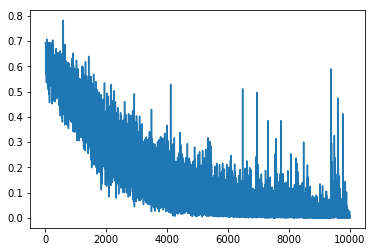

In [128]:
plt.plot(loss_history)

In [194]:
sa, sb = random.choices(contexts_dataset, k=2)

embs = s_emb.embed([sa, sb])

print('A:', sa)
print('B:', sb)

print(s_emb.query(embs[0], sa).cpu().tolist())
print(s_emb.query(embs[0], sb).round().cpu().tolist())

print(s_emb.query(embs[1], sa).cpu().tolist())
print(s_emb.query(embs[1], sb).round().cpu().tolist())

A: ['if', 'id', 'is', 'None', 'project', 'None', 'error', 'Invalid', 'URL', 'else']
B: ['itemsize', 'channel1', 'width1', 'tesseract', 'SetCvImage', 'iplimage', 'api', 'text', 'api', 'GetUTF8Text']
[0.999993085861206, 0.9999868869781494, 0.9998781681060791, 0.999984622001648, 0.9783746600151062, 0.999984622001648, 0.9993973970413208, 0.9997410178184509, 0.9993201494216919, 0.9999406337738037]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]
[0.9999258518218994, 0.9988717436790466, 0.9996156692504883, 0.9959056377410889, 0.9774314761161804, 0.9959056377410889, 0.961309552192688, 0.01786724664270878, 0.9066974520683289, 0.998838484287262]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
